In [1]:
# importing nessesary libraries

import pandas as pd
pd.options.mode.chained_assignment= None

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data  
data saved as **RawData** dataframe:  Virus –> MHC –> affinity (for whole proteome)   
**RawData1** and **RawData2** are for MHCI and II respectively  
Viral lengths are stored in **AAcid** dictionary

In [2]:
# Checking that the notebook is lokated in the right directory
# Should be "Scripts"
! basename "$PWD"

Scripts


In [3]:
# file with processed data files' names
! ls -1 ../Data/Affinity_results/Processed/ | grep ".csv" > tmp/list.txt

In [4]:
f= open("../Scripts/tmp/list.txt", "r")
List= f.read()
List= List.split("\n")[:-1]
f.close()

# List – a list of data files' names, pattern: even(and 0) are I, uneven – MHCII

In [5]:
# RawData
ColNames=["Virus", "MHC_type", "MHC", "Protein", "# of high binding", "# of low binding",
          "sum_score high", "sum_score low"]

RawData= pd.DataFrame(columns= ColNames)

for I in range(1, len(List), 2):
    x= List[I]
    Path= "../Data/Affinity_results/Processed/"+x
    Panda= pd.read_csv(Path)
    Panda= Panda.drop(['Unnamed: 0'], axis=1)
    Panda= Panda.loc[Panda['Protein'] == "Raw_Proteome"]
    Panda= Panda.iloc[:, :7]
    Panda['MHC_type']= ["II" for z in range(len(Panda))]
    Panda['Virus']= [list(Panda['Virus'].unique())[-1] for z in range(len(Panda))] # unfortunately I have New_virname items
    RawData= pd.concat([RawData, Panda], axis=0)
 
for I in range(0, len(List), 2):
    x= List[I]
    Path= "../Data/Affinity_results/Processed/"+x
    Panda= pd.read_csv(Path)
    Panda= Panda.drop(['Unnamed: 0'], axis=1)
    Panda= Panda.loc[Panda['Protein'] == "Raw_Proteome"]
    Panda= Panda.iloc[:, :7]
    Panda['MHC_type']= ["I" for z in range(len(Panda))]
    Panda['Virus']= [list(Panda['Virus'].unique())[-1] for z in range(len(Panda))]
    RawData= pd.concat([RawData, Panda], axis=0)

RawData= RawData.drop_duplicates() # some alleles were counted multiple times

RawData

Virus MHC_type         MHC       Protein  \
1880                 Borna       II   DRB1_1402  Raw_Proteome   
1881                 Borna       II   DRB1_1406  Raw_Proteome   
1882                 Borna       II   DRB1_1405  Raw_Proteome   
1883                 Borna       II   DRB1_1602  Raw_Proteome   
1884                 Borna       II   DRB1_1201  Raw_Proteome   
...                    ...      ...         ...           ...   
604   human_parvovirus_B19        I  HLA-C12:03  Raw_Proteome   
605   human_parvovirus_B19        I  HLA-C14:02  Raw_Proteome   
606   human_parvovirus_B19        I  HLA-C15:02  Raw_Proteome   
607   human_parvovirus_B19        I  HLA-C16:01  Raw_Proteome   
608   human_parvovirus_B19        I  HLA-C17:01  Raw_Proteome   

     # of high binding # of low binding  sum_score high  sum_score low  
1880               163              815          81.170       1997.820  
1881               115              799          53.640       1881.580  
1882               141              784          51.950       1905.430  
1883               126              852          79.900       1958.170  
1884               104              760          53.860       1746.300  
...                ...              ...             ...            ...  
604                 56              243          12.459        241.488  
605                 91              283          24.428        304.922  
606                 45              202          10.965        198.524  
607                 64              240          16.028        248.390  
608                 55              190          13.756        205.411  

[19964 rows x 8 columns]

In [6]:
# calculating viral lengths and writing them to AAcid (raw viral names) dict

AAcid= {}
for I in range(1, len(List), 2):
    x= List[I][:-7]
    Path= "../Data/Viral_proteomes/Ready/Ready_2/"+x+".fasta"
    f= open(Path, "r")
    file= f.read()
    f.close()
    lines= file.split("\n")[1:-1]
    add= 0
    for y in lines:
        if len(y) != 0:
            if y[0] != ">": add+= len(y)
    AAcid[x]= add

### Adding Normalization coef for high affinity

In [7]:
# val/coef column contains values of normed on length affinity scores

RawData= RawData.reset_index()
Tmp= list(RawData['Virus'])
AddOne_or_Two= []
for I in range(len(Tmp)):
    x= Tmp[I]
    AddOne_or_Two+= [int(AAcid[x])]
        
RawData['Coef']= AddOne_or_Two
RawData['val/coef']= (RawData['sum_score high']/RawData['Coef'])*10000

RawData= RawData.drop(['index'], axis= 1)

RawData

Virus MHC_type         MHC       Protein  \
0                     Borna       II   DRB1_1402  Raw_Proteome   
1                     Borna       II   DRB1_1406  Raw_Proteome   
2                     Borna       II   DRB1_1405  Raw_Proteome   
3                     Borna       II   DRB1_1602  Raw_Proteome   
4                     Borna       II   DRB1_1201  Raw_Proteome   
...                     ...      ...         ...           ...   
19959  human_parvovirus_B19        I  HLA-C12:03  Raw_Proteome   
19960  human_parvovirus_B19        I  HLA-C14:02  Raw_Proteome   
19961  human_parvovirus_B19        I  HLA-C15:02  Raw_Proteome   
19962  human_parvovirus_B19        I  HLA-C16:01  Raw_Proteome   
19963  human_parvovirus_B19        I  HLA-C17:01  Raw_Proteome   

      # of high binding # of low binding  sum_score high  sum_score low  Coef  \
0                   163              815          81.170       1997.820  3517   
1                   115              799          53.640       1881.580  3517   
2                   141              784          51.950       1905.430  3517   
3                   126              852          79.900       1958.170  3517   
4                   104              760          53.860       1746.300  3517   
...                 ...              ...             ...            ...   ...   
19959                56              243          12.459        241.488  2255   
19960                91              283          24.428        304.922  2255   
19961                45              202          10.965        198.524  2255   
19962                64              240          16.028        248.390  2255   
19963                55              190          13.756        205.411  2255   

         val/coef  
0      230.793290  
1      152.516349  
2      147.711117  
3      227.182258  
4      153.141882  
...           ...  
19959   55.250554  
19960  108.328160  
19961   48.625277  
19962   71.077605  
19963   61.002217  

[19964 rows x 10 columns]

In [8]:
# Adding "Normed on max" column
RawData= pd.concat([RawData.loc[RawData['MHC_type'] == "I"].sort_values('Virus'), 
                    RawData.loc[RawData['MHC_type'] == "II"].sort_values('Virus')], axis= 0)

Add=[]

for x in list(RawData['Virus'].unique()):
    Max= RawData.loc[(RawData['Virus'] == x) & (RawData['MHC_type'] == "I")]['sum_score high'].max()
    Add+= [z/Max for z in list(RawData.loc[(RawData['Virus'] == x) & (RawData['MHC_type'] == "I")]['sum_score high'])]

for x in list(RawData['Virus'].unique()):
    Max= RawData.loc[(RawData['Virus'] == x) & (RawData['MHC_type'] == "II")]['sum_score high'].max()
    Add+= [z/Max for z in list(RawData.loc[(RawData['Virus'] == x) & (RawData['MHC_type'] == "II")]['sum_score high'])]
    
RawData['Normed on max']= Add
RawData

Virus MHC_type                     MHC       Protein  \
14570                 Borna        I              HLA-A02:07  Raw_Proteome   
14633                 Borna        I              HLA-B52:01  Raw_Proteome   
14632                 Borna        I              HLA-B51:01  Raw_Proteome   
14631                 Borna        I              HLA-B50:01  Raw_Proteome   
14630                 Borna        I              HLA-B44:03  Raw_Proteome   
...                     ...      ...                     ...           ...   
14417  human_parvovirus_B19       II  HLA-DPA10202-DPB110501  Raw_Proteome   
14418  human_parvovirus_B19       II  HLA-DPA10301-DPB110501  Raw_Proteome   
14419  human_parvovirus_B19       II  HLA-DPA10401-DPB110501  Raw_Proteome   
14407  human_parvovirus_B19       II   HLA-DPA10202-DPB10901  Raw_Proteome   
14569  human_parvovirus_B19       II   HLA-DQA10601-DQB10609  Raw_Proteome   

      # of high binding # of low binding  sum_score high  sum_score low  Coef  \
14570               121              422          29.291        432.611  3517   
14633                82              383          20.081        372.802  3517   
14632               102              367          26.026        369.346  3517   
14631                93              354          23.627        367.040  3517   
14630                76              288          17.964        298.251  3517   
...                 ...              ...             ...            ...   ...   
14417                91              435          42.760       1105.370  2255   
14418               119              577          52.440       1477.860  2255   
14419               151              713          65.970       1808.550  2255   
14407               120              552          67.310       1429.090  2255   
14569                93              590          38.280       1464.750  2255   

         val/coef  Normed on max  
14570   83.284049       0.881171  
14633   57.096958       0.604103  
14632   74.000569       0.782949  
14631   67.179414       0.710779  
14630   51.077623       0.540417  
...           ...            ...  
14417  189.623060       0.291678  
14418  232.549889       0.357708  
14419  292.549889       0.450000  
14407  298.492239       0.459141  
14569  169.756098       0.261119  

[19964 rows x 11 columns]

### Viral names' substitution  (change if you've used different fasta files)
for RawData  
**SubNames** dict

In [9]:
SubNames= {}

#tmp
Virus= list(RawData['Virus'].unique())
for x in Virus:
    SubNames[x]= x

SubNames["Zaire_ebolavirus"]= "Ebola"
SubNames["Zika_virus"]= "Zika"
SubNames["Yellow_fever_virus"]= "Yellow_fever"
SubNames["West_nile_virus"]= "West_nile"
SubNames["Vesicular_stomatitis_Indiana_virus"]= "VSIV"
SubNames["Tick-borne_encephalitis_virus_strain_Neudoerfl"]= "TBEV"
SubNames["Sindbis_virus"]= "Sindbis"
SubNames["Semliki_virus"]= "Semliki"
SubNames["SARS"]= "SARS-CoV-1"
SubNames["Sapporo_virus"]= "Sapporo"
SubNames["Rubella_virus"]= "Rubella"
SubNames["Rabies_virus"]= "Rabies"
SubNames["Primate_bocaparvovirus_1_[strain_Human_bocavirus_1]"]= "Human_bocavirus"
SubNames["Poliovirus_type_1"]= "Poliovirus"
SubNames["Omsk_hemorrhagic_fever_virus"]= "OHFV"
SubNames["Norwalk_virus"]= "Norwalk"
SubNames["Nipah_virus"]= "Nipah"
SubNames["Mumps_virus"]= "Mumps"
SubNames["Merkel_cell_polyomavirus"]= "MCV"
SubNames["Measles_virus"]= "Measles"
SubNames["Marburgvirus"]= "Marburg"
SubNames["Lymphocytic_choriomeningitis_virus"]= "LCM"
SubNames["Lassa_virus"]= "Lassa"
SubNames["Kemerovo_virus"]= "Kemerovo"
SubNames["Japanese_encephalitis_virus"]= "Japanese_encephalitis"
SubNames["Human_rhinovirus_C"]= "Rhinovirus_C"
SubNames["Human_rhinovirus_A"]= "Rhinovirus_A"
SubNames["Human_rhinovirus_14_[B]"]= "Rhinovirus_B"
SubNames["Human_respirovirus_1"]= "Respirovirus"
SubNames["Human_respiratory_syncytial_virus"]= "RSV"
SubNames["Human_polyomavirus_9"]= "HPyV9"
SubNames["human_parvovirus_B19"]= "Parvovirus_B19"
SubNames["Human_papillomavirus_type_16"]= "HPV16"
SubNames["Human_metapneumovirus"]= "Metapneumovirus"
SubNames["Human_Coxsackievirus_B6"]= "Coxsackievirus_B"
SubNames["Human_coxsackievirus_24A"]= "Coxsackievirus_A"
SubNames["Human_astrovirus_1"]= "Astrovirus"
SubNames["Hepatitis_B_human"]= "Hepatitis_B"
SubNames["Hepatitis_A_virus"]= "Hepatitis_A"
SubNames["Foot_and_mouth_disease_virus_type_O"]= "FMDV"
SubNames["Epstein-Barr_virus_B95-8"]= "EBV"
SubNames["Echovirus_1_strain_Farouk_[Enterovirus_B]"]= "Echo"
SubNames["Dengue_virus"]= "Dengue"
SubNames["Colorado_tick_fever"]= "CTF"

Namesold= list(RawData['Virus'])
Namesnew= []
for x in Namesold: 
    Namesnew+= [SubNames[x]]
    AAcid[SubNames[x]]= AAcid[x]
RawData['Virus']= Namesnew
RawData= RawData.sort_values('Virus')

# lengths dict with correct viral names
AAcid2= {}
for x in list(AAcid.keys()):
    try:
        AAcid2[SubNames[x]]= AAcid[x]
    except: None
    
AAcid= AAcid2

### RawData1 and RawData2

In [10]:
# Should we remove second covid-19? (never mind, if you don't know what it is)
RawDataCopy= RawData.copy()
RawData= RawData.loc[RawData['Virus'] != "SARS-CoV-2_2"]

#RawData= RawDataCopy.copy()

In [11]:
RawData1= RawData.copy()
RawData1= RawData1.loc[RawData1['MHC_type'] == "I"]

RawData2= RawData.copy()
RawData2= RawData2.loc[RawData2['MHC_type'] == "II"]

### Dicts with MHCII alleles names

In [38]:
# DRB1 DP DQ
DRB1= {}
DP= {}
DQ= {}

for x in list(RawData2['MHC']):
    if x[5] == "P": DP[x]= 1
    elif x[5] == "Q": DQ[x]= 1
    else: DRB1[x]= 1
    
DRB1= list(DRB1.keys())
DP= list(DP.keys())
DQ= list(DQ.keys())

## Tops & Bottoms  
*for high affinity only*  
  
**Tab1** and **Tab2** dfs, output file –> **tops_n_bottoms.xlsx**  
**Tab1p** and **Tab2p** dfs, output file –> **tops_n_bottoms_peptides.xlsx**  
  
A table of alleles that have affinity in the range of 10% from max/min values –> **top_10%_I.csv**, **top_10%_II.csv**, **bottom_10%_I.csv**, **bottom_10%_II.csv**  

File with alleles that don't present any peptides for specific viruses –> **non_presenting_alleles.txt**: Virus–Allele  
List of MHC alleles abundance in top/bottom lists –> **mhc_top_bootom_abundance.txt** and **mhc_top_bootom_abundance_(10%).txt**

### For normed on length affinity

In [12]:
# file with unpresented alleles
## Some peptides' rank is equal to 1.00, so ther affinity will be equal to 1-1=0 (concidered as zero)
f= open("../Output/non_presenting_alleles.txt", "w")

#### Table for MHCI  
Tab1

In [13]:
f.write("===== M H C I =====\n")

Data= []
Virus= list(RawData1['Virus'].unique())
for x in Virus:
    VV= RawData1.loc[RawData1['Virus'] == x]
    VV= VV.sort_values('sum_score high')

    # writing to non_presenting_alleles textfile
    VVnull= VV.loc[VV['sum_score high'] == 0]
    VVname= list(VVnull['Virus'])
    VVmhc= list(VVnull['MHC'])
    for I in range (len (VVname)):
        f.write(VVname[I]+" –> "+VVmhc[I]+"\n")
                
    not_null= len(VV)-len(VVnull)
    MHC= list(VV['MHC'])
    Values= list(VV['val/coef']) 
    New= [x, AAcid[x], not_null]
    MHC= MHC[::-1]
    Values= Values[::-1]
    for I in range(10):
        New+= [MHC[I]+" "+str(int(round(Values[I]*1000/AAcid[x], 0)))]
    for I in range(1, 11, 1):
        K= I*(-1)
        New+= [MHC[K]+" "+str(int(round(Values[K]*1000/AAcid[x], 0)))]
    Data+= [New]

CN= ["Virus", "Aacid length", "# of alleles presented", "Top1", "Top2", "Top3", "Top4", "Top5", "Top6",
    "Top7", "Top8", "Top9", "Top10", "Bottom1", "Bottom2", "Bottom3", "Bottom4", "Bottom5", "Bottom6", 
     "Bottom7", "Bottom8", "Bottom9", "Bottom10"]

Tab1= pd.DataFrame(columns= CN, data= Data)

Tab1.head()

Virus  Aacid length  # of alleles presented           Top1  \
0        Astrovirus          3157                      87  HLA-A30:01 32   
1             Borna          3517                      87  HLA-B07:02 27   
2               CTF          9623                      87   HLA-A33:01 9   
3        Chikunguya          4546                      87  HLA-A30:02 19   
4  Coxsackievirus_A          2214                      87  HLA-A33:01 43   

            Top2           Top3           Top4           Top5           Top6  \
0  HLA-A03:01 28  HLA-B35:03 26  HLA-B53:01 25  HLA-C01:02 25  HLA-A11:01 24   
1  HLA-B07:05 27  HLA-B42:01 25  HLA-A02:02 25  HLA-A02:13 24  HLA-B08:01 24   
2   HLA-B35:14 8   HLA-B39:05 8   HLA-A33:03 8   HLA-B35:01 8   HLA-A32:01 8   
3  HLA-A30:01 18  HLA-A11:01 18  HLA-B07:02 17  HLA-B07:05 17  HLA-B51:01 17   
4  HLA-B35:14 43  HLA-A29:02 42  HLA-A29:01 42  HLA-B15:02 42  HLA-B35:01 41   

            Top7  ...        Bottom1        Bottom2        Bottom3  \
0  HLA-B35:01 24  ...   HLA-B27:05 9  HLA-B40:01 12  HLA-A01:01 13   
1  HLA-A02:01 24  ...  HLA-A23:01 11  HLA-A24:02 12  HLA-B15:03 13   
2   HLA-C07:02 8  ...   HLA-B54:01 4   HLA-A03:01 5   HLA-A11:01 5   
3  HLA-B55:02 17  ...   HLA-B44:02 8   HLA-B44:03 8   HLA-B27:05 8   
4  HLA-A68:02 40  ...  HLA-A02:02 18  HLA-B40:06 19  HLA-B40:02 19   

         Bottom4        Bottom5        Bottom6        Bottom7        Bottom8  \
0  HLA-C15:02 13  HLA-C08:02 13  HLA-B52:01 14  HLA-B45:01 14  HLA-B40:02 14   
1  HLA-A24:07 13  HLA-A31:08 13  HLA-A68:02 13  HLA-A03:02 13  HLA-B44:02 13   
2   HLA-A03:02 5   HLA-B55:02 5   HLA-C17:01 5   HLA-C08:01 5   HLA-C03:04 5   
3   HLA-A23:01 9  HLA-A31:08 10  HLA-C17:01 10  HLA-B08:01 10  HLA-A02:07 10   
4  HLA-B57:01 19  HLA-A02:03 20  HLA-A02:01 20  HLA-A02:36 20  HLA-B45:01 20   

         Bottom9       Bottom10  
0  HLA-B40:06 14  HLA-B50:01 14  
1  HLA-A68:01 14  HLA-A03:01 14  
2   HLA-C03:03 5   HLA-B45:01 5  
3  HLA-C03:03 10  HLA-C03:04 10  
4  HLA-B40:01 20  HLA-A02:13 20  

[5 rows x 23 columns]

#### Table for MHCII 
Tab2

In [14]:
f.write("===== M H C II =====\n")

Data= []

for x in Virus:
    VV= RawData2.loc[RawData2['Virus'] == x]
    VV= VV.sort_values('sum_score high')

    
    VVnull= VV.loc[VV['sum_score high'] == 0]
    VVname= list(VVnull['Virus'])
    VVmhc= list(VVnull['MHC'])
    for I in range (len (VVname)):
        f.write(VVname[I]+" –> "+VVmhc[I]+"\n")
                
    not_null= len(VV)-len(VVnull)
    MHC= list(VV['MHC'])
    Values= list(VV['val/coef'])
    New= [x, AAcid[x], not_null]
    MHC= MHC[::-1]
    Values= Values[::-1]
    for I in range(10):
        New+= [MHC[I]+" "+str(int(round(Values[I]*1000/AAcid[x], 0)))]
    for I in range(1, 11, 1):
        K= I*(-1)
        New+= [MHC[K]+" "+str(int(round(Values[K]*1000/AAcid[x], 0)))]
    Data+= [New]

f.close()

Tab2= pd.DataFrame(columns= CN, data= Data)

Tab2.head()

Virus  Aacid length  # of alleles presented  \
0        Astrovirus          3157                     235   
1             Borna          3517                     235   
2               CTF          9623                     235   
3        Chikunguya          4546                     235   
4  Coxsackievirus_A          2214                     235   

                        Top1                       Top2  \
0              DRB1_1405 176  HLA-DQA10501-DQB10609 167   
1  HLA-DPA10103-DPB10201 138  HLA-DQA10401-DQB10601 135   
2               DRB1_1503 39   HLA-DPA10103-DPB10601 39   
3               DRB1_1102 82               DRB1_1301 82   
4              DRB1_1302 314              DRB1_0402 302   

                        Top3                       Top4  \
0  HLA-DQA10401-DQB10202 166  HLA-DQA10401-DQB10201 166   
1  HLA-DQA10101-DQB10602 128  HLA-DPA10401-DPB10201 125   
2   HLA-DQA10101-DQB10301 38   HLA-DQA10101-DQB10319 38   
3   HLA-DQA10301-DQB10501 77   HLA-DQA10201-DQB10201 75   
4              DRB1_0407 293              DRB1_0404 252   

                        Top5                       Top6  \
0  HLA-DQA10301-DQB10201 161  HLA-DQA10301-DQB10202 161   
1  HLA-DQA10102-DQB10602 124  HLA-DQA10103-DQB10602 124   
2               DRB1_1501 38   HLA-DPA10401-DPB10601 37   
3   HLA-DQA10201-DQB10202 75               DRB1_0701 75   
4  HLA-DQA10103-DQB10502 245              DRB1_1301 242   

                        Top7  ...                   Bottom1  \
0  HLA-DQA10501-DQB10202 161  ...  HLA-DQA10101-DQB10402 15   
1  HLA-DPA10202-DPB10501 122  ...              DRB1_0405 14   
2   HLA-DQA10601-DQB10503 37  ...  HLA-DPA10202-DPB11301 12   
3               DRB1_0804 73  ...   HLA-DPA10201-DPB11101 8   
4              DRB1_1102 242  ...   HLA-DQA10301-DQB10301 7   

                    Bottom2                   Bottom3  \
0  HLA-DPA10103-DPB10301 18              DRB1_1501 20   
1              DRB1_1302 14  HLA-DQA10102-DQB10604 15   
2              DRB1_1404 12  HLA-DPA10202-DPB11101 13   
3   HLA-DPA10201-DPB18501 8  HLA-DPA10202-DPB11101 10   
4   HLA-DQA10301-DQB10319 7  HLA-DPA10301-DPB11401 12   

                    Bottom4                   Bottom5  \
0  HLA-DPA10301-DPB10301 22  HLA-DPA10401-DPB10301 23   
1  HLA-DPA10202-DPB11701 15  HLA-DQA10101-DQB10604 16   
2  HLA-DPA10201-DPB11301 13  HLA-DQA10601-DQB10319 13   
3  HLA-DPA10202-DPB18501 10  HLA-DPA10202-DPB11301 11   
4  HLA-DPA10201-DPB11101 19  HLA-DPA10202-DPB11101 20   

                    Bottom6                   Bottom7  \
0  HLA-DPA10103-DPB11401 24  HLA-DPA10301-DPB10501 25   
1  HLA-DQA10102-DQB10503 17  HLA-DQA10101-DQB10503 17   
2  HLA-DQA10601-DQB10301 13  HLA-DPA10202-DPB10101 14   
3  HLA-DPA10202-DPB10101 11  HLA-DQA10103-DQB10303 13   
4  HLA-DPA10401-DPB11401 21  HLA-DPA10103-DPB11401 21   

                    Bottom8                   Bottom9  \
0  HLA-DPA10401-DPB11401 25  HLA-DQA10401-DQB10303 31   
1  HLA-DPA10202-DPB11401 18  HLA-DPA10202-DPB11001 18   
2  HLA-DQA10501-DQB10319 14  HLA-DQA10501-DQB10301 14   
3  HLA-DPA10201-DPB11301 14  HLA-DPA10202-DPB12601 14   
4  HLA-DPA10301-DPB11101 22  HLA-DQA10301-DQB10201 22   

                   Bottom10  
0  HLA-DQA10201-DQB10303 31  
1  HLA-DPA10202-DPB10901 18  
2  HLA-DPA10202-DPB18501 15  
3  HLA-DPA10201-DPB12601 15  
4  HLA-DQA10301-DQB10202 22  

[5 rows x 23 columns]

#### Saving Tab1&2 to the Microsoft Excel file  
tops_n_bottoms.xlsx

In [15]:
with pd.ExcelWriter('../Output/tops_n_bottoms.xlsx') as writer:  
    Tab1.to_excel(writer, sheet_name='MHCI')
    Tab2.to_excel(writer, sheet_name='MHCII')

#### Top/bottom abundance files  
mhc_top_bootom_abundance.txt

In [19]:
f= open("../Output/mhc_top_bootom_abundance.txt", "w")

######TOP#######

f.write("TOP\n")
f.write("\n")
f.write("===== M H C I =====\n")

Tab11= Tab1.iloc[:, 3:13]
Tab11= Tab11.to_numpy()

Dict= {}
for I in range(59):
    for L in range(10):
        val= Tab11[I][L].split(" ")[0]
        if val in Dict.keys(): Dict[val]+= 1
        else: Dict[val]= 1
W= []
for x in Dict.keys():
    W+= [[x, Dict[x]]]
W= sorted(W, key= lambda x: x[1], reverse= True)

for x in W:
    f.write(x[0]+" –> "+str(x[1])+"\n")


f.write("===== M H C II =====\n")

Tab22= Tab2.iloc[:, 3:13]
Tab22= Tab22.to_numpy()

Dict= {}
for I in range(59):
    for L in range(10):
        val= Tab22[I][L].split(" ")[0]
        if val in Dict.keys(): Dict[val]+= 1
        else: Dict[val]= 1
W= []
for x in Dict.keys():
    W+= [[x, Dict[x]]]
W= sorted(W, key= lambda x: x[1], reverse= True)

for x in W:
    f.write(x[0]+" –> "+str(x[1])+"\n")

######BOTTOM#######    
    
f.write("\n")
f.write("BOTTOM\n")
f.write("\n")
f.write("===== M H C I =====\n")

Tab11= Tab1.iloc[:, 13:]
Tab11= Tab11.to_numpy()

Dict= {}
for I in range(59):
    for L in range(10):
        val= Tab11[I][L].split(" ")[0]
        if val in Dict.keys(): Dict[val]+= 1
        else: Dict[val]= 1
W= []
for x in Dict.keys():
    W+= [[x, Dict[x]]]
W= sorted(W, key= lambda x: x[1], reverse= True)

for x in W:
    f.write(x[0]+" –> "+str(x[1])+"\n")


f.write("===== M H C II =====\n")

Tab22= Tab2.iloc[:, 13:]
Tab22= Tab22.to_numpy()

Dict= {}
for I in range(59):
    for L in range(10):
        val= Tab22[I][L].split(" ")[0]
        if val in Dict.keys(): Dict[val]+= 1
        else: Dict[val]= 1
W= []
for x in Dict.keys():
    W+= [[x, Dict[x]]]
W= sorted(W, key= lambda x: x[1], reverse= True)

for x in W:
    f.write(x[0]+" –> "+str(x[1])+"\n")
    
f.close()

#### Top10% and Bottom10% lists + mhc abundance

In [20]:
#Top10% table

f= open("../Output/top_10%_I.csv", "w")

for x in Virus: 
    f.write(x)
    RawData11= RawData1.loc[RawData1['Virus'] == x]
    Top= RawData11[['MHC', 'sum_score high', 'val/coef']].sort_values('sum_score high')
    Max= Top['sum_score high'].max()
    Stop= 0.9*Max
    Top= Top.reset_index()
    I= len(Top)-1
    Bool= True
    while Bool == True:
        if Top.loc[I, 'sum_score high'] >= Stop:
            f.write(","+Top.loc[I, 'MHC']+" "+str(round(Top.loc[I, 'val/coef'])))
            I= I-1
        else: Bool= False
    f.write("\n")

f.close()

##########################################################################################

f= open("../Output/top_10%_II.csv", "w")

for x in Virus: 
    f.write(x)
    RawData22= RawData2.loc[RawData2['Virus'] == x]
    Top= RawData22[['MHC', 'sum_score high', 'val/coef']].sort_values('sum_score high')
    Max= Top['sum_score high'].max()
    Stop= 0.9*Max
    Top= Top.reset_index()
    I= len(Top)-1
    Bool= True
    while Bool == True:
        if Top.loc[I, 'sum_score high'] >= Stop:
            f.write(","+Top.loc[I, 'MHC']+" "+str(round(Top.loc[I, 'val/coef'])))
            I= I-1
        else: Bool= False
    f.write("\n")

f.close()

In [21]:
#Bottom10% table

f= open("../Output/bottom_10%_I.csv", "w")

for x in Virus: 
    f.write(x)
    RawData11= RawData1.loc[RawData1['Virus'] == x]
    Top= RawData11[['MHC', 'sum_score high', 'val/coef']].sort_values('sum_score high')
    Min= Top['sum_score high'].min()
    Stop= 1.1*Min
    Top= Top.reset_index()
    I= 0
    Bool= True
    while Bool == True:
        if Top.loc[I, 'sum_score high'] <= Stop:
            f.write(","+Top.loc[I, 'MHC']+" "+str(round(Top.loc[I, 'val/coef'])))
            I= I+1
        else: Bool= False
    f.write("\n")

f.close()

##########################################################################################

f= open("../Output/bottom_10%_II.csv", "w")

for x in Virus: 
    f.write(x)
    RawData22= RawData2.loc[RawData2['Virus'] == x]
    Top= RawData22[['MHC', 'sum_score high', 'val/coef']].sort_values('sum_score high')
    Min= Top['sum_score high'].min()
    Stop= 1.1*Min
    Top= Top.reset_index()
    I= 0
    Bool= True
    while Bool == True:
        if Top.loc[I, 'sum_score high'] <= Stop:
            f.write(","+Top.loc[I, 'MHC']+" "+str(round(Top.loc[I, 'val/coef'])))
            I= I+1
        else: Bool= False
    f.write("\n")

f.close()

In [22]:
#Abundance file

f= open("../Output/mhc_top_bootom_abundance_(10%).txt", "w")

######TOP######

f.write("TOP\n")
f.write("\n")
f.write("===== M H C I =====\n")

ff= open("../Output/top_10%_I.csv", "r")
GG= ff.read().split("\n")
ff.close()
Dict= {}
for x in GG:
    for y in x.split(",")[1:]:
        z= y.split(" ")[0]
        try: Dict[z]+= 1
        except: Dict[z]= 1

W= []
for x in Dict.keys():
    W+= [[x, Dict[x]]]
W= sorted(W, key= lambda x: x[1], reverse= True)

for x in W:
    f.write(x[0]+" –> "+str(x[1])+"\n")


f.write("===== M H C II =====\n")

ff= open("../Output/top_10%_II.csv", "r")
GG= ff.read().split("\n")
ff.close()
Dict= {}
for x in GG:
    for y in x.split(",")[1:]:
        z= y.split(" ")[0]
        try: Dict[z]+= 1
        except: Dict[z]= 1
        
W= []
for x in Dict.keys():
    W+= [[x, Dict[x]]]
W= sorted(W, key= lambda x: x[1], reverse= True)

for x in W:
    f.write(x[0]+" –> "+str(x[1])+"\n")

######BOTTOM######
    
f.write("\n")
f.write("BOTTOM\n")
f.write("\n")
f.write("===== M H C I =====\n")

ff= open("../Output/bottom_10%_I.csv", "r")
GG= ff.read().split("\n")
ff.close()
Dict= {}
for x in GG:
    for y in x.split(",")[1:]:
        z= y.split(" ")[0]
        try: Dict[z]+= 1
        except: Dict[z]= 1

W= []
for x in Dict.keys():
    W+= [[x, Dict[x]]]
W= sorted(W, key= lambda x: x[1], reverse= True)

for x in W:
    f.write(x[0]+" –> "+str(x[1])+"\n")


f.write("===== M H C II =====\n")

ff= open("../Output/bottom_10%_II.csv", "r")
GG= ff.read().split("\n")
ff.close()
Dict= {}
for x in GG:
    for y in x.split(",")[1:]:
        z= y.split(" ")[0]
        try: Dict[z]+= 1
        except: Dict[z]= 1

W= []
for x in Dict.keys():
    W+= [[x, Dict[x]]]
W= sorted(W, key= lambda x: x[1], reverse= True)

for x in W:
    f.write(x[0]+" –> "+str(x[1])+"\n")
    
f.close()

### Tables for peptides  
Tab1p and Tab2p

In [16]:
Data= []
Virus= list(RawData1['Virus'].unique())
for x in Virus:
    VV= RawData1.loc[RawData1['Virus'] == x]
    VV= VV.sort_values('# of high binding') 
    
    VVnull= VV.loc[VV['# of high binding'] == 0] 
                
    not_null= len(VV)-len(VVnull)
    MHC= list(VV['MHC'])
    Values= list(VV['# of high binding'])
    New= [x, AAcid[x], not_null]
    MHC= MHC[::-1]
    Values= Values[::-1]
    for I in range(10):
        New+= [MHC[I]+" "+str(int(round(Values[I]*1000/AAcid[x], 0)))]
    for I in range(1, 11, 1):
        K= I*(-1)
        New+= [MHC[K]+" "+str(int(round(Values[K]*1000/AAcid[x], 0)))]
    Data+= [New]

CN= ["Virus", "Aacid length", "# of alleles presented", "Top1", "Top2", "Top3", "Top4", "Top5", "Top6",
    "Top7", "Top8", "Top9", "Top10", "Bottom1", "Bottom2", "Bottom3", "Bottom4", "Bottom5", "Bottom6", 
     "Bottom7", "Bottom8", "Bottom9", "Bottom10"]

Tab1p= pd.DataFrame(columns= CN, data= Data)

Tab1p.head()

Virus  Aacid length  # of alleles presented           Top1  \
0        Astrovirus          3157                      87  HLA-A30:01 40   
1             Borna          3517                      87  HLA-A02:01 36   
2               CTF          9623                      87  HLA-A33:01 34   
3        Chikunguya          4546                      87  HLA-A30:02 35   
4  Coxsackievirus_A          2214                      87  HLA-A29:02 38   

            Top2           Top3           Top4           Top5           Top6  \
0  HLA-A03:01 32  HLA-C04:01 31  HLA-C07:02 31  HLA-B35:03 31  HLA-B18:01 31   
1  HLA-A02:07 34  HLA-B07:05 34  HLA-A02:02 34  HLA-A02:11 33  HLA-A02:13 33   
2  HLA-C07:02 32  HLA-A33:03 31  HLA-B27:05 30  HLA-B35:01 30  HLA-A32:01 29   
3  HLA-A30:01 33  HLA-B07:05 31  HLA-C01:02 30  HLA-B42:01 30  HLA-B07:02 29   
4  HLA-A29:01 38  HLA-A26:01 38  HLA-B35:01 38  HLA-B35:14 37  HLA-B46:01 34   

            Top7  ...        Bottom1        Bottom2        Bottom3  \
0  HLA-B46:01 30  ...  HLA-B27:05 12  HLA-B40:01 16  HLA-C15:02 16   
1  HLA-B08:01 32  ...  HLA-A23:01 17  HLA-A68:02 18  HLA-A03:02 18   
2  HLA-B35:14 29  ...  HLA-A11:01 17  HLA-A03:02 18  HLA-B54:01 18   
3  HLA-B55:02 29  ...  HLA-B44:02 14  HLA-B44:03 15  HLA-A23:01 16   
4  HLA-B15:02 34  ...  HLA-B40:01 16  HLA-A02:01 16  HLA-A02:03 16   

         Bottom4        Bottom5        Bottom6        Bottom7        Bottom8  \
0  HLA-A01:01 17  HLA-C08:02 18  HLA-C08:01 18  HLA-C05:09 18  HLA-C05:01 18   
1  HLA-B44:02 19  HLA-A03:01 19  HLA-A24:02 20  HLA-B15:03 20  HLA-A31:08 20   
2  HLA-A03:01 19  HLA-B55:02 19  HLA-C17:01 20  HLA-B51:01 21  HLA-C08:01 21   
3  HLA-A31:08 18  HLA-B27:05 18  HLA-C08:01 18  HLA-A68:02 18  HLA-B08:01 18   
4  HLA-A02:02 18  HLA-B40:02 18  HLA-B40:06 18  HLA-A02:11 19  HLA-A02:13 19   

         Bottom9       Bottom10  
0  HLA-A02:06 19  HLA-B58:01 19  
1  HLA-A24:07 21  HLA-B18:01 22  
2  HLA-B13:02 21  HLA-B45:01 22  
3  HLA-A02:01 19  HLA-A24:02 19  
4  HLA-B50:01 19  HLA-A02:36 19  

[5 rows x 23 columns]

In [17]:
Data= []

for x in Virus:
    VV= RawData2.loc[RawData2['Virus'] == x]
    VV= VV.sort_values('# of high binding') 

    VVnull= VV.loc[VV['# of high binding'] == 0] 
                
    not_null= len(VV)-len(VVnull)
    MHC= list(VV['MHC'])
    Values= list(VV['# of high binding']) 
    New= [x, AAcid[x], not_null]
    MHC= MHC[::-1]
    Values= Values[::-1]
    for I in range(10):
        New+= [MHC[I]+" "+str(int(round(Values[I]*1000/AAcid[x], 0)))]
    for I in range(1, 11, 1):
        K= I*(-1)
        New+= [MHC[K]+" "+str(int(round(Values[K]*1000/AAcid[x], 0)))]
    Data+= [New]

f.close()

Tab2p= pd.DataFrame(columns= CN, data= Data)

Tab2p.head()

Virus  Aacid length  # of alleles presented  \
0        Astrovirus          3157                     235   
1             Borna          3517                     235   
2               CTF          9623                     235   
3        Chikunguya          4546                     235   
4  Coxsackievirus_A          2214                     235   

                        Top1                       Top2  \
0  HLA-DQA10301-DQB10201 101  HLA-DQA10301-DQB10202 101   
1   HLA-DPA10103-DPB10201 87   HLA-DQA10401-DQB10601 82   
2               DRB1_1101 73               DRB1_1503 73   
3   HLA-DQA10301-DQB10501 74   HLA-DQA10201-DQB10201 74   
4              DRB1_0407 126              DRB1_1302 115   

                       Top3                      Top4  \
0              DRB1_1405 99  HLA-DQA10501-DQB10609 97   
1  HLA-DPA10401-DPB10201 80  HLA-DQA10401-DQB10602 76   
2              DRB1_1501 72  HLA-DPA10401-DPB11701 70   
3  HLA-DQA10201-DQB10202 74              DRB1_1302 72   
4             DRB1_0402 115             DRB1_1502 103   

                       Top5                      Top6  \
0  HLA-DQA10401-DQB10202 94  HLA-DQA10401-DQB10201 94   
1  HLA-DQA10501-DQB10602 74  HLA-DPA10201-DPB10201 72   
2  HLA-DPA10103-DPB10601 70  HLA-DPA10103-DPB11701 69   
3  HLA-DPA10103-DPB10601 71  HLA-DQA10601-DQB10202 70   
4              DRB1_0401 99              DRB1_1501 99   

                       Top7  ...                   Bottom1  \
0  HLA-DQA10201-DQB10604 93  ...  HLA-DPA10103-DPB10301 13   
1  HLA-DPA10103-DPB10402 71  ...  HLA-DQA10301-DQB10302 15   
2  HLA-DQA10601-DQB10503 69  ...  HLA-DPA10202-DPB11301 26   
3  HLA-DQA10601-DQB10201 70  ...  HLA-DPA10201-DPB18501 12   
4  HLA-DQA10201-DQB10603 98  ...   HLA-DQA10301-DQB10301 9   

                    Bottom2                   Bottom3  \
0  HLA-DPA10401-DPB10301 15  HLA-DPA10301-DPB10301 16   
1              DRB1_1302 16  HLA-DPA10202-DPB11701 16   
2  HLA-DPA10201-DPB11301 27  HLA-DPA10202-DPB11101 28   
3  HLA-DPA10201-DPB11101 12  HLA-DPA10202-DPB10101 12   
4   HLA-DQA10301-DQB10319 9  HLA-DPA10202-DPB11101 10   

                    Bottom4                   Bottom5  \
0  HLA-DQA10101-DQB10402 17  HLA-DPA10301-DPB10501 19   
1  HLA-DPA10202-DPB10901 16  HLA-DPA10202-DPB11001 16   
2  HLA-DPA10202-DPB10101 29              DRB1_1404 30   
3  HLA-DPA10202-DPB11101 14  HLA-DPA10202-DPB18501 15   
4  HLA-DPA10301-DPB11401 10  HLA-DPA10201-DPB11101 11   

                    Bottom6                   Bottom7  \
0  HLA-DPA10201-DPB10301 19              DRB1_1501 21   
1  HLA-DQA10301-DQB10303 16  HLA-DPA10201-DPB11401 16   
2  HLA-DPA10201-DPB10101 30  HLA-DQA10501-DQB10301 32   
3  HLA-DPA10202-DPB11301 15  HLA-DPA10201-DPB12601 16   
4  HLA-DPA10103-DPB10601 14  HLA-DPA10301-DPB11101 14   

                    Bottom8                   Bottom9  \
0  HLA-DPA10301-DPB11401 24  HLA-DPA10401-DPB11401 24   
1  HLA-DQA10102-DQB10503 16              DRB1_0301 17   
2  HLA-DPA10202-DPB18501 32  HLA-DQA10501-DQB10319 32   
3  HLA-DPA10202-DPB12601 17  HLA-DPA10201-DPB11301 18   
4  HLA-DQA10301-DQB10202 15  HLA-DQA10301-DQB10201 15   

                   Bottom10  
0  HLA-DPA10301-DPB10101 24  
1              DRB1_0405 17  
2  HLA-DPA10202-DPB10601 33  
3  HLA-DPA10301-DPB11101 19  
4  HLA-DPA10401-DPB11401 16  

[5 rows x 23 columns]

In [18]:
with pd.ExcelWriter('../Output/tops_n_bottoms_peptides.xlsx') as writer:  
    Tab1p.to_excel(writer, sheet_name='MHCI')
    Tab2p.to_excel(writer, sheet_name='MHCII')

## Heatmaps
*Alleles –> **(I/II)_class_alleles(_normed)_heatmap.png**  
*Alleles for specific groups –> **group_type_class_alleles_(_normed)_heatmap.png**  
*Haplotypes –> **typename_haplotype(_normed)_heatmap_groupname.png**

### Switch normed/unnormed values  
_(keep open)_

In [152]:
Switch= "Unnormed" # "Unnormed" "Normed" "OnMax"

In [153]:
if Switch == "Normed": Value= "val/coef"
elif Switch == "OnMax": Value= "Normed on max"
else: Value= "sum_score high"

### Alleles  
I_class_alleles_(Switch)_heatmap.png  
II_class_alleles_(Switch)_heatmap.png

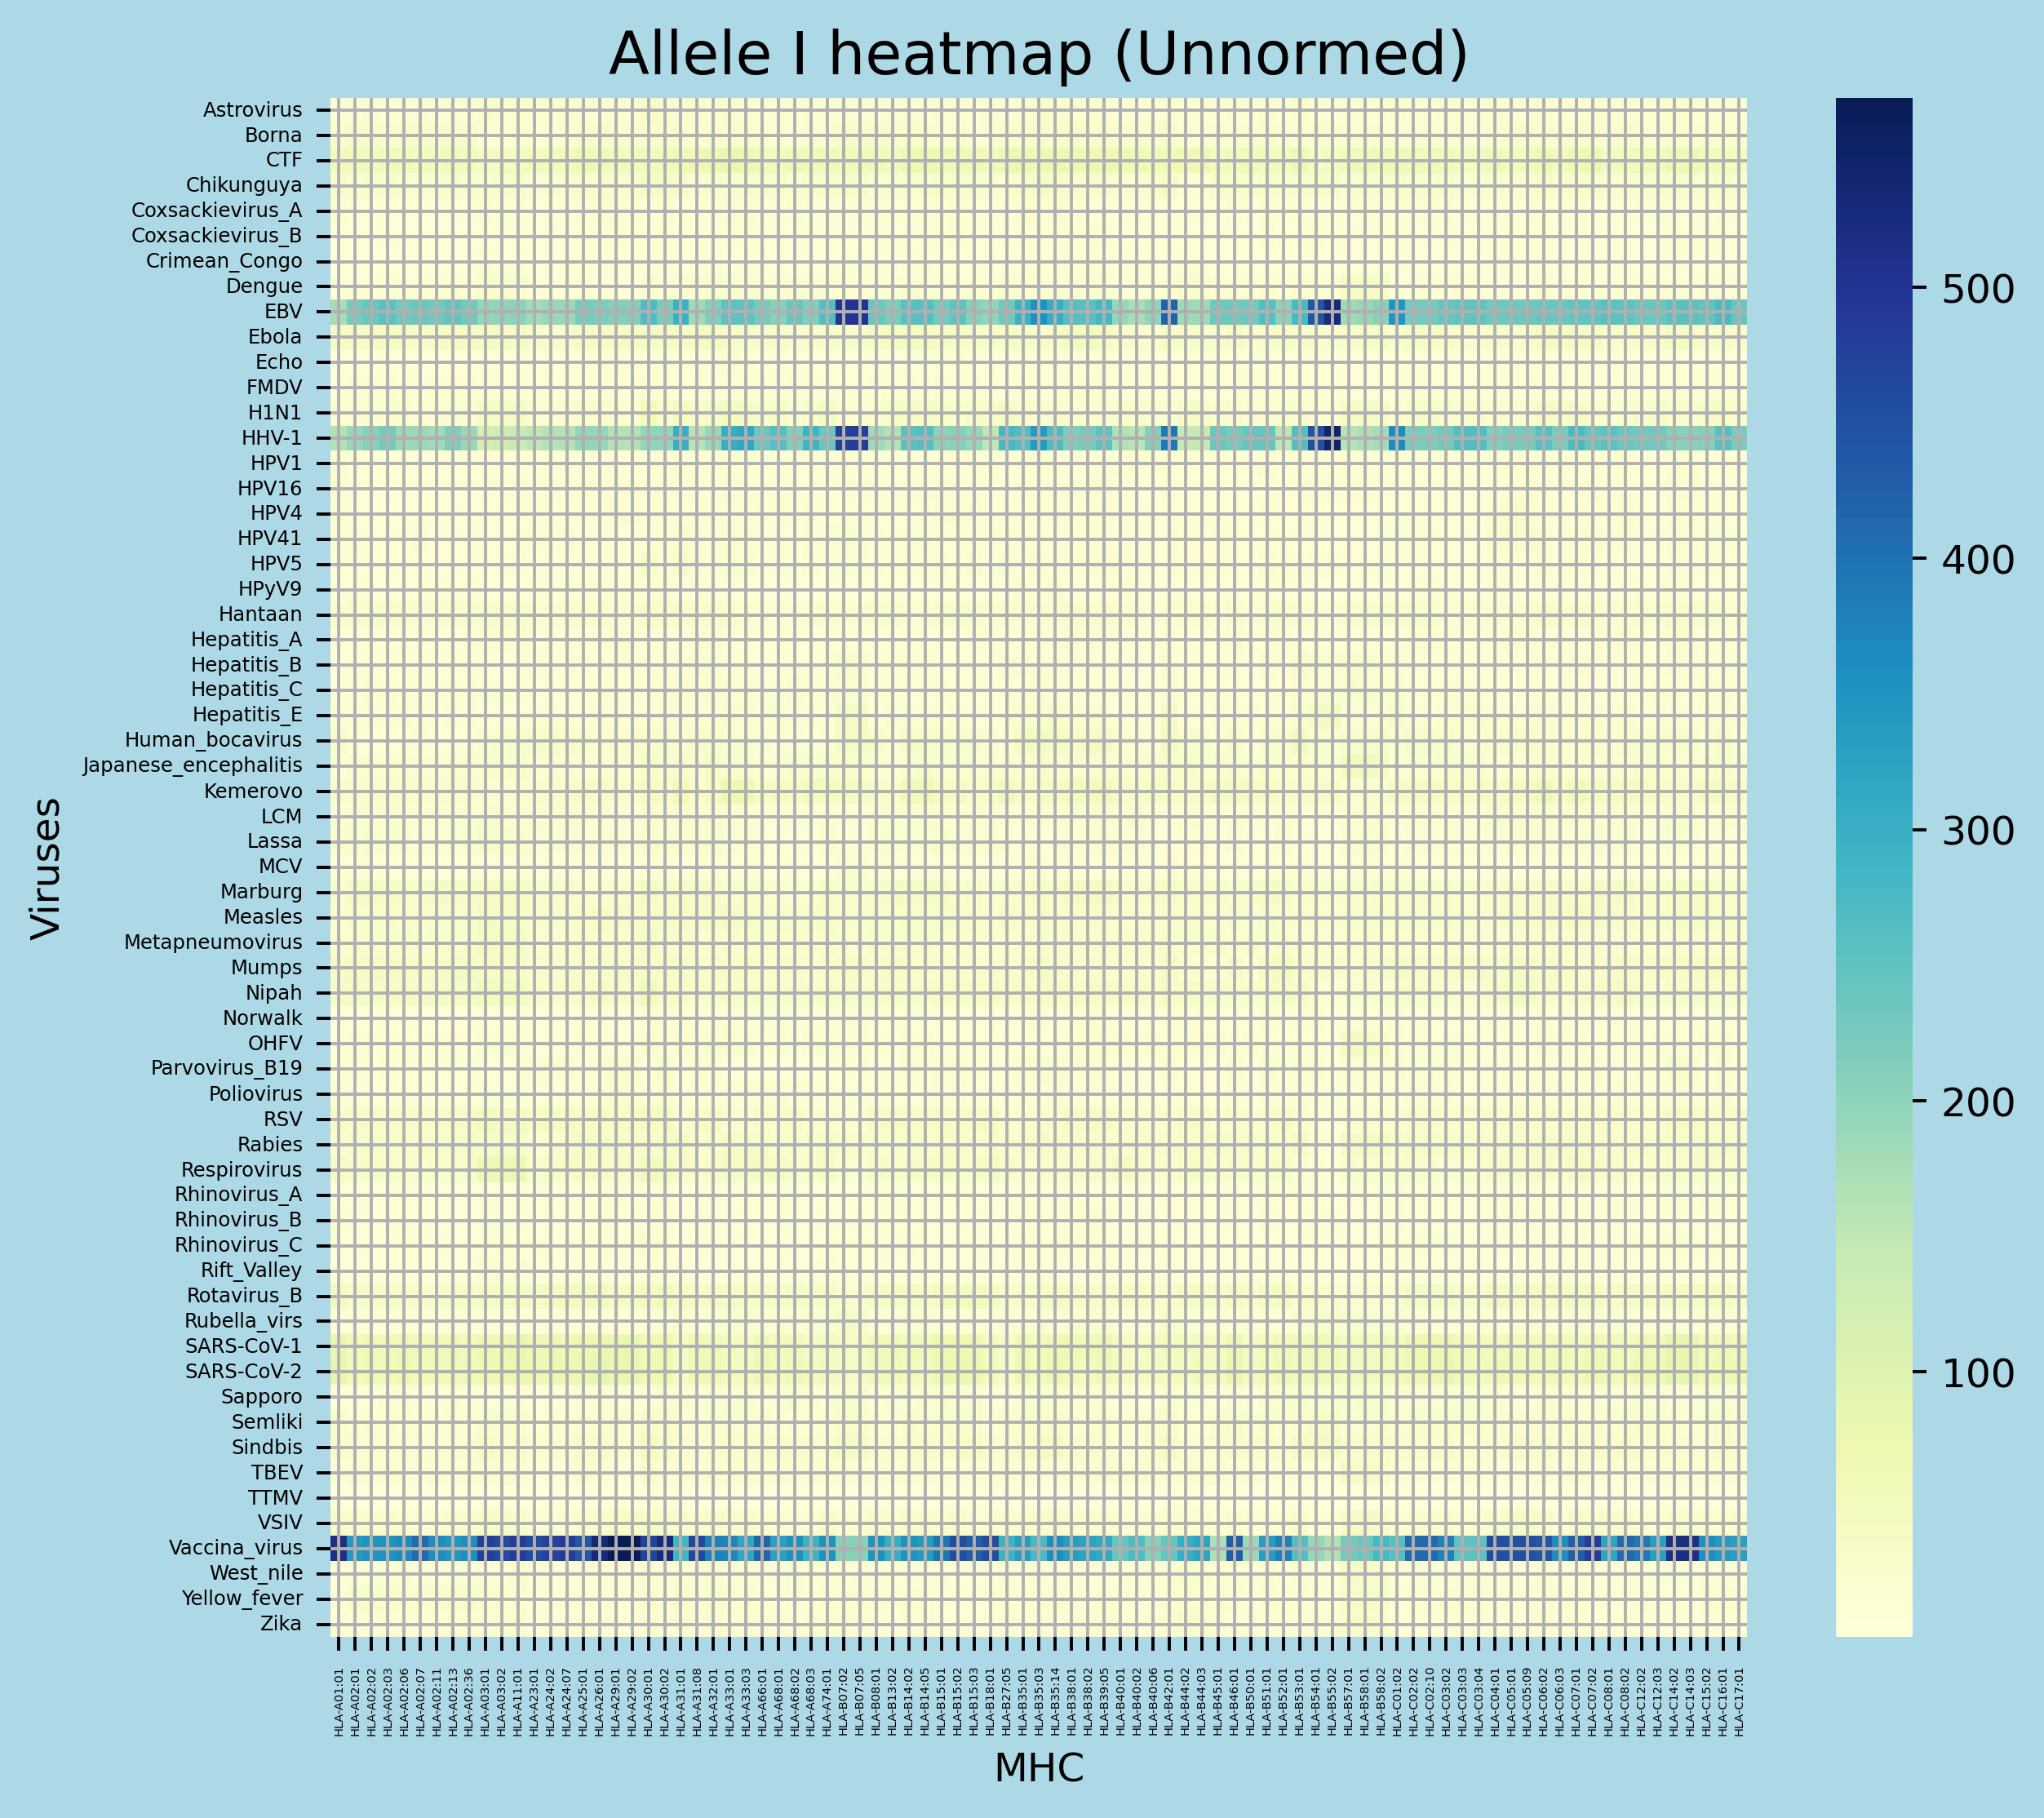

In [33]:
#MHCI alleles

RawData11= RawData1.copy()
RawData11= RawData11[['Virus', 'MHC', Value]]
RawData11= RawData11.pivot_table(index= 'Virus', columns= 'MHC', values= Value, aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(8, 7), dpi= 350)
sns.heatmap(data= RawData11, ax= axes, yticklabels= list(RawData11.index), xticklabels= list(RawData11.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 3)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("MHC")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Allele I heatmap ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/I_class_alleles_("+Switch+")_heatmap.png", bbox_inches= "tight")

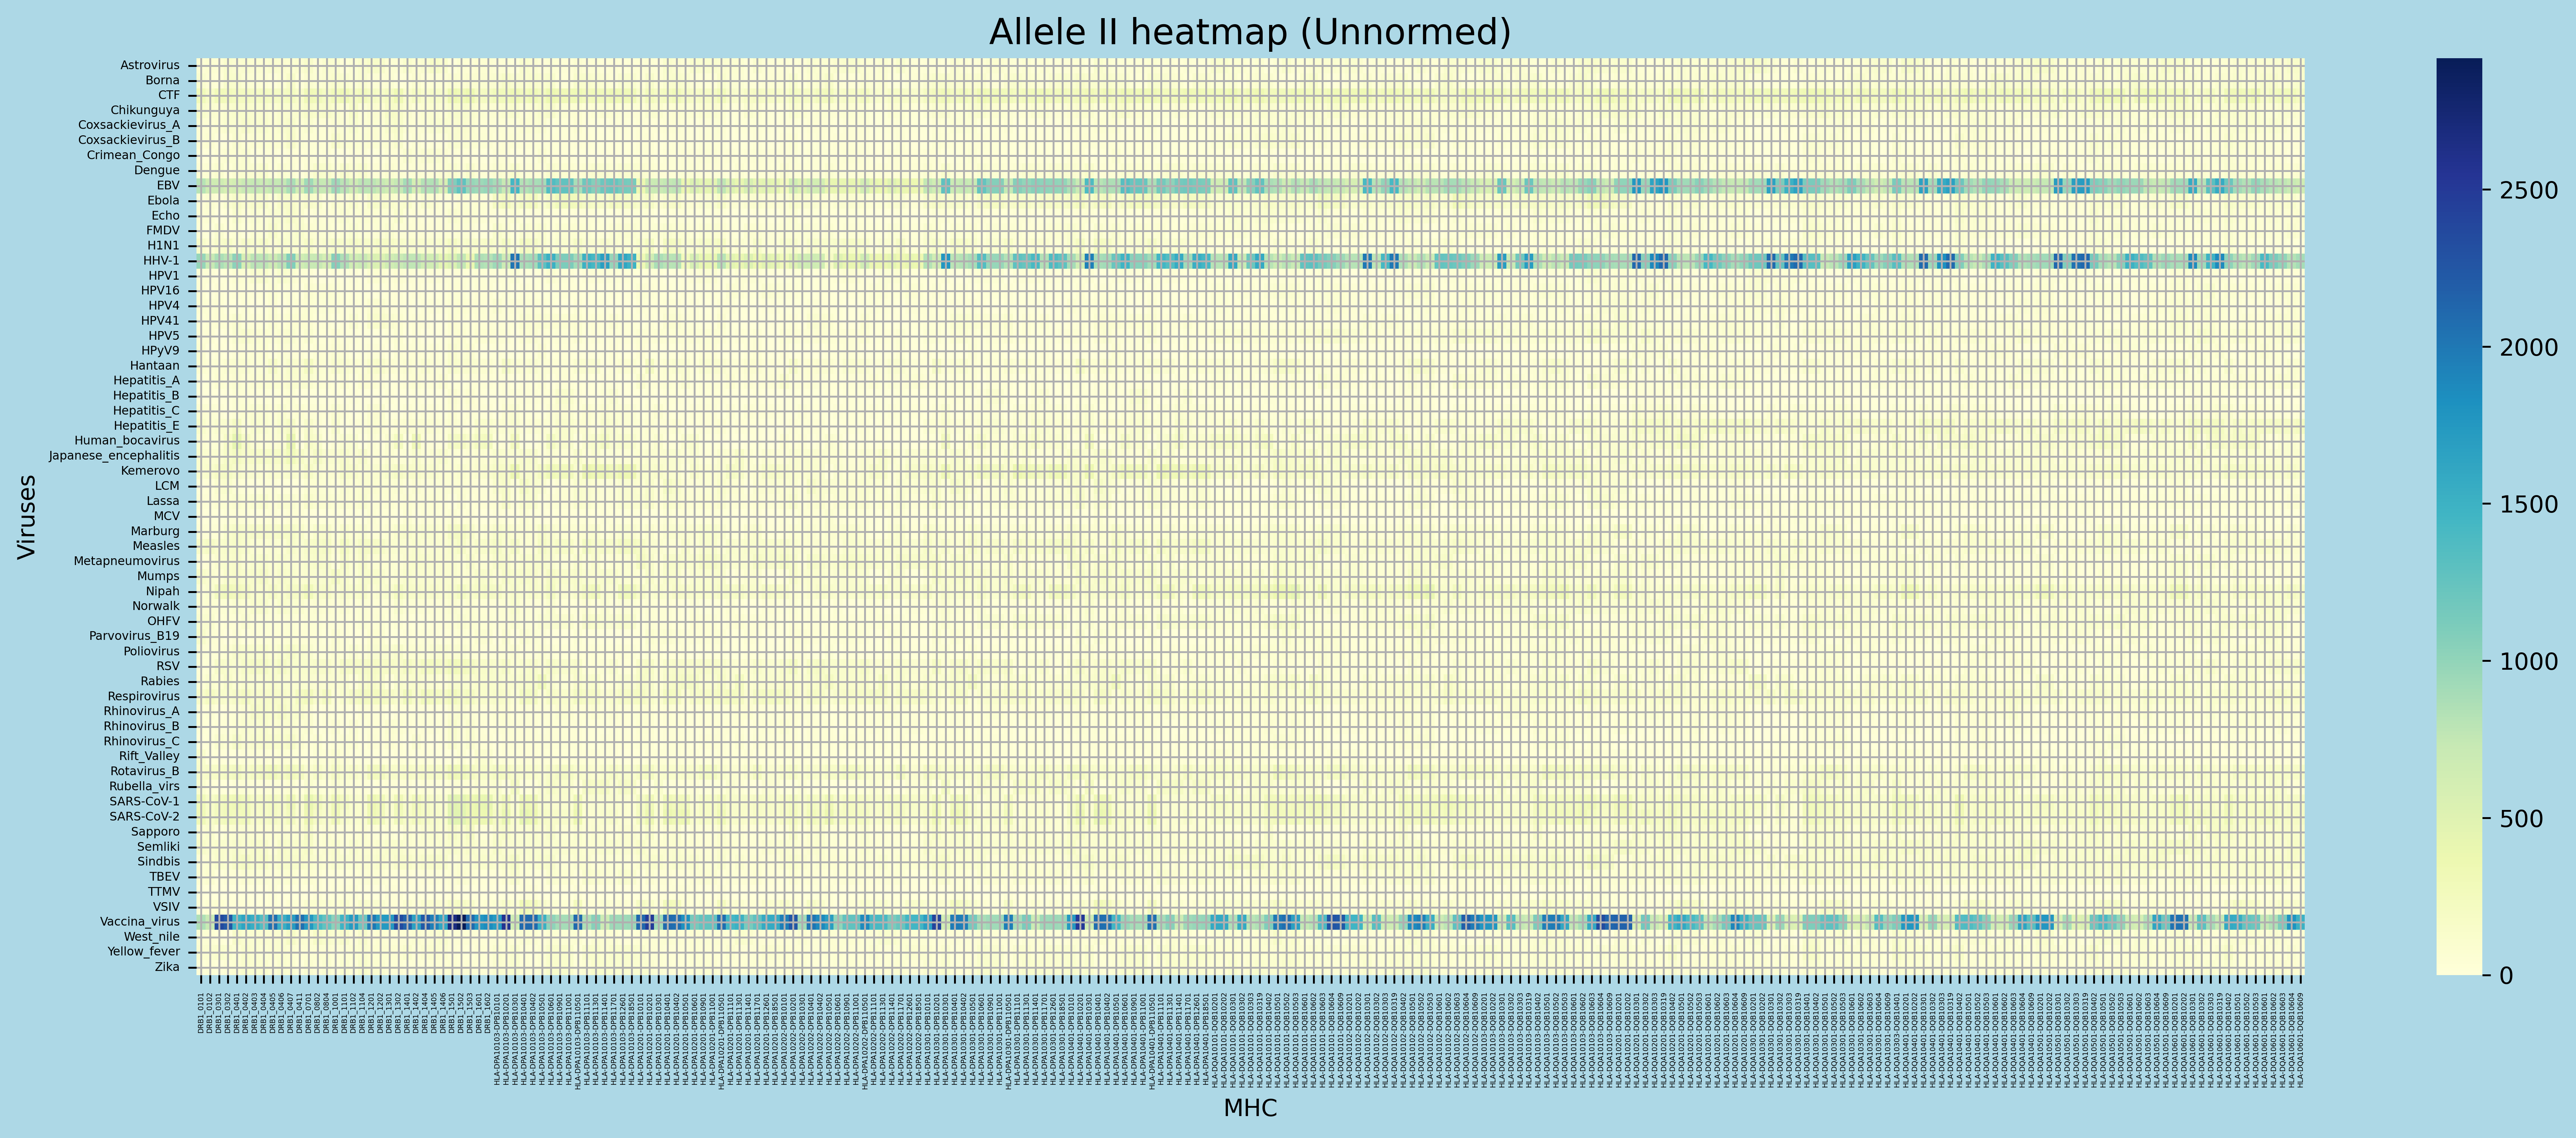

In [34]:
#MHCII alleles

RawData22= RawData2.copy()
RawData22= RawData22[['Virus', 'MHC', Value]]
RawData22= RawData22.pivot_table(index= 'Virus', columns= 'MHC', values= Value, aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(20, 7), dpi= 450)
sns.heatmap(data= RawData22, ax= axes, yticklabels= list(RawData22.index), xticklabels= list(RawData22.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 3)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("MHC")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Allele II heatmap ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/II_class_alleles_("+Switch+")_heatmap.png", bbox_inches= "tight")

### Alleles for specific groups  
group_type_class_alleles_(Switch)_heatmap.png

In [35]:
# Groups
Hepatitis= ["Hepatitis_A", "Hepatitis_B", "Hepatitis_C", "Hepatitis_E"]

Papilo= ["HPV41", "HPV5", "HPV4", "HPV1", "HPV16"]

#Fever= ["Marburg", "Ebola", "Lassa", "Nipah", "Rift_Valley", "Hantaan", "CTF", "Kemerovo", "Yellow_fever", 
#        "OHFV", "West_nile", "Dengue", "Zika", "Sindbis", "Chikunguya", "Semliki", "Crimean_Congo"] 

fever= ["Ebola", "Lassa", "Rift_Valley", "Hantaan", "Yellow_fever", 
        "OHFV", "Dengue", "Crimean_Congo"]

##### Switch between groups

In [71]:
NM= "fever" # Choose from Hepatitis, Papilo, fever, #Fever
if NM == "Hepatitis": Group= Hepatitis
elif NM == "Papilo": Group= Papilo
elif NM == "Fever": Group= Fever
elif NM == "fever": Group= fever

##### Plotting  
**run 4 times!**

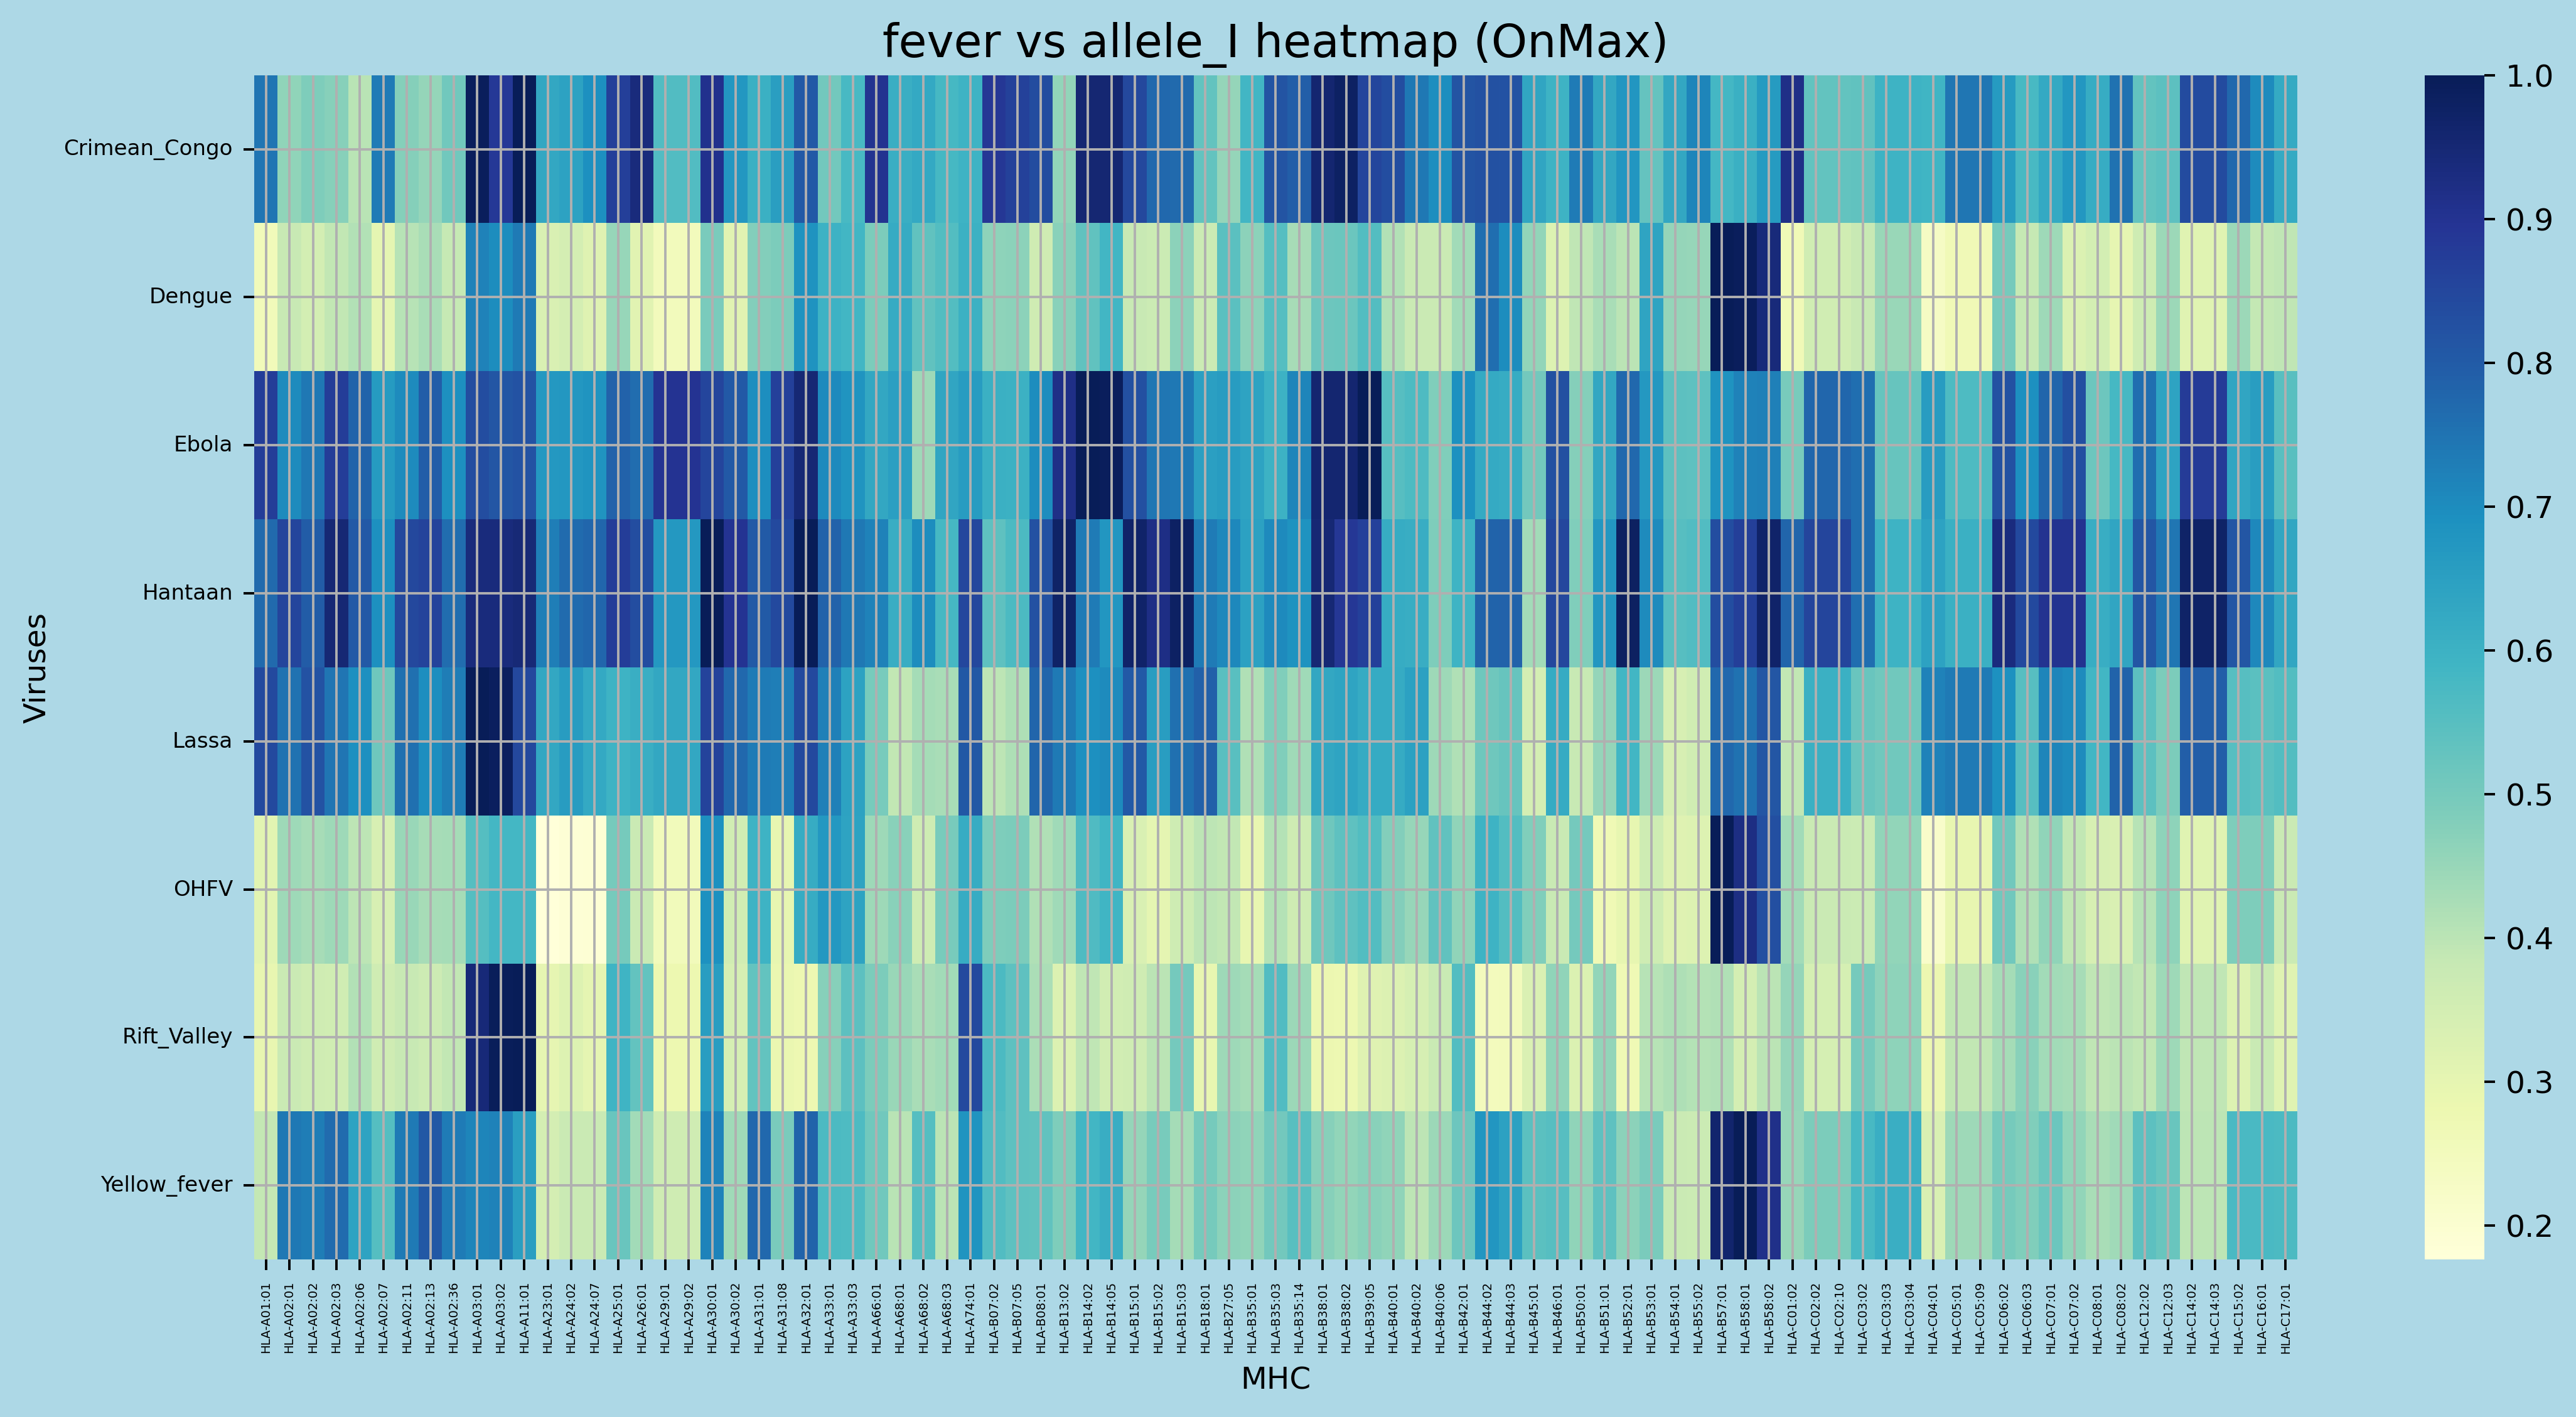

In [72]:
# Class I
RawData11= RawData1.copy()
RawData11= RawData11[['Virus', 'MHC', Value]]
RawData11= RawData11.loc[RawData11['Virus'].isin(Group)]
RawData11= RawData11.pivot_table(index= 'Virus', columns= 'MHC', values= Value, aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(15, 7), dpi= 350)
sns.heatmap(data= RawData11, ax= axes, yticklabels= list(RawData11.index), xticklabels= list(RawData11.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 4)
plt.yticks(fontsize= 7)
axes.set_ylabel("Viruses")
axes.set_xlabel("MHC")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title(NM+" vs allele_I heatmap ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/"+str(NM)+"_I_class_alleles_("+Switch+")_heatmap.png", bbox_inches= "tight")

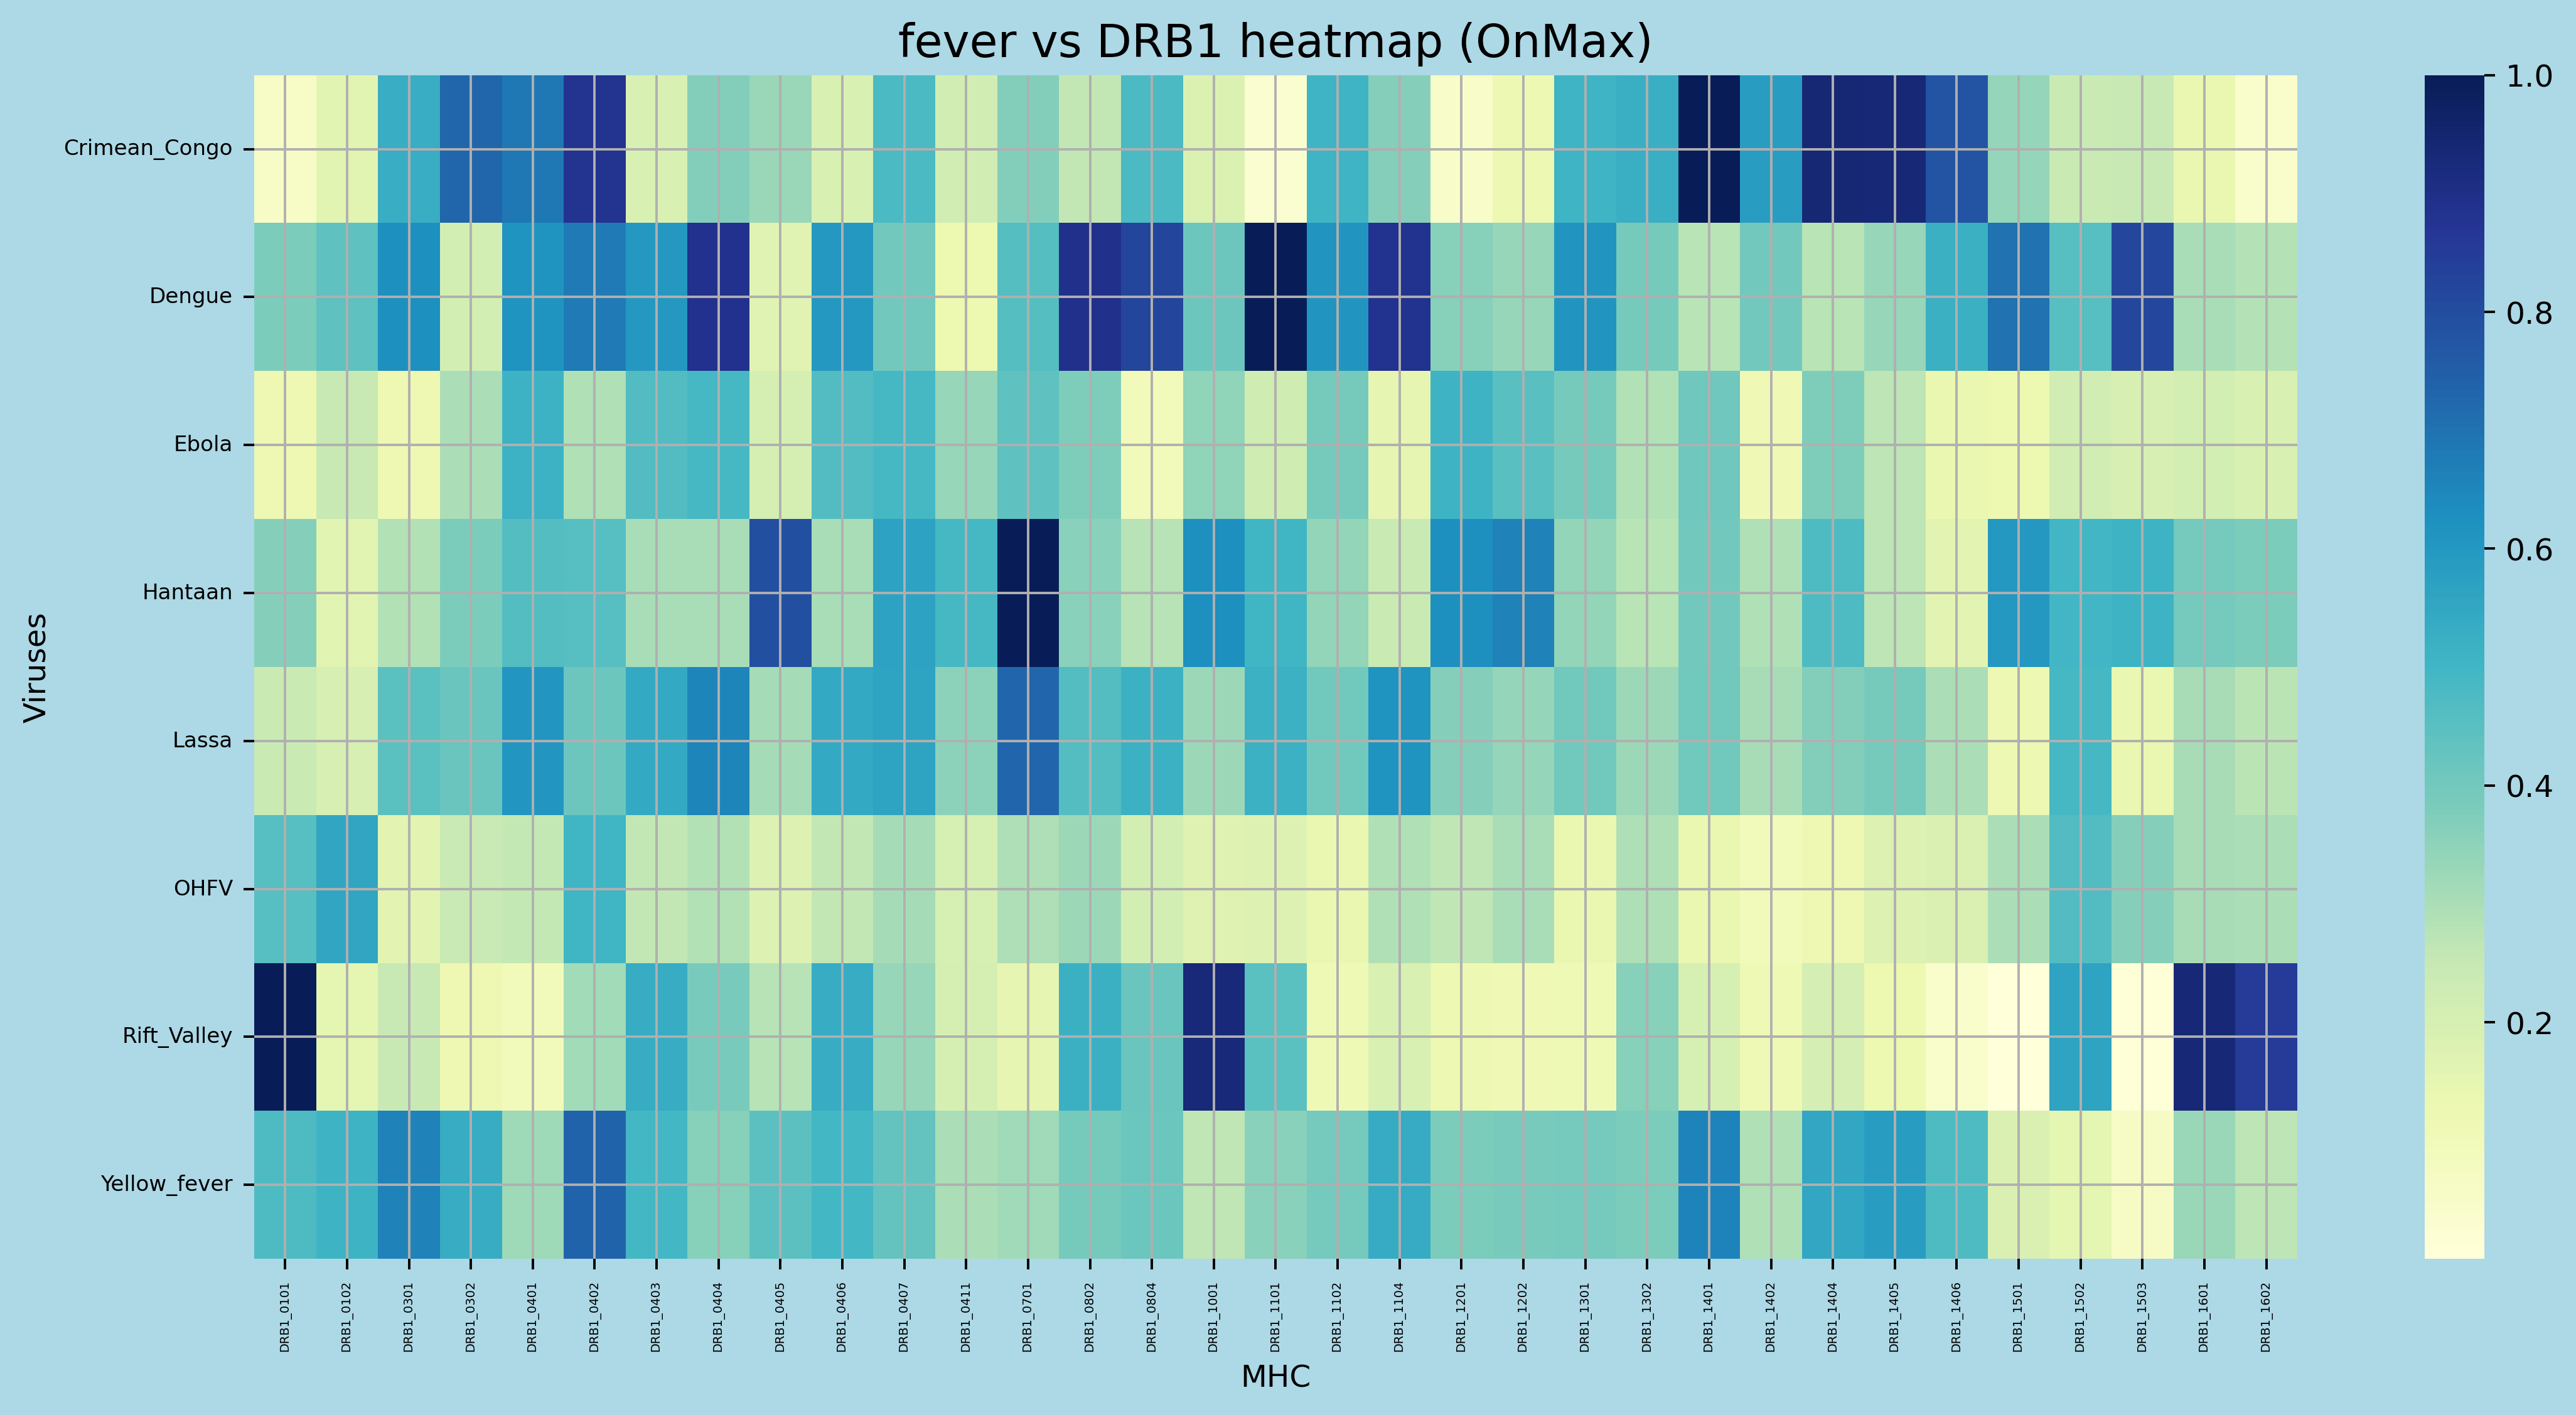

In [73]:
# DRB1
RawData22= RawData2.copy()
RawData22= RawData22[['Virus', 'MHC', Value]]
RawData22= RawData22.loc[RawData22['Virus'].isin(Group)]
RawData22= RawData22.loc[RawData22['MHC'].isin(DRB1)]
RawData22= RawData22.pivot_table(index= 'Virus', columns= 'MHC', values= Value, aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(15, 7), dpi= 350)
sns.heatmap(data= RawData22, ax= axes, yticklabels= list(RawData22.index), xticklabels= list(RawData22.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 4)
plt.yticks(fontsize= 7)
axes.set_ylabel("Viruses")
axes.set_xlabel("MHC")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title(NM+" vs DRB1 heatmap ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/"+NM+"_DRB1_alleles_("+Switch+")_heatmap.png", bbox_inches= "tight")

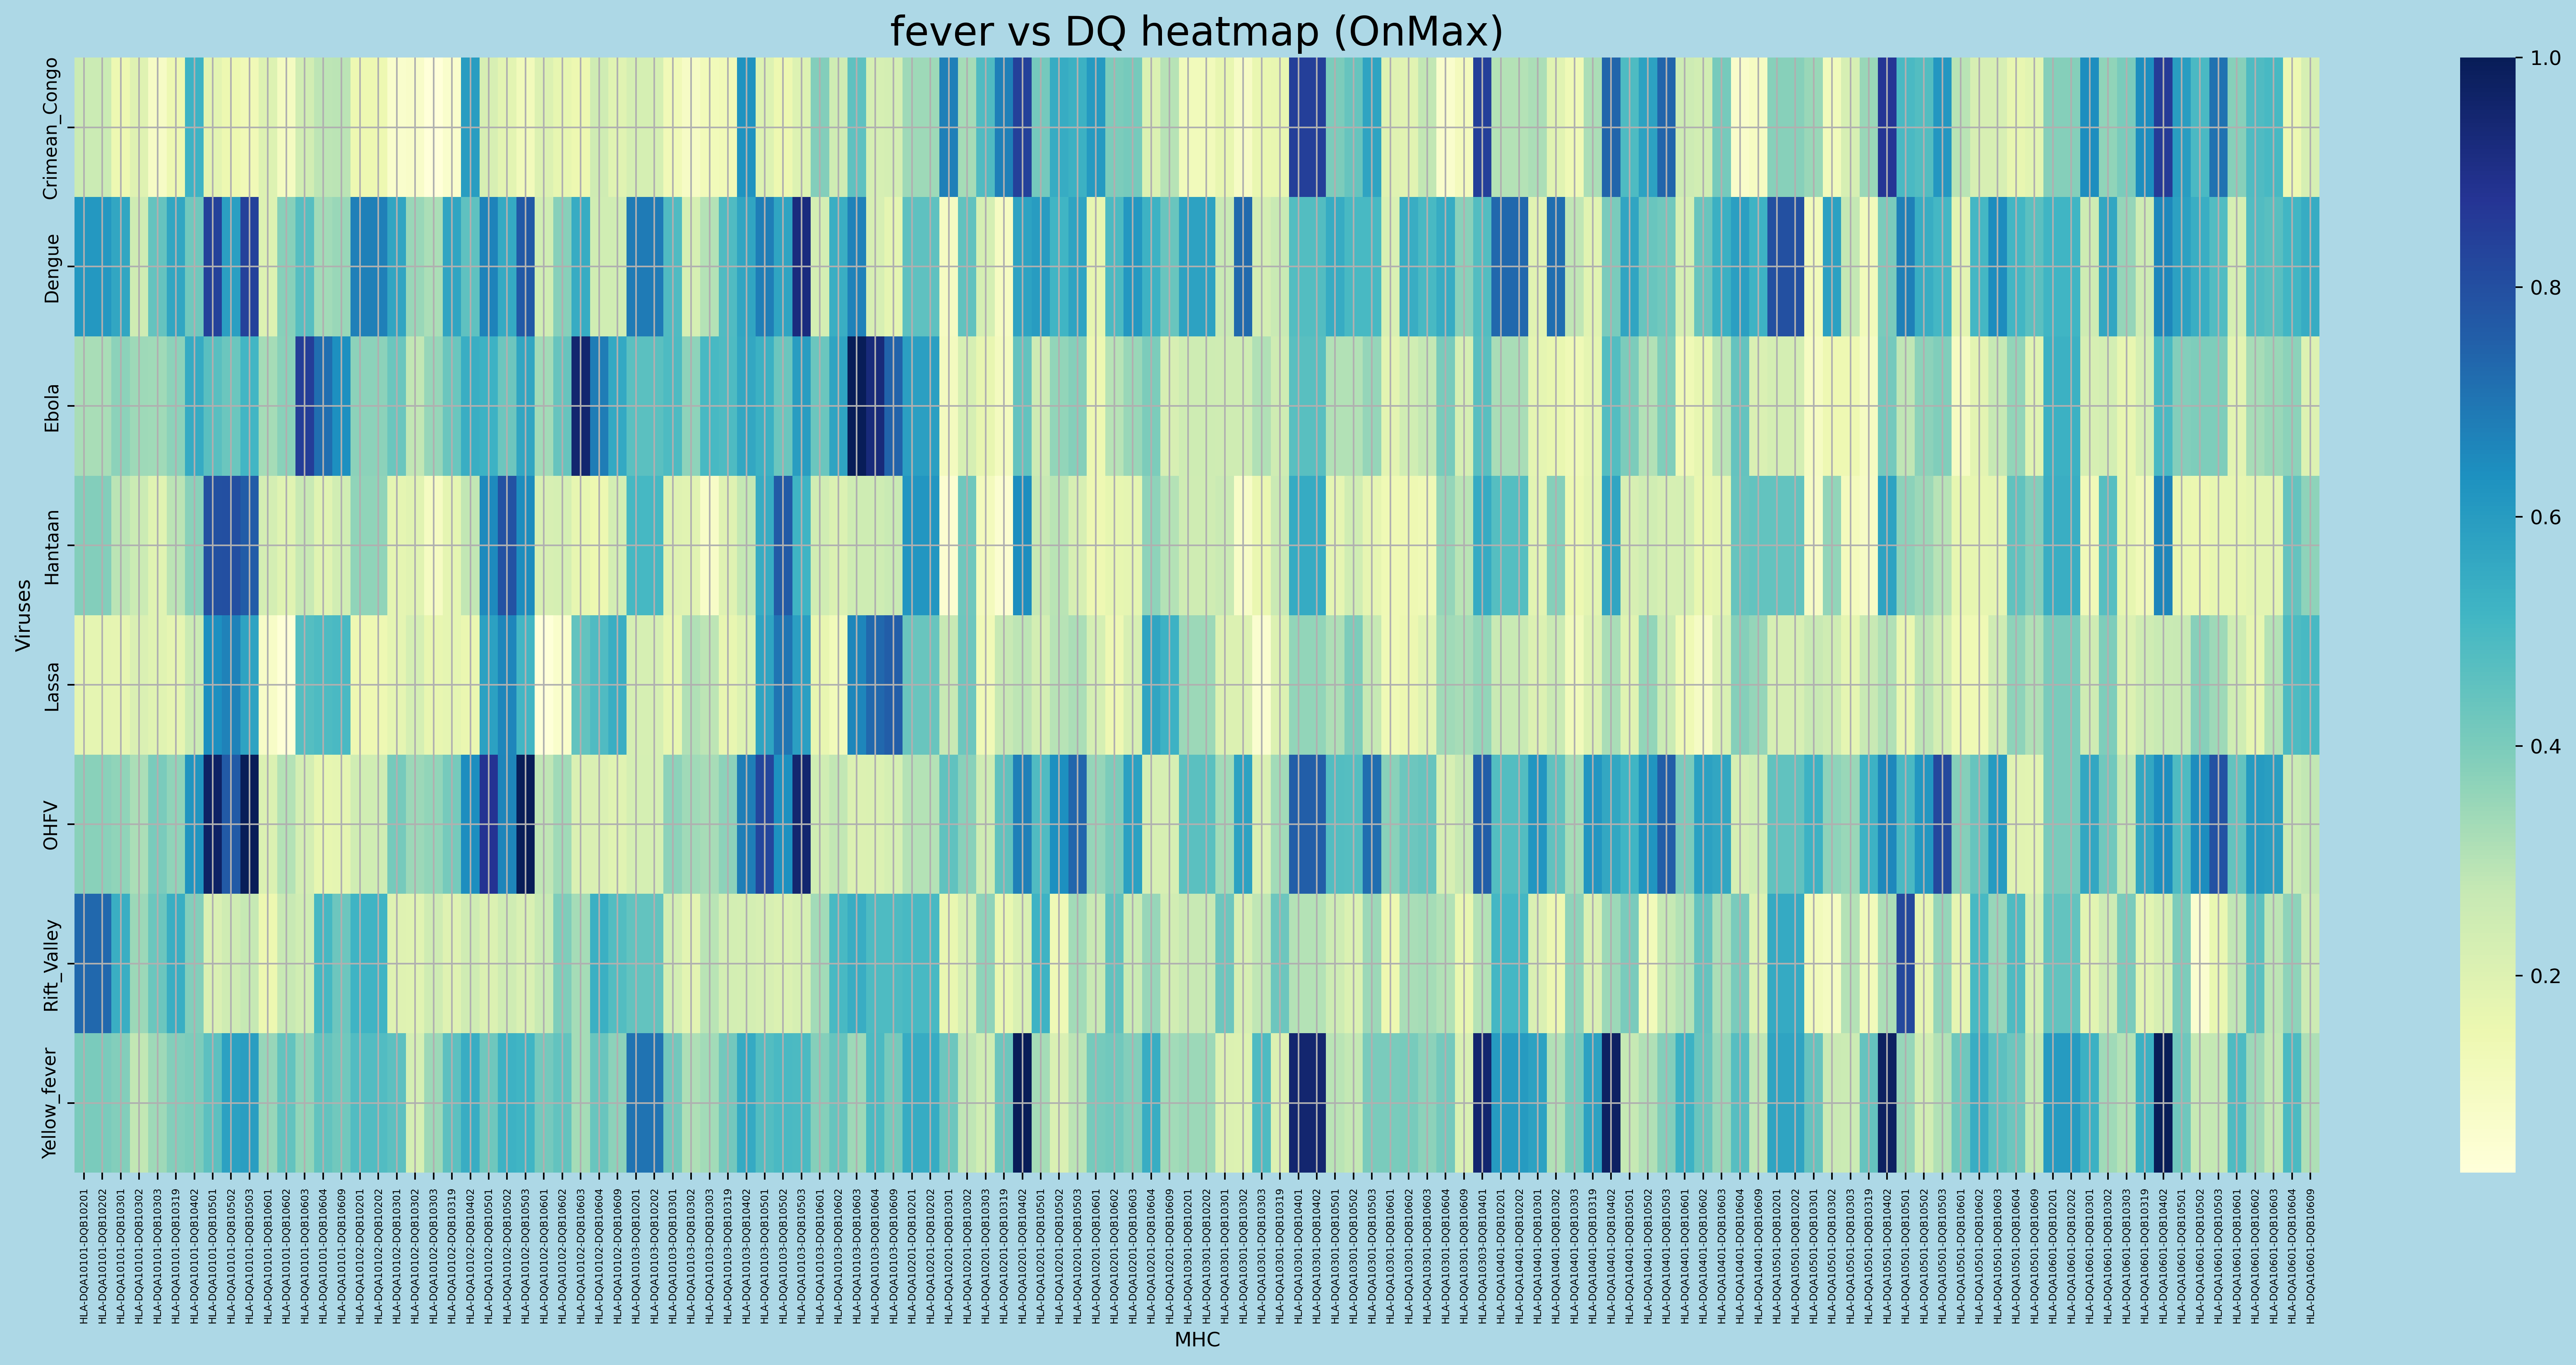

In [74]:
# DQ
RawData22= RawData2.copy()
RawData22= RawData22[['Virus', 'MHC', Value]]
RawData22= RawData22.loc[RawData22['Virus'].isin(Group)]
RawData22= RawData22.loc[RawData22['MHC'].isin(DQ)]
RawData22= RawData22.pivot_table(index= 'Virus', columns= 'MHC', values= Value, aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(25, 10), dpi= 350)
sns.heatmap(data= RawData22, ax= axes, yticklabels= list(RawData22.index), xticklabels= list(RawData22.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 5)
plt.yticks(fontsize= 9)
axes.set_ylabel("Viruses")
axes.set_xlabel("MHC")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title(NM+" vs DQ heatmap ("+Switch+")", fontsize= 20)
plt.plot()
plt.savefig("../Output/"+NM+"_DQ_alleles_("+Switch+")_heatmap.png", bbox_inches= "tight")

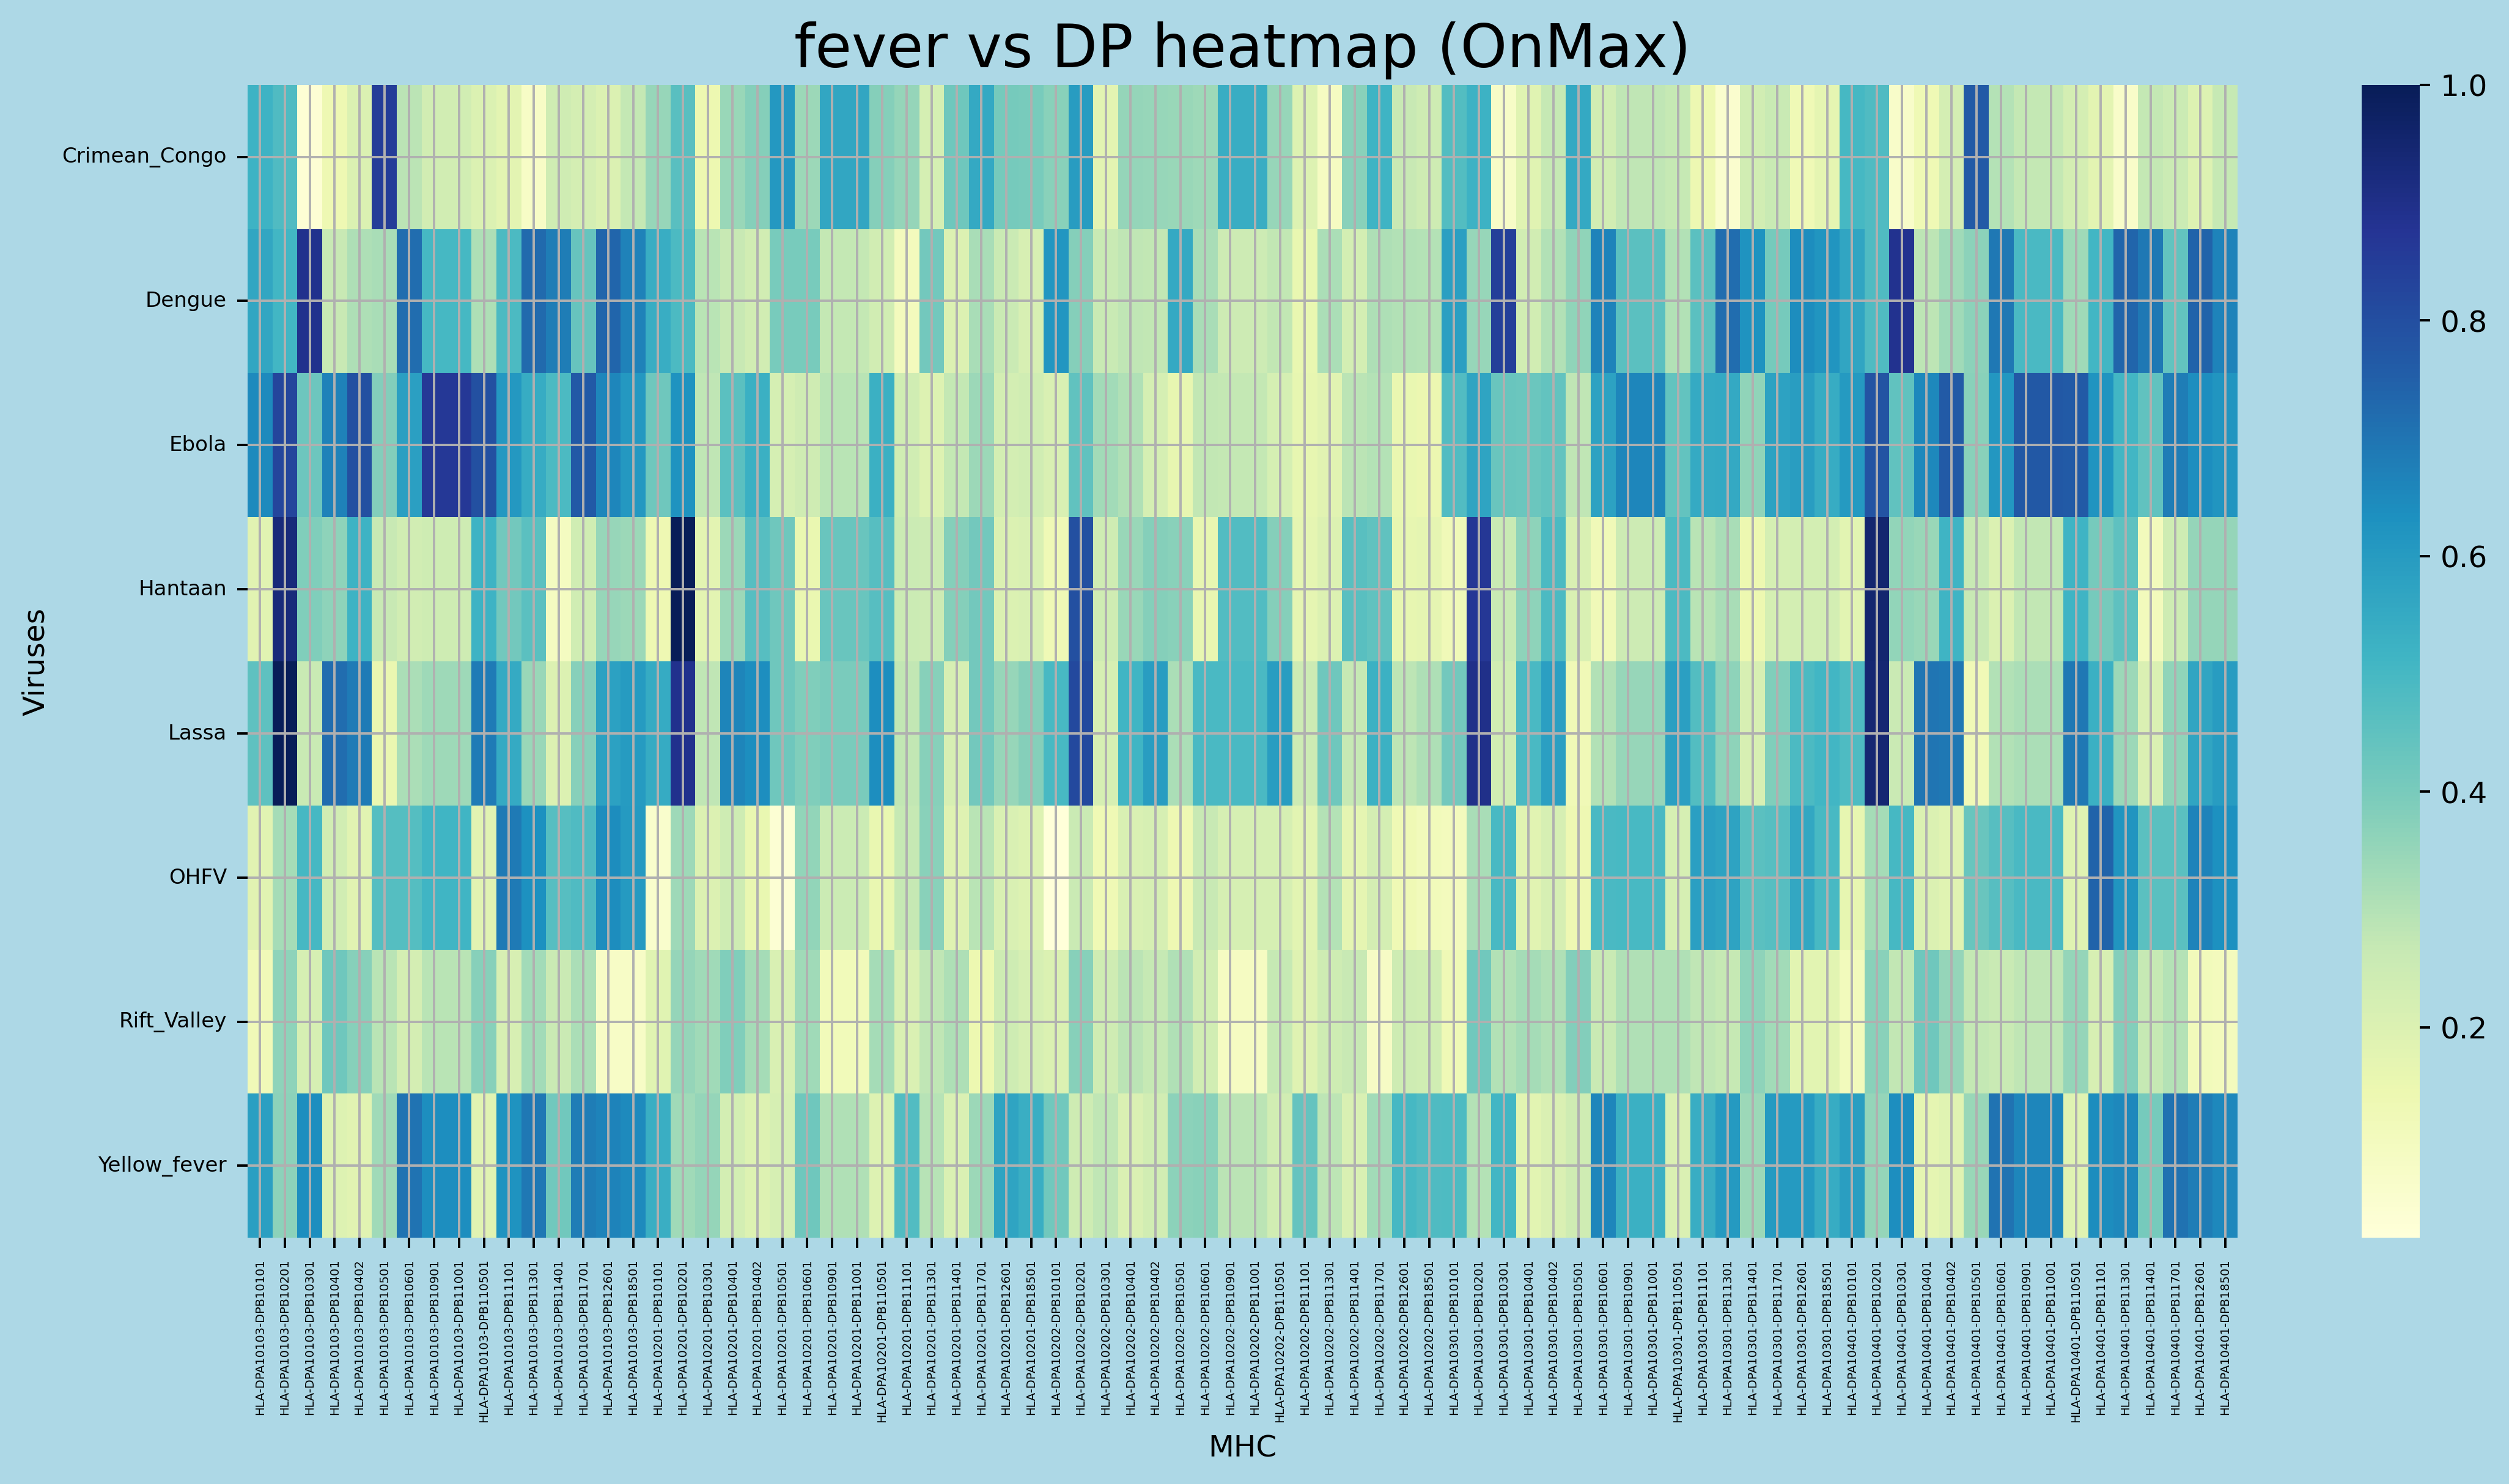

In [75]:
# DP
RawData22= RawData2.copy()
RawData22= RawData22[['Virus', 'MHC', Value]]
RawData22= RawData22.loc[RawData22['Virus'].isin(Group)]
RawData22= RawData22.loc[RawData22['MHC'].isin(DP)]
RawData22= RawData22.pivot_table(index= 'Virus', columns= 'MHC', values= Value, aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(15, 7), dpi= 350)
sns.heatmap(data= RawData22, ax= axes, yticklabels= list(RawData22.index), xticklabels= list(RawData22.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 4)
plt.yticks(fontsize= 7)
axes.set_ylabel("Viruses")
axes.set_xlabel("MHC")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title(NM+" vs DP heatmap ("+Switch+")", fontsize= 20)
plt.plot()
plt.savefig("../Output/"+NM+"_DP_alleles_("+Switch+")_heatmap.png", bbox_inches= "tight")

### Selected (based on population data) alleles, single field data  ###NOT USED, optional###  
type_class_alleles_SELECTED_(Switch)_heatmap.png  
type_class_Populations_(Switch)_heatmap.png


#### Choose Selected Alleles

In [76]:
Selected_MHCI={
    "Pop 1": ["HLA-A24"] , 
    "Pop 2": ["HLA-B15", "HLA-A30", "HLA-A68"], 
    "Pop 3": ["HLA-А23", "HLA-A33", "HLA-B53", "HLA-B58"], 
    "Pop 4": ["HLA-A01", "HLA-A03", "HLA-B07", "HLA-B44"],
    "Pop 5": ["HLA-B51"], 
    "Pop 6": ["HLA-A31", "HLA-A68", "HLA-B35", "HLA-B39", "HLA-B48"], 
    "Pop 7": ["HLA-A34", "HLA-B13", "HLA-B56"], 
    "Pop 8": ["HLA-B55"], 
    "Pop 9": ["HLA-B27"], 
    "Pop 10": ["HLA-B46", "HLA-B56", "HLA-A11", "HLA-B15", "HLA-B40"]}

Selected_MHCII={
    "Pop 1": ["DRB1_04", "DRB1_08", "DRB1_14"], 
    "Pop 2": ["DRB1_15"], 
    "Pop 3": ["DRB1_09"], 
    "Pop 4": ["DRB1_01", "DRB1_03", "DRB1_04", "DRB1_07", "DRB1_15"], 
    "Pop 5": ["DRB1_11"], 
    "Pop 6": ["DRB1_11", "DRB1_13", "DRB1_15"]}


In [77]:
Second_pole= list(RawData1['MHC'].unique())
First_pole_I= {}

for x in Second_pole:
    FP=x[:-3]
    try:
        First_pole_I[FP]+= [x]
    except: First_pole_I[FP]= [x]

Second_pole= list(RawData2['MHC'].unique())
First_pole_II= {}

for x in Second_pole:
    FP=x[:-2]
    try:
        First_pole_II[FP]+= [x]
    except: First_pole_II[FP]= [x]

Available_I_onepole= list(First_pole_I.keys())
Available_II_onepole= list(First_pole_II.keys())

#### Saving a table

In [93]:
ColNames= ["Virus", "Allele type", "Group", "Allele", "Score"]

To_Panda_onepole= []

#MHCI
for x in list(RawData1['Virus'].unique()): # viral names
    for y in list(Selected_MHCI.keys()): # populations
        for z in Selected_MHCI[y]: # selected alleles
            if z in Available_I_onepole: 
                  Tmp= RawData1.copy()
                  Tmp= Tmp.loc[Tmp['Virus'] == x]
                  Tmp= Tmp.loc[Tmp['MHC'].isin(list(First_pole_I[z]))]
                  Score= Tmp[Value].sum()/len(Tmp)
                  To_Panda_onepole+= [[x, "I", y, z, Score]]
                  
#MHCII
for x in list(RawData1['Virus'].unique()): # viral names
    for y in list(Selected_MHCII.keys()): # populations
        for z in Selected_MHCII[y]: # selected alleles
            if z in Available_II_onepole: 
                  Tmp= RawData2.copy()
                  Tmp= Tmp.loc[Tmp['Virus'] == x]
                  Tmp= Tmp.loc[Tmp['MHC'].isin(list(First_pole_II[z]))]
                  Score= Tmp[Value].sum()/len(Tmp)
                  To_Panda_onepole+= [[x, "II", y, z, Score]]
                  
Panda_sel= pd.DataFrame(data= To_Panda_onepole, columns= ColNames)

with pd.ExcelWriter('../Output/Selected_Alleles_data.xlsx') as writer:  
    Panda_sel.to_excel(writer)

#### Plotting alleles

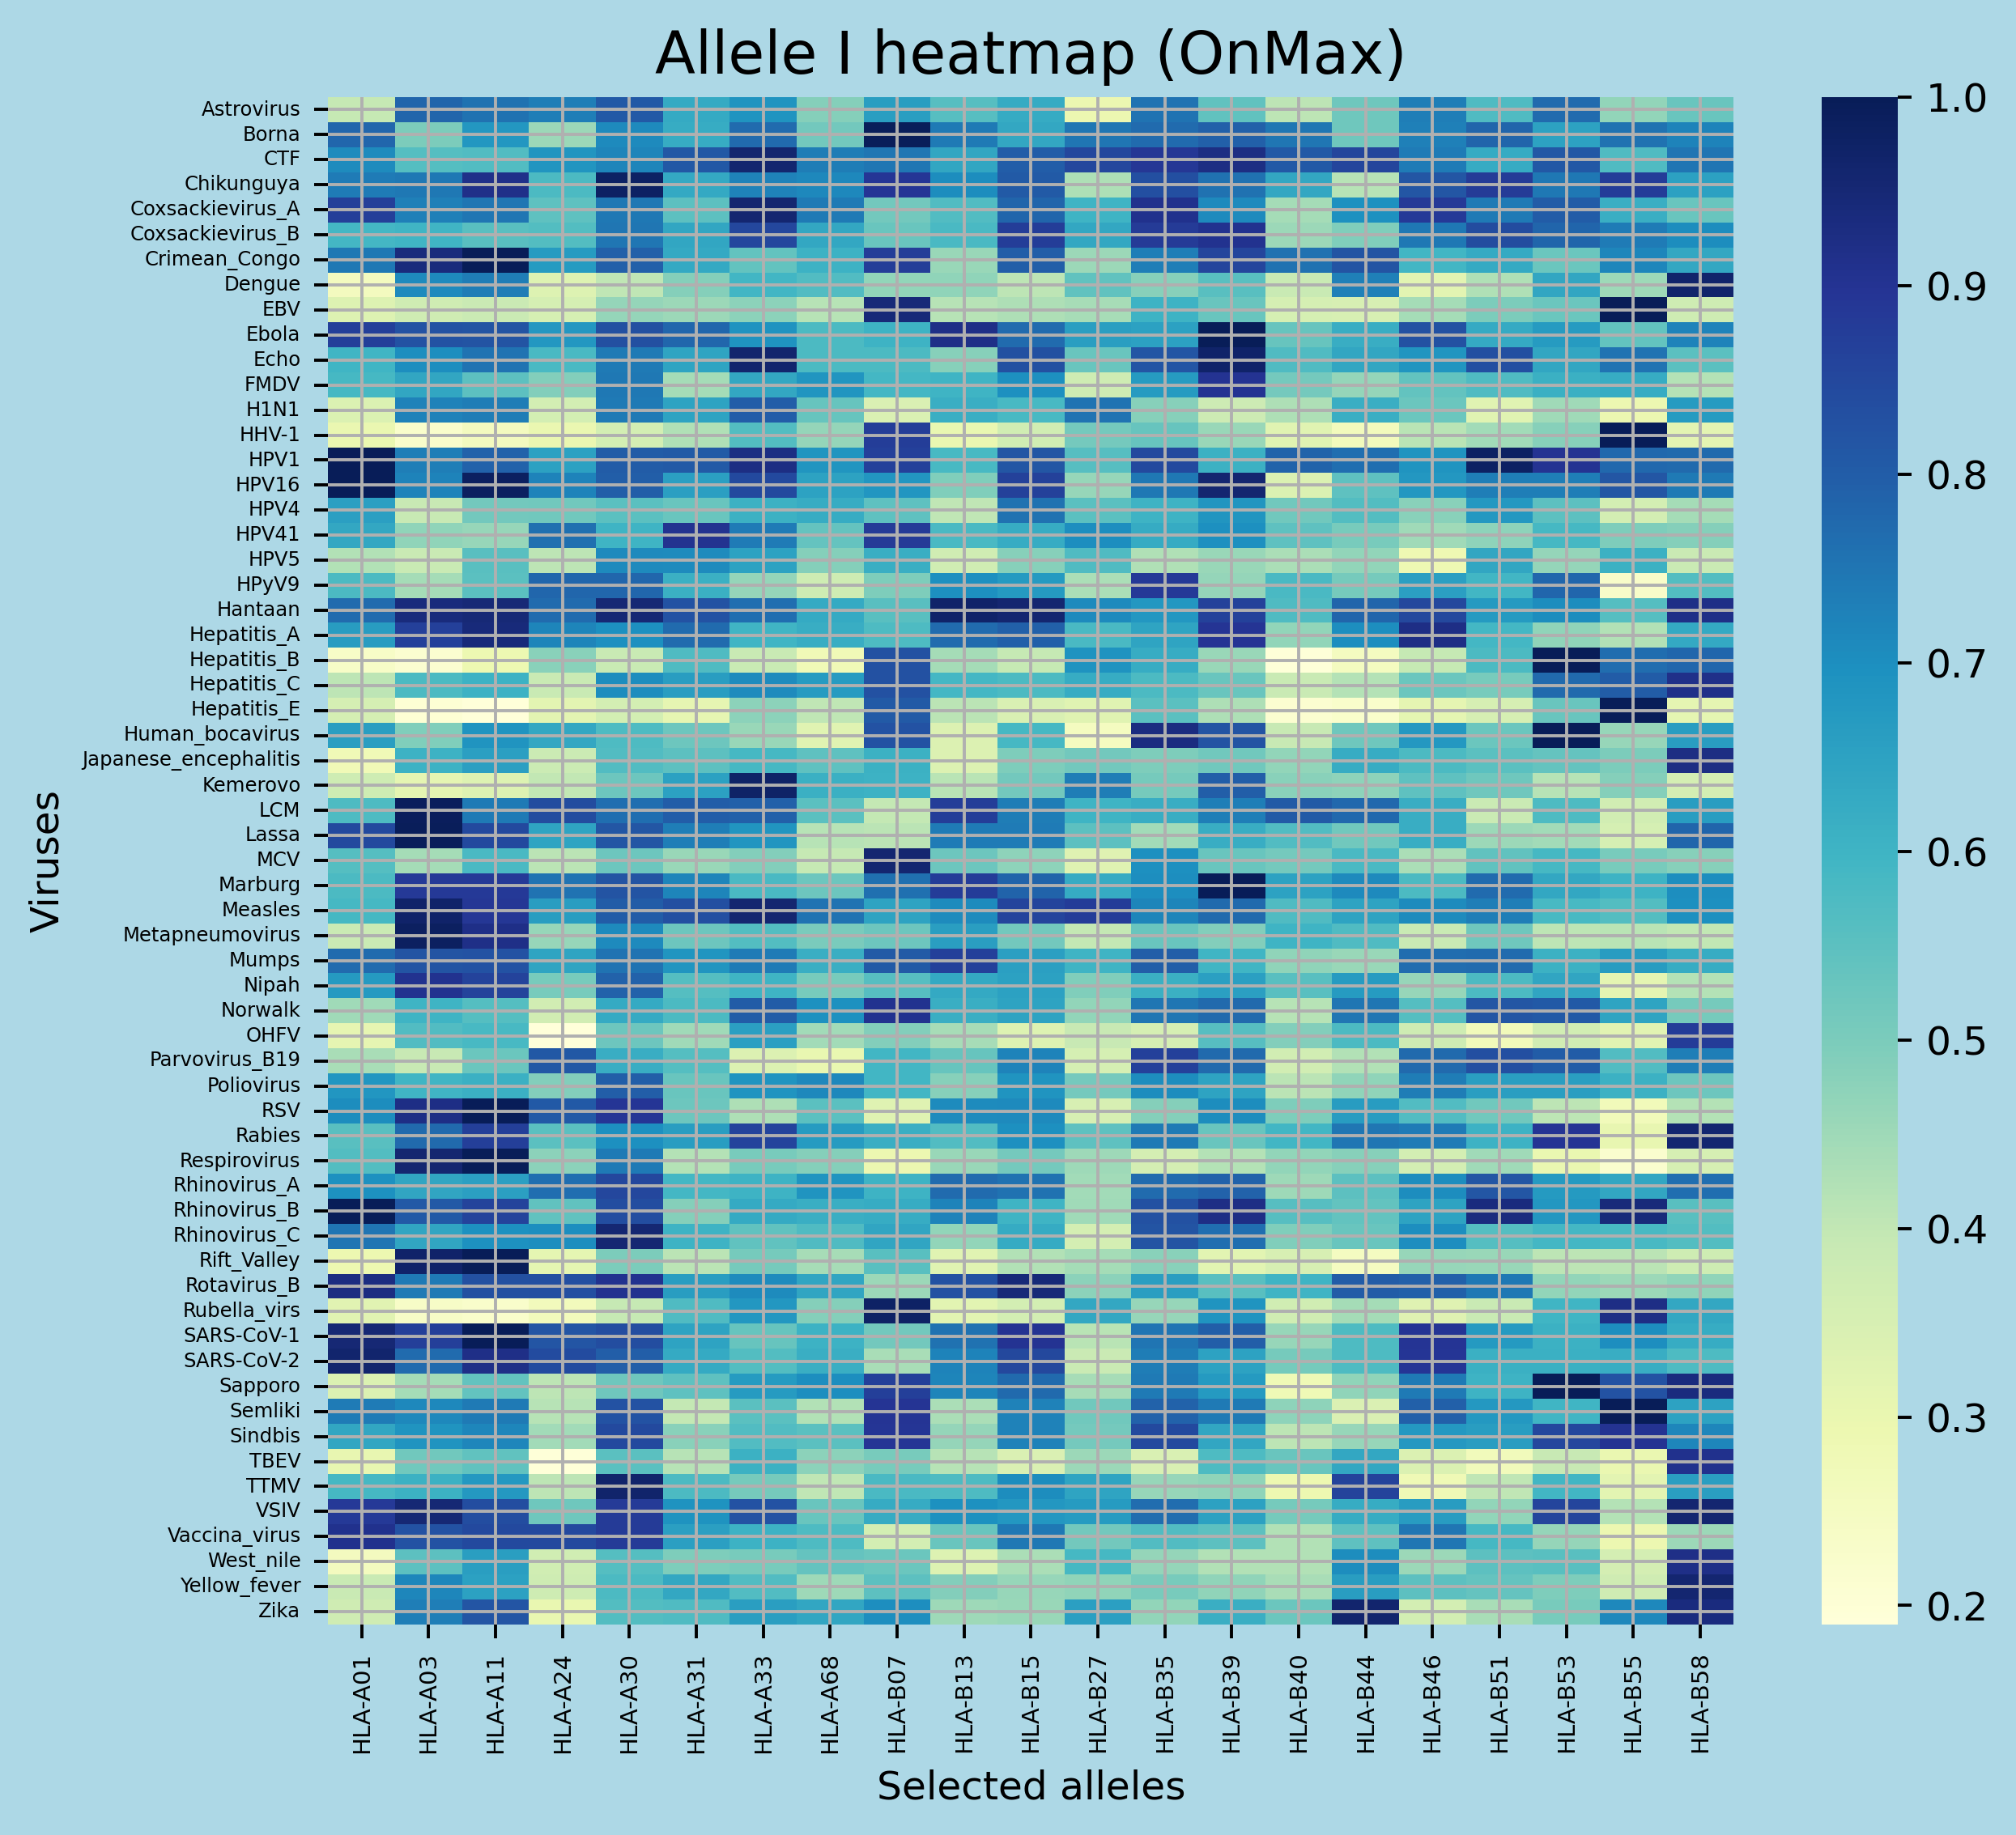

In [94]:
Draw1= Panda_sel.copy() # See alleles to switch 
Draw1= Draw1.loc[Draw1['Allele type'] == "I"]
Draw1= Draw1[['Virus', 'Allele', 'Score']]
Draw1= Draw1.pivot_table(index= 'Virus', columns= 'Allele', values= 'Score', aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(8, 7), dpi= 350)
sns.heatmap(data= Draw1, ax= axes, yticklabels= list(Draw1.index), xticklabels= list(Draw1.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 6)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("Selected alleles")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Allele I heatmap ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/I_class_alleles_SELECTED_("+Switch+")_heatmap.png", bbox_inches= "tight")

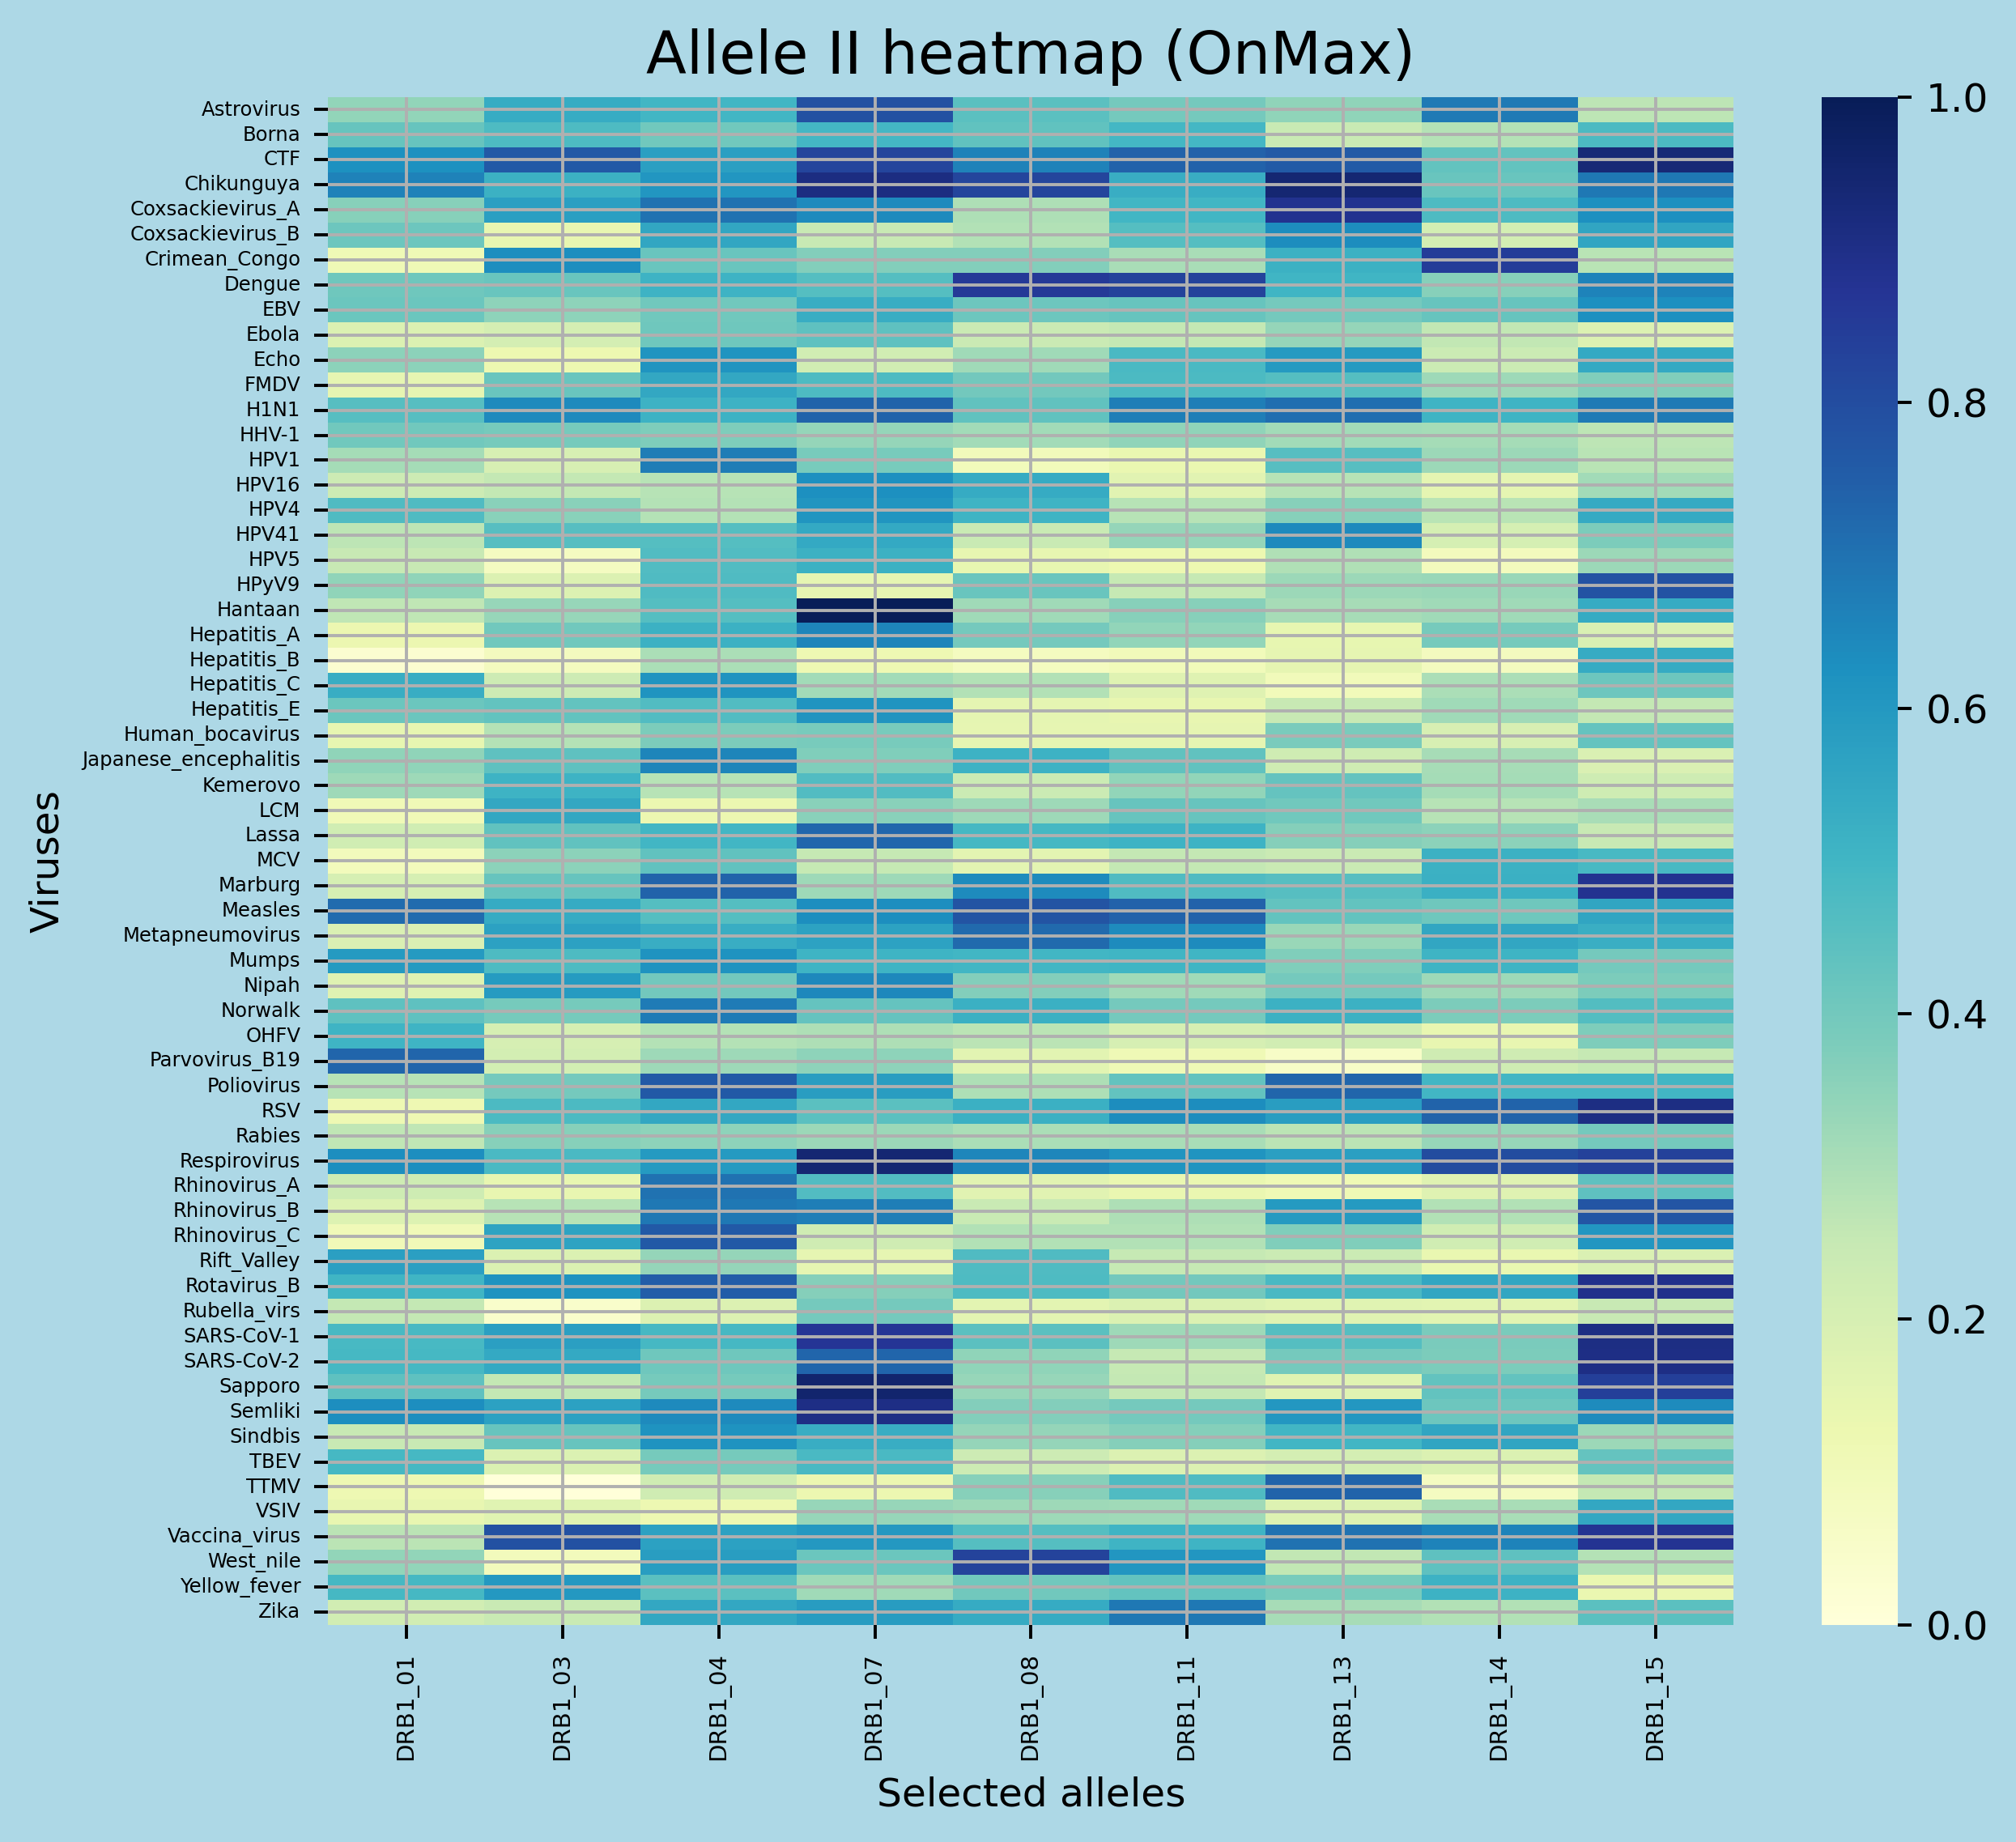

In [95]:
Draw2= Panda_sel.copy()
Draw2= Draw2.loc[Draw2['Allele type'] == "II"]
Draw2= Draw2[['Virus', 'Allele', 'Score']]
Draw2= Draw2.pivot_table(index= 'Virus', columns= 'Allele', values= 'Score', aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(8, 7), dpi= 350)
sns.heatmap(data= Draw2, ax= axes, yticklabels= list(Draw2.index), xticklabels= list(Draw2.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 6)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("Selected alleles")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Allele II heatmap ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/II_class_alleles_SELECTED_("+Switch+")_heatmap.png", bbox_inches= "tight")

#### Plotting populations

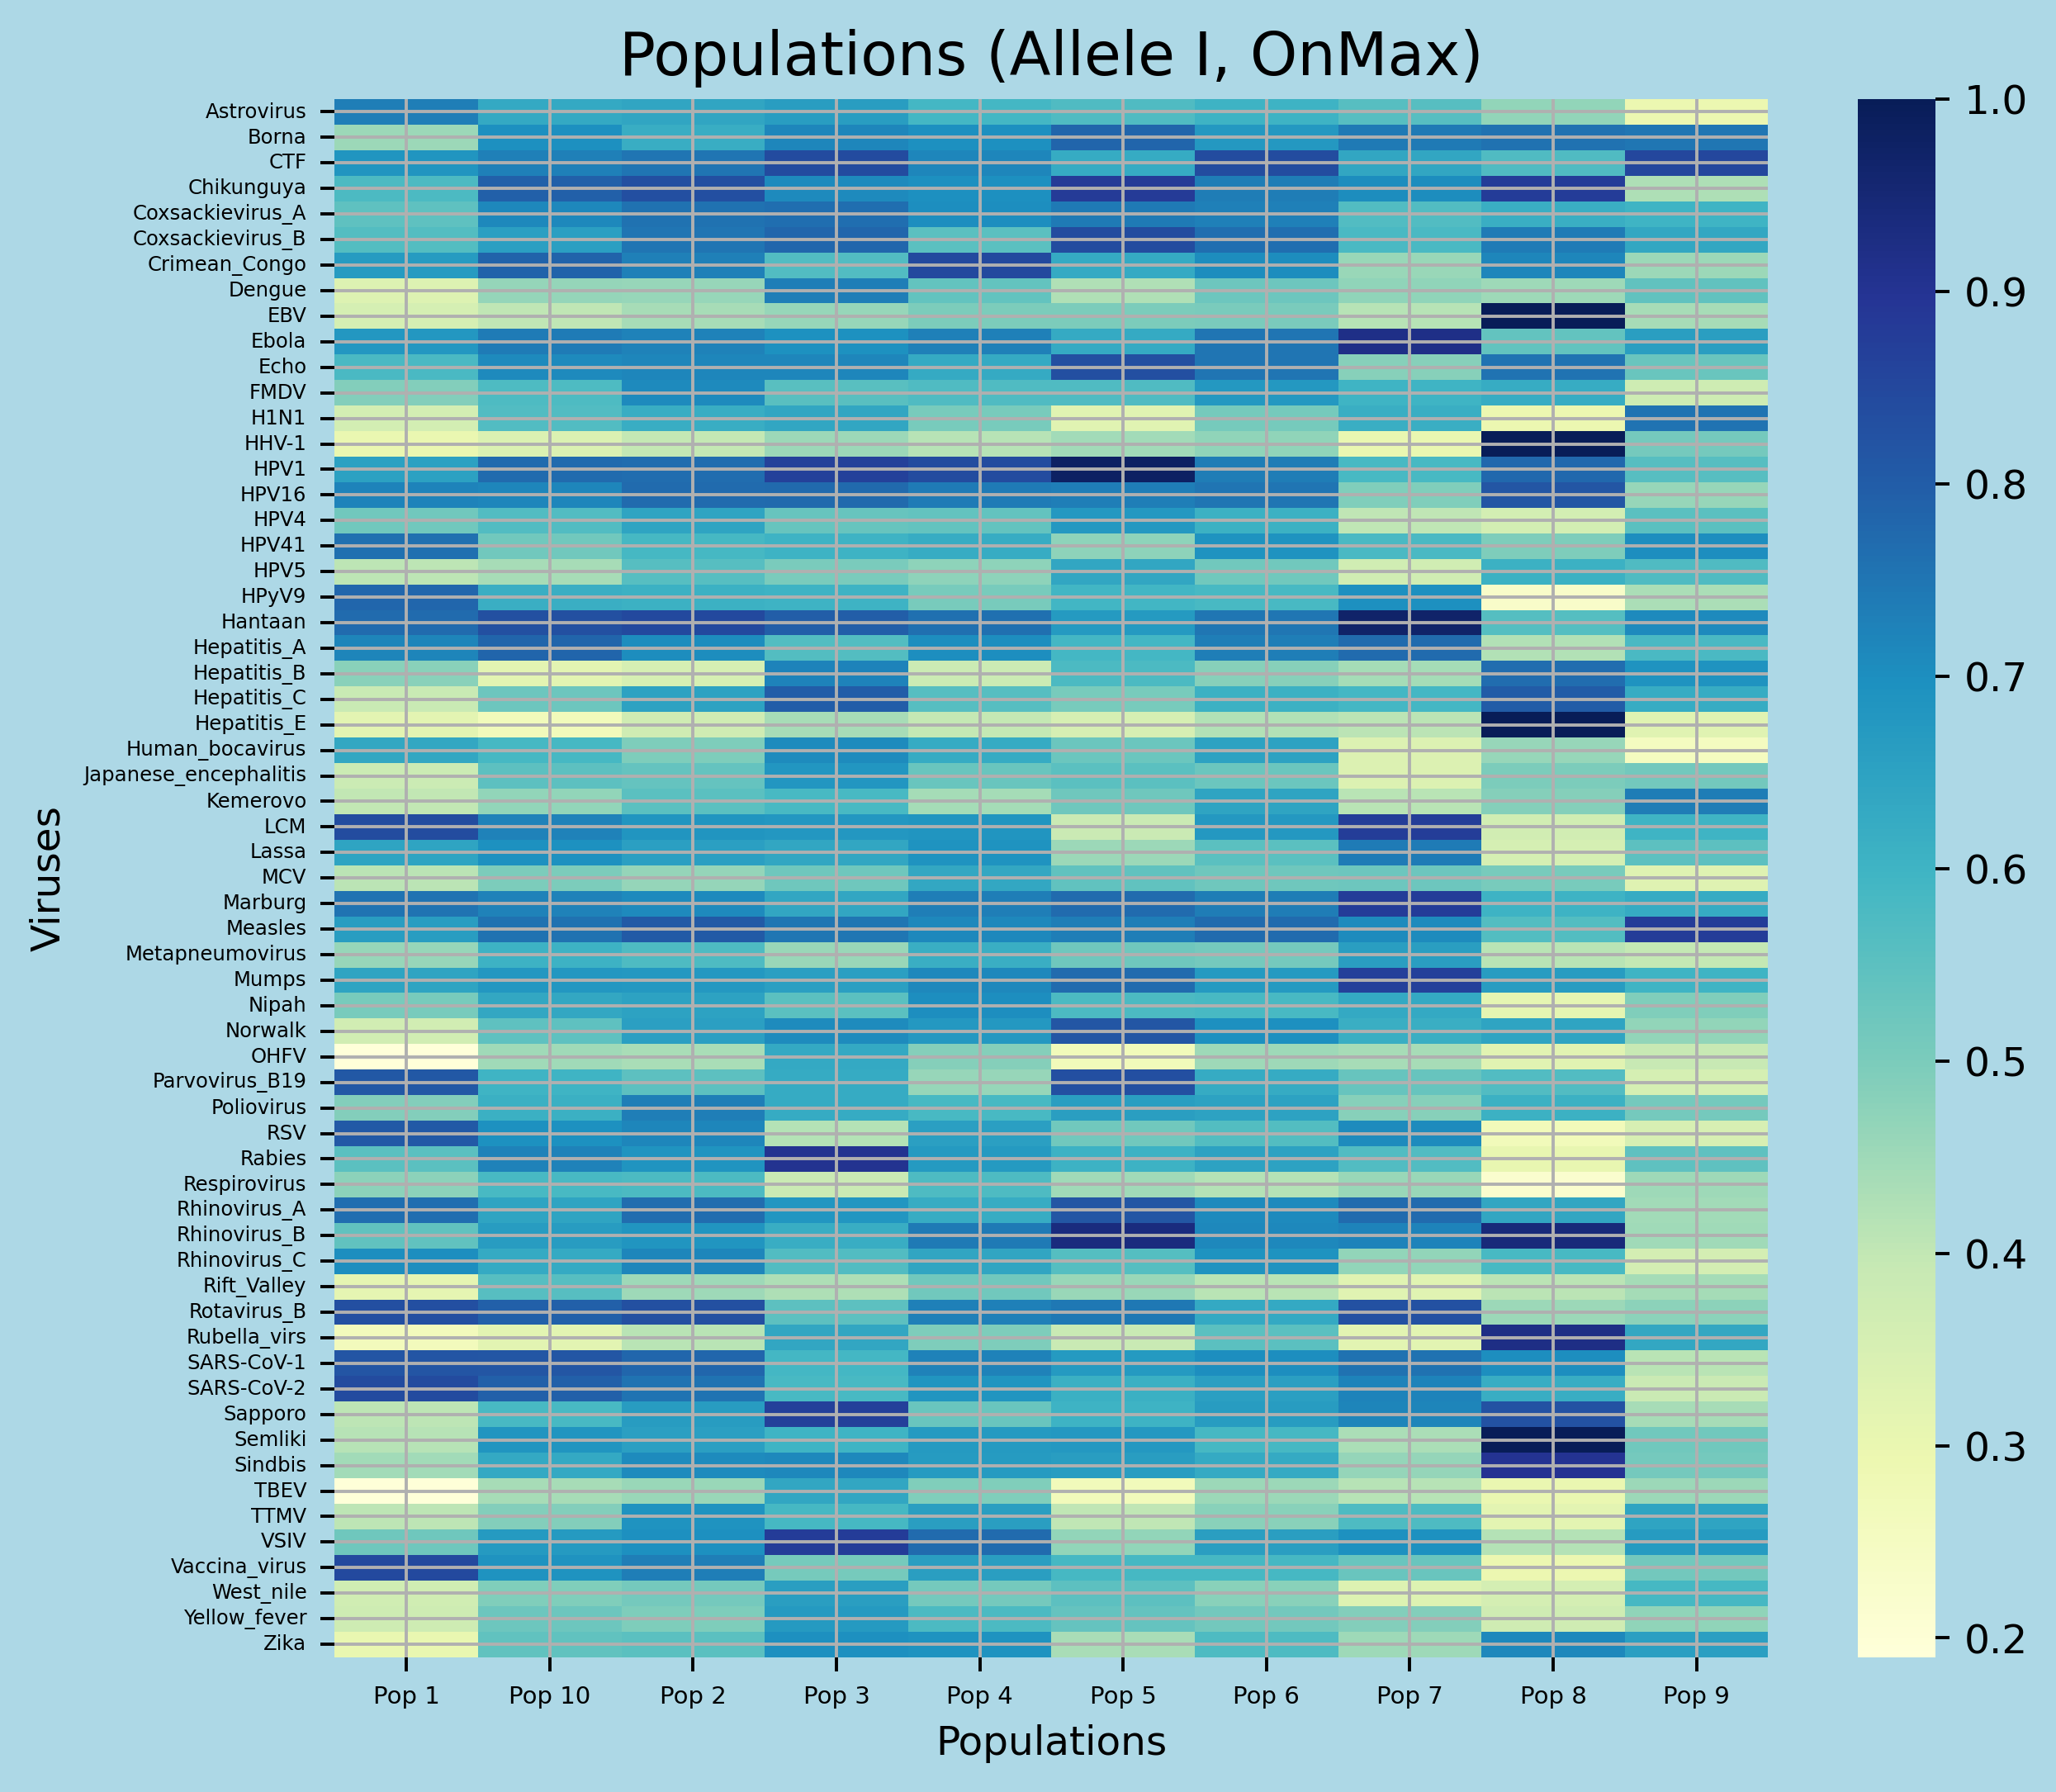

In [96]:
Draw1= Panda_sel.copy()
Draw1= Draw1.loc[Draw1['Allele type'] == "I"]
Draw1= Draw1[['Virus', 'Group', 'Score']]
Draw1= Draw1.pivot_table(index= 'Virus', columns= 'Group', values= 'Score', aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(8, 7), dpi= 350)
sns.heatmap(data= Draw1, ax= axes, yticklabels= list(Draw1.index), xticklabels= list(Draw1.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 6)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("Populations")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Populations (Allele I, "+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/I_class_Populations_("+Switch+")_heatmap.png", bbox_inches= "tight")

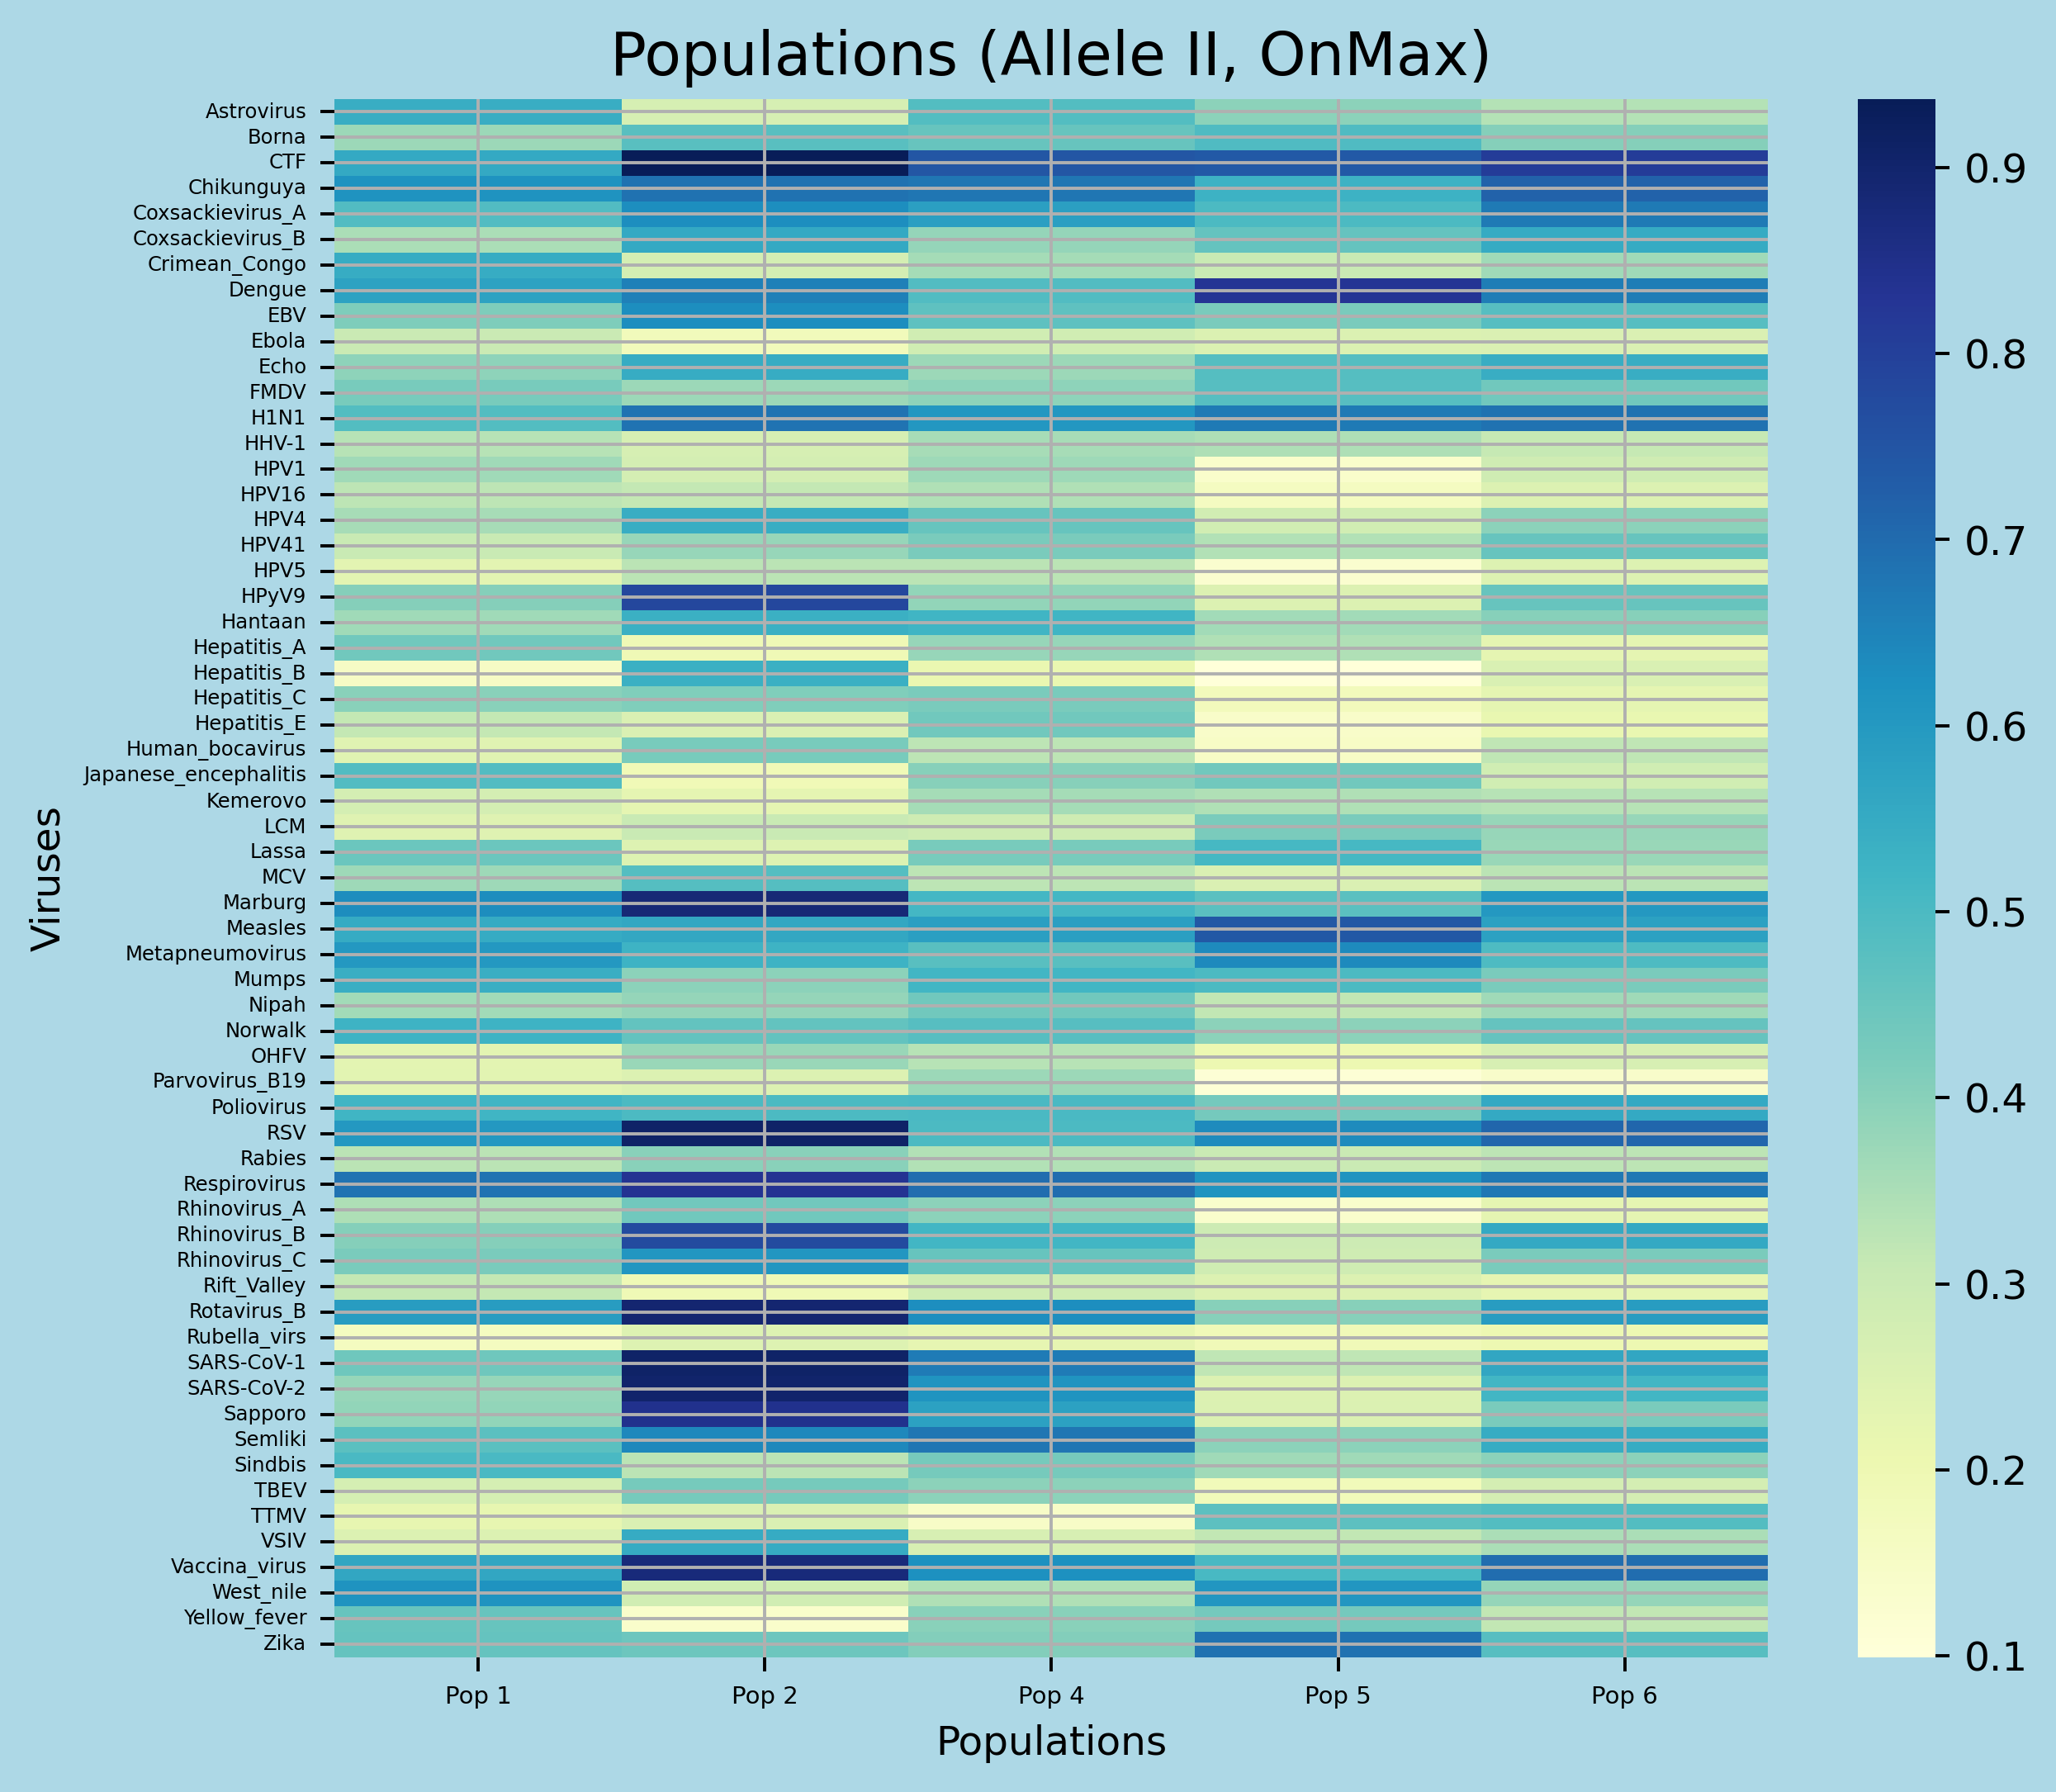

In [97]:
# if you think that top value should be 1, you're wrong, you dont get the idea
Draw2= Panda_sel.copy()
Draw2= Draw2.loc[Draw2['Allele type'] == "II"]
Draw2= Draw2[['Virus', 'Group', 'Score']]
Draw2= Draw2.pivot_table(index= 'Virus', columns= 'Group', values= 'Score', aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(8, 7), dpi= 350)
sns.heatmap(data= Draw2, ax= axes, yticklabels= list(Draw2.index), xticklabels= list(Draw2.columns), cmap= "YlGnBu")

plt.xticks(fontsize= 6)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("Populations")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Populations (Allele II, "+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/II_class_Populations_("+Switch+")_heatmap.png", bbox_inches= "tight")

### Haplotypes  
type_haplotype(Switch)_heatmap_GroupName.png

#### Analysed haplotypes

In [78]:
Haplotypes= {
    "A-B-C": [["HLA-A02:07", "HLA-B46:01", "HLA-C01:02"], ["HLA-A01:01", "HLA-B08:01", "HLA-C07:01"],
              ["HLA-A30:01", "HLA-B42:01", "HLA-C17:01"], ["HLA-A24:02", "HLA-B52:01", "HLA-C12:02"],
              ["HLA-A33:03", "HLA-B44:03", "HLA-C14:03"],
              ["HLA-A02:01", "HLA-B44:02", "HLA-C05:01"], ["HLA-A11:01", "HLA-B13:01", "HLA-C03:04"],
              ["HLA-A33:03", "HLA-B58:01", "HLA-C03:02"], ["HLA-A03:01", "HLA-B07:02", "HLA-C07:02"],
              ["HLA-A30:02", "HLA-B53:01", "HLA-C04:01"], ["HLA-A11:01", "HLA-B15:02", "HLA-C08:01"],
              ["HLA-A11:01", "HLA-B46:01", "HLA-C01:02"], ["HLA-A02:01", "HLA-B07:02", "HLA-C07:02"],
              ["HLA-A66:01", "HLA-B58:02", "HLA-C06:02"], ["HLA-A23:01", "HLA-B52:01", "HLA-C16:01"],
              ["HLA-A30:02", "HLA-B57:03", "HLA-C18:01"], ["HLA-A31:08", "HLA-B13:02", "HLA-C06:02"],
              ["HLA-A02:07", "HLA-B15:02", "HLA-C01:02"], ["HLA-A24:02", "HLA-B07:02", "HLA-C07:02"],
              ["HLA-A24:02", "HLA-B54:01", "HLA-C01:02"], ["HLA-A11:01", "HLA-B40:01", "HLA-C07:02"],
              ["HLA-A02:07", "HLA-B13:01", "HLA-C01:02"], ["HLA-A11:01", "HLA-B51:01", "HLA-C14:02"],
              ["HLA-A02:01", "HLA-B35:01", "HLA-C04:01"], ["HLA-A01:01", "HLA-B57:01", "HLA-C06:02"],
              ["HLA-A02:01", "HLA-B45:01", "HLA-C16:01"], ["HLA-A02:03", "HLA-B38:02", "HLA-C07:02"], ["HLA-A29:02", "HLA-B42:01", "HLA-C17:01"],
              ["HLA-A02:01", "HLA-B15:03", "HLA-C02:02"], ["HLA-A02:06", "HLA-B40:02", "HLA-C03:04"], ["HLA-A23:01", "HLA-B35:01", "HLA-C04:01"],
              ["HLA-A33:03", "HLA-B14:05", "HLA-C05:09"], ["HLA-A02:03", "HLA-B46:01", "HLA-C01:02"],
              ["HLA-A11:01", "HLA-B46:01", "HLA-C08:01"], ["HLA-A23:01", "HLA-B53:01", "HLA-C06:02"],
              ["HLA-A30:01", "HLA-B13:01", "HLA-C06:03"], ["HLA-A01:01", "HLA-B50:01", "HLA-C06:02"],
              ["HLA-A23:01", "HLA-B15:03", "HLA-C02:02"], ["HLA-A29:02", "HLA-B44:03", "HLA-C16:01"],
              ["HLA-A11:01", "HLA-B15:01", "HLA-C04:01"], ["HLA-A31:01", "HLA-B40:02", "HLA-C03:04"], ["HLA-A02:01", "HLA-B08:01", "HLA-C07:01"],
              ["HLA-A74:01", "HLA-B15:03", "HLA-C02:02"], ["HLA-A02:01", "HLA-B18:01", "HLA-C07:01"],
              ["HLA-A11:01", "HLA-B38:02", "HLA-C07:02"], ["HLA-A24:02", "HLA-B35:01", "HLA-C04:01"],
              ["HLA-A33:01", "HLA-B14:02", "HLA-C08:02"], ["HLA-A02:36", "HLA-B13:02", "HLA-C04:01"],
              ["HLA-A24:02", "HLA-B51:01", "HLA-C14:02"], ["HLA-A80:01", "HLA-B45:01", "HLA-C06:02"], ["HLA-A01:01", "HLA-B45:01", "HLA-C16:01"]],
        

    "DRB1-DQ": [["DRB1_1402", "HLA-DQA10501-DQB10301"], ["DRB1_1503", "HLA-DQA10102-DQB10602"],
                ["DRB1_1602", "HLA-DQA10501-DQB10301"], ["DRB1_0301", "HLA-DQA10501-DQB10201"],
                ["DRB1_1601", "HLA-DQA10102-DQB10502"], ["DRB1_1301", "HLA-DQA10103-DQB10602"],
                ["DRB1_0802", "HLA-DQA10401-DQB10402"], ["DRB1_0101", "HLA-DQA10101-DQB10501"],
                ["DRB1_1406", "HLA-DQA10501-DQB10301"], ["DRB1_0701", "HLA-DQA10201-DQB10201"],
                ["DRB1_1104", "HLA-DQA10501-DQB10301"], ["DRB1_0701", "HLA-DQA10201-DQB10202"],
                ["DRB1_1501", "HLA-DQA10102-DQB10602"],
                ["DRB1_0405", "HLA-DQA10301-DQB10401"], ["DRB1_0407", "HLA-DQA10301-DQB10302"],
                ["DRB1_0102", "HLA-DQA10101-DQB10501"], 
                ["DRB1_1201", "HLA-DQA10401-DQB10301"], ["DRB1_0401", "HLA-DQA10301-DQB10301"],
                ["DRB1_1302", "HLA-DQA10102-DQB10604"], ["DRB1_1101", "HLA-DQA10102-DQB10602"],
                ["DRB1_1301", "HLA-DQA10102-DQB10603"],
                ["DRB1_1101", "HLA-DQA10501-DQB10301"], ["DRB1_0403", "HLA-DQA10301-DQB10302"],
                ["DRB1_1402", "HLA-DQA10401-DQB10301"], ["DRB1_1201", "HLA-DQA10501-DQB10301"],
                ["DRB1_0405", "HLA-DQA10303-DQB10401"], ["DRB1_1001", "HLA-DQA10101-DQB10501"],
                ["DRB1_0102", "HLA-DQA10102-DQB10501"], 
                ["DRB1_1502", "HLA-DQA10103-DQB10601"], 
                ["DRB1_1401", "HLA-DQA10101-DQB10503"], 
                ["DRB1_0804", "HLA-DQA10501-DQB10301"], ["DRB1_1102", "HLA-DQA10501-DQB10301"],
                ["DRB1_1301", "HLA-DQA10103-DQB10603"], ["DRB1_0402", "HLA-DQA10301-DQB10303"]],
  
    "A-B-C-DRB1-DQ": [["HLA-A68:01", "HLA-B08:01", "HLA-C07:02", "DRB1_0301", "HLA-DQA10501-DQB10201"],
                      ["HLA-A31:01", "HLA-B35:01", "HLA-C07:02", "DRB1_0407", "HLA-DQA10301-DQB10302"],
                      ["HLA-A02:01", "HLA-B51:01", "HLA-C01:02", "DRB1_1401", "HLA-DQA10101-DQB10503"],
                      ["HLA-A24:02", "HLA-B35:01", "HLA-C03:03", "DRB1_1202", "HLA-DQA10102-DQB10502"],
                      ["HLA-A01:01", "HLA-B57:01", "HLA-C06:02", "DRB1_0701", "HLA-DQA10201-DQB10303"],
                      ["HLA-A03:01", "HLA-B52:01", "HLA-C12:02", "DRB1_1502", "HLA-DQA10103-DQB10601"],
                      ["HLA-A30:01", "HLA-B42:01", "HLA-C17:01", "DRB1_0302", "HLA-DQA10401-DQB10402"],
                      ["HLA-A26:01", "HLA-B13:01", "HLA-C06:02", "DRB1_0701", "HLA-DQA10201-DQB10202"]]
}

#### Setting the key
keys available: "A-B-C", "DRB1-DQ"

In [157]:
Key= "A-B-C"

#### Plotting  
for _all_ types of haplotypes

In [154]:
# "unavailble_haplotypes.txt" contains unavailable haplotipeas and the missing alleles

Virus= list(RawData1['Virus'].unique())

if Switch in ["Normed", "Unnormed"]:
    #if (Key in ["A-B-C-DRB1-DQ"]) and (Switch == "Normed"): Value= "val/coef(I/II)"
    
    ColNames=["Virus", "Key", "Haplotype", Value]
    RawHaploL= []
    f= open("../Output/unavailble_haplotypes.txt", "w")

    for z in Haplotypes.keys():
        for y in Haplotypes[z]:
            HaploN= ""
            for k in y: HaploN+= k+"_"
            HaploN= HaploN[:-1]
            try:
                for x in Virus:
                    Sum= 0
                    for k in y:
                        add= RawData.loc[(RawData['Virus'] == x) & (RawData['MHC'] == k), Value].values[0]
                        Sum+= add
                    Row=[x, z, HaploN, Sum]
                    RawHaploL+= [Row]
            except: 
                print(y, "haplotype is not available ("+k+");", x)
                Str= ""
                for l in y:
                    f.write(l)
                f.write(" ("+k+")")
                f.write("\n")
    f.close()
    RawHaplo= pd.DataFrame(data= RawHaploL, columns= ColNames)
    

if Switch == "OnMax":
    # if Key in ["A-B-C-DRB1-DQ"]: Value= "val/coef(I/II)" # ????!!!!
    
    Value= "sum_score high"
    ColNames=["Virus", "Key", "Haplotype", "OnMax"]
    RawHaploL= []
    f= open("../Output/unavailble_haplotypes.txt", "w")

    for x in Virus:
        for z in Haplotypes.keys():
            TmpRows= []
            for y in Haplotypes[z]:
                HaploN= ""
                for k in y: HaploN+= k+"_"
                HaploN= HaploN[:-1]
                try:
                    Sum= 0
                    for k in y:
                        add= RawData.loc[(RawData['Virus'] == x) & (RawData['MHC'] == k), Value].values[0]
                        Sum+= add
                    Row=[x, z, HaploN, Sum]
                    TmpRows+= [Row]
                except: 
                    if x == Virus[0]:
                        print(y, "haplotype is not available ("+k+");", x)
                        Str= ""
                        for l in y:
                            f.write(l)
                        f.write(" ("+k+")")
                        f.write("\n")
                    
            Max= max([f[3] for f in TmpRows])
            for I in range(len(TmpRows)):
                TmpRows[I][3]= TmpRows[I][3]/Max
            RawHaploL+= TmpRows
        
    RawHaplo= pd.DataFrame(data= RawHaploL, columns= ColNames)
    Value= "OnMax"

print("Finished.")

['HLA-A11:01', 'HLA-B13:01', 'HLA-C03:04'] haplotype is not available (HLA-B13:01); Astrovirus
['HLA-A30:02', 'HLA-B57:03', 'HLA-C18:01'] haplotype is not available (HLA-B57:03); Astrovirus
['HLA-A02:07', 'HLA-B13:01', 'HLA-C01:02'] haplotype is not available (HLA-B13:01); Astrovirus
['HLA-A30:01', 'HLA-B13:01', 'HLA-C06:03'] haplotype is not available (HLA-B13:01); Astrovirus
['HLA-A80:01', 'HLA-B45:01', 'HLA-C06:02'] haplotype is not available (HLA-A80:01); Astrovirus
['HLA-A26:01', 'HLA-B13:01', 'HLA-C06:02', 'DRB1_0701', 'HLA-DQA10201-DQB10202'] haplotype is not available (HLA-B13:01); Astrovirus
Finished.


In [158]:
# Please Choose The Viral Group (do "Alleles for specific groups" first or choose All_viruses)
HaploTable= RawHaplo.copy()

All_viruses= list(RawData['Virus'].unique())
GroupName= "All" # All, Papilo, fever, Hepatitis
Choose_group= All_viruses
if GroupName == "fever": Choose_group= fever
elif GroupName == "Papilo": Choose_group= Papilo
elif GroupName == "Hepatitis": Choose_group= Hepatitis

HaploTable= HaploTable.loc[HaploTable['Virus'].isin(Choose_group)] 
HaploTable= HaploTable.loc[HaploTable['Key'] == Key, [Value, 'Haplotype', 'Virus']]
HaploTable= HaploTable.pivot_table(index= 'Virus', columns= 'Haplotype', values= Value, aggfunc= 'mean')

In [337]:
# A very optional stuff, skip
'''
if Switch == "Normed":
    with pd.ExcelWriter('../Output/Haplotypes_normed_data.xlsx') as writer:
        for x in ["A-B-C", "DRB1-DQ", "A-B-C-DRB1-DQ"]:
            HaploTableX= RawHaplo.copy()
            HaploTableX= HaploTableX.loc[HaploTableX['Key'] == x, [Value, 'Haplotype', 'Virus']]
            HaploTableX= HaploTableX.pivot_table(index= 'Virus', columns= 'Haplotype', values= Value, aggfunc= 'mean')
            HaploTableX.to_excel(writer, sheet_name= 'Normed'+x)
'''

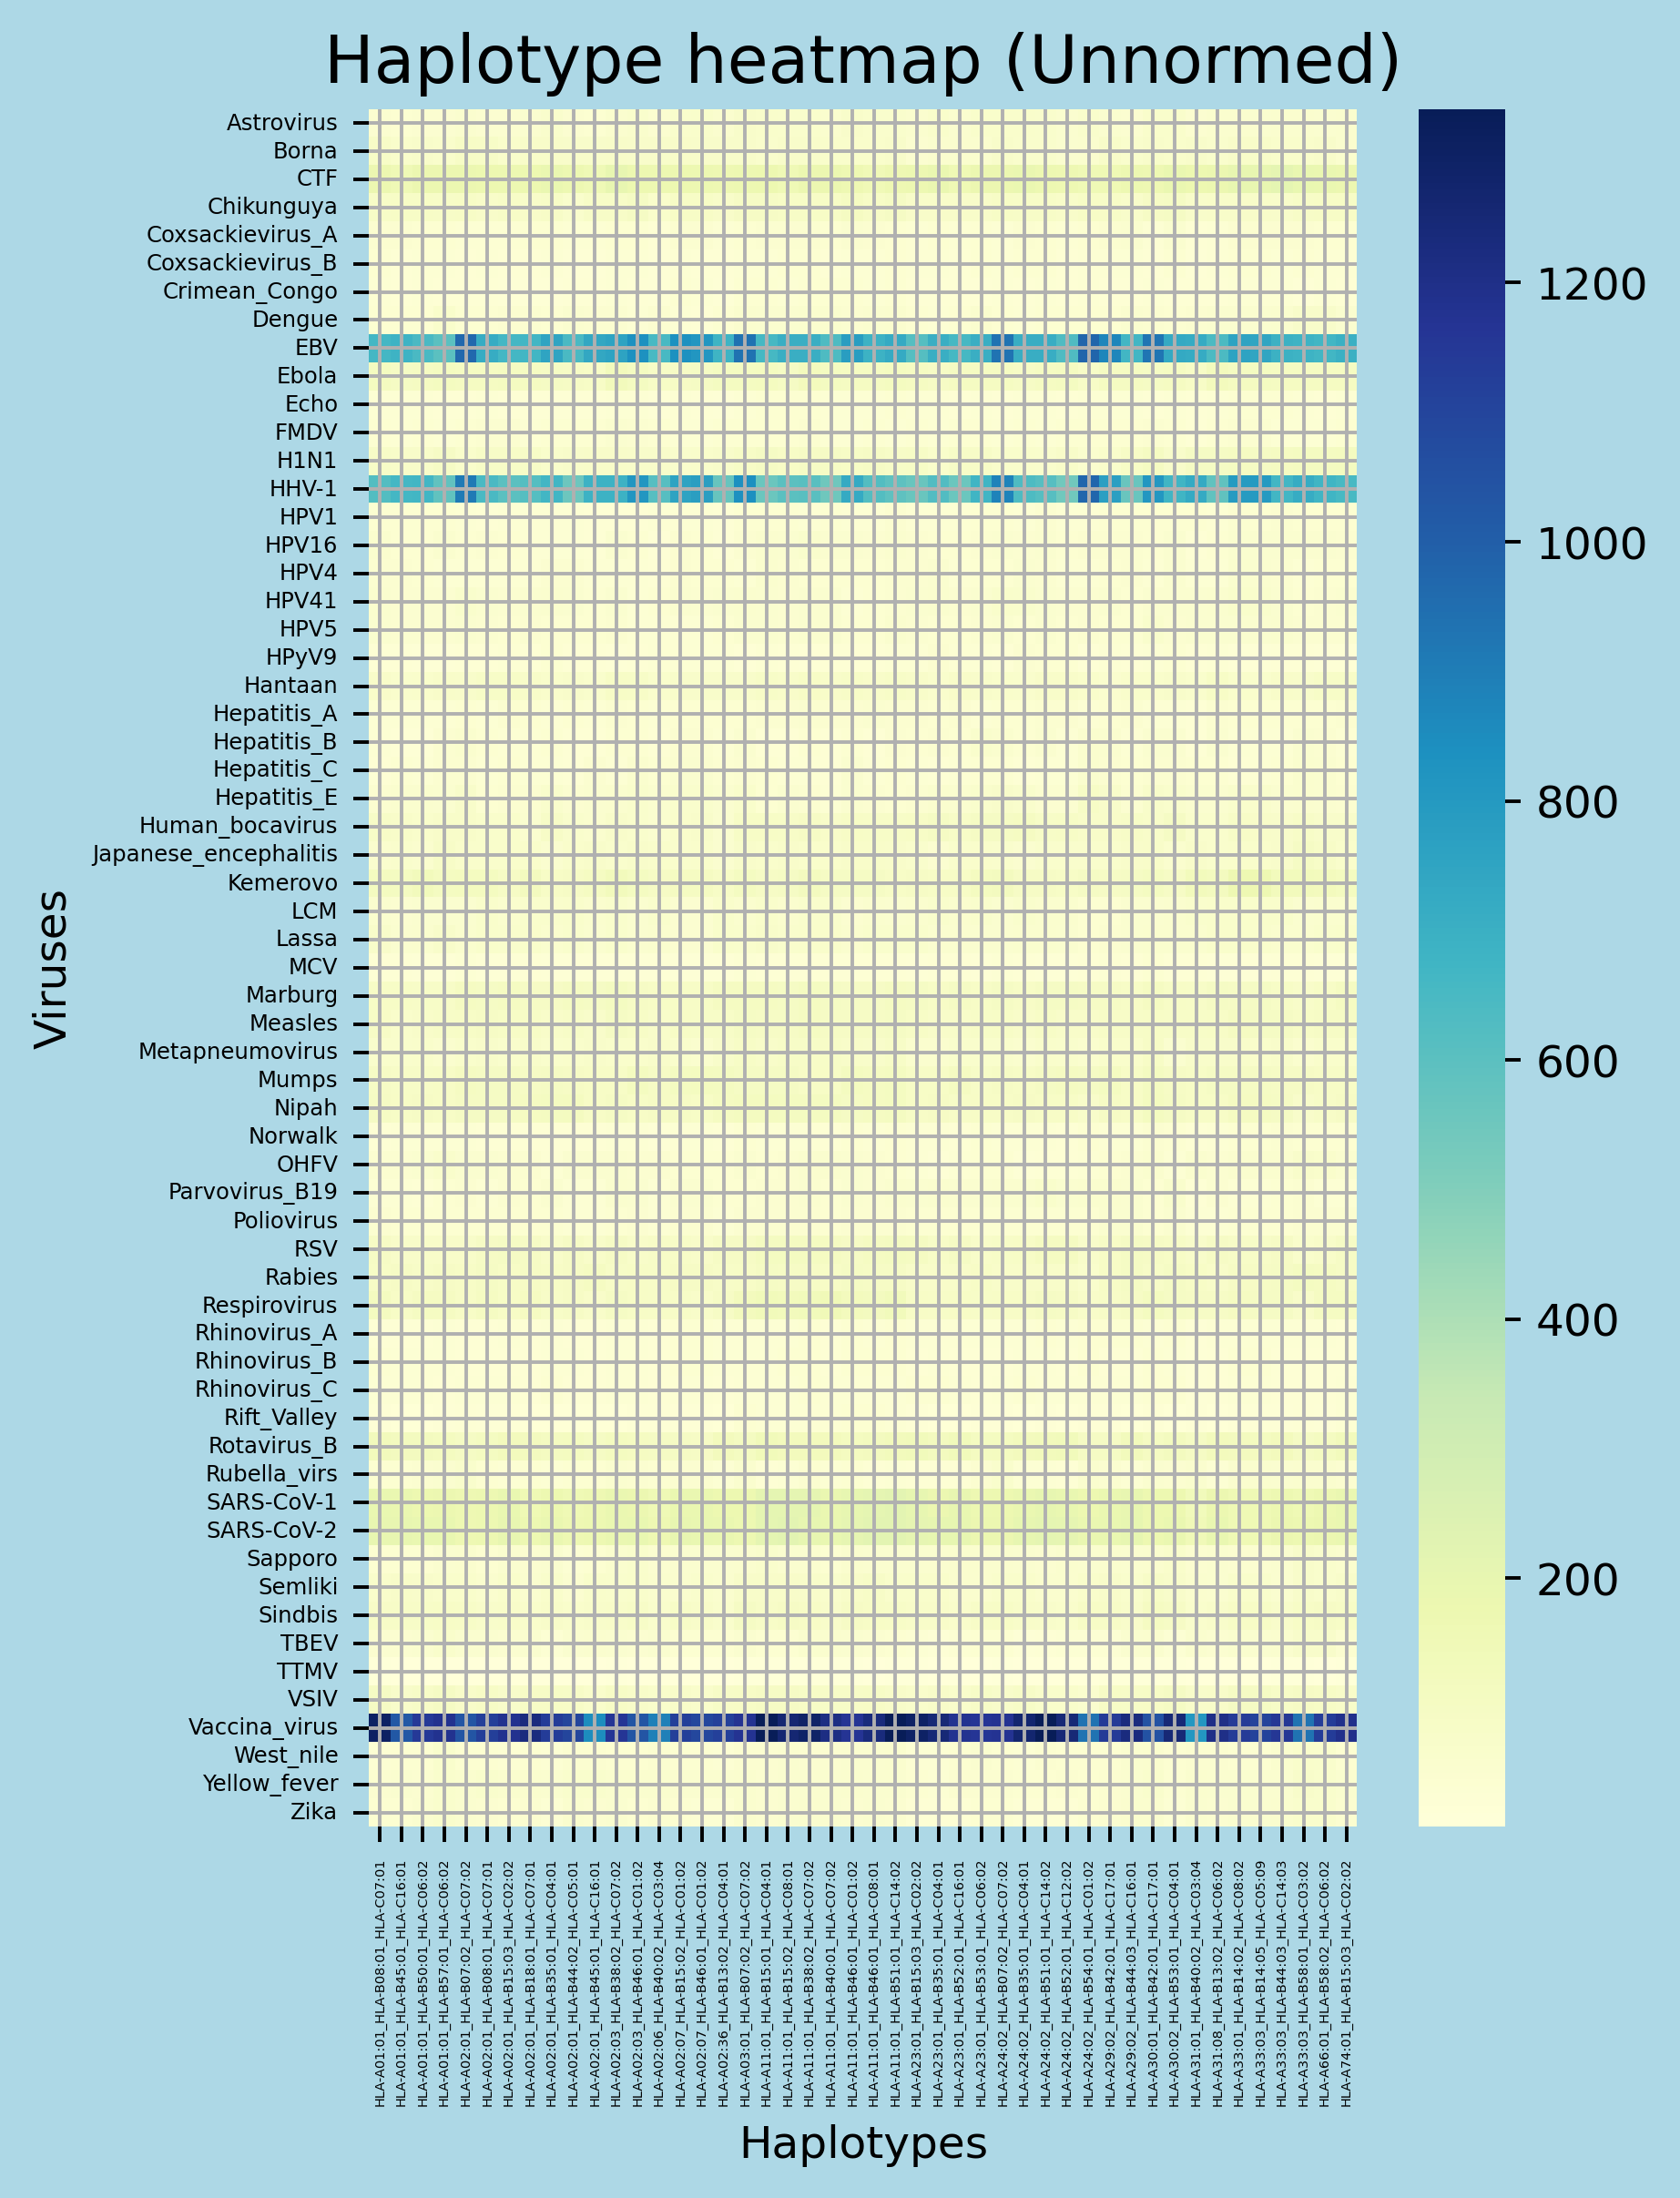

In [159]:
fig, axes = plt.subplots(figsize= (5, 7), dpi= 350)
sns.heatmap(data= HaploTable, ax= axes, cmap= "YlGnBu", yticklabels= list(HaploTable.index), xticklabels= list(HaploTable.columns))
plt.xticks(fontsize= 3)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("Haplotypes")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Haplotype heatmap ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/"+Key+"_haplotype("+Switch+")_heatmap_"+GroupName+".png", bbox_inches= "tight") #####

## Cumalative affinity (raw proteome) boxplots/barplot
**cumaff_boxplot_rawproteomes_MHC(I/II)_(un)normed.png**    
**cumaff_barplot_rawproteomes_MHC(I/II)_(un)normed.png**

### Switch normed/unnormed

In [179]:
Switch= "Unnormed" # "Unnormed" "Normed"

In [180]:
if Switch == "Normed":
    Value= "val/coef"
else:
    Value= "sum_score high"

### Data preparation

In [181]:
JJJ1= RawData1.copy()
JJJ2= RawData2.copy()

medians= JJJ1.groupby('Virus')[Value].median().reset_index(name= 'Median')
JJJ1= JJJ1.merge(medians, on= 'Virus')
JJJ1= JJJ1.sort_values('Median')

medians= JJJ2.groupby('Virus')[Value].median().reset_index(name= 'Median')
JJJ2= JJJ2.merge(medians, on= 'Virus')
JJJ2= JJJ2.sort_values('Median')

### Boxplots

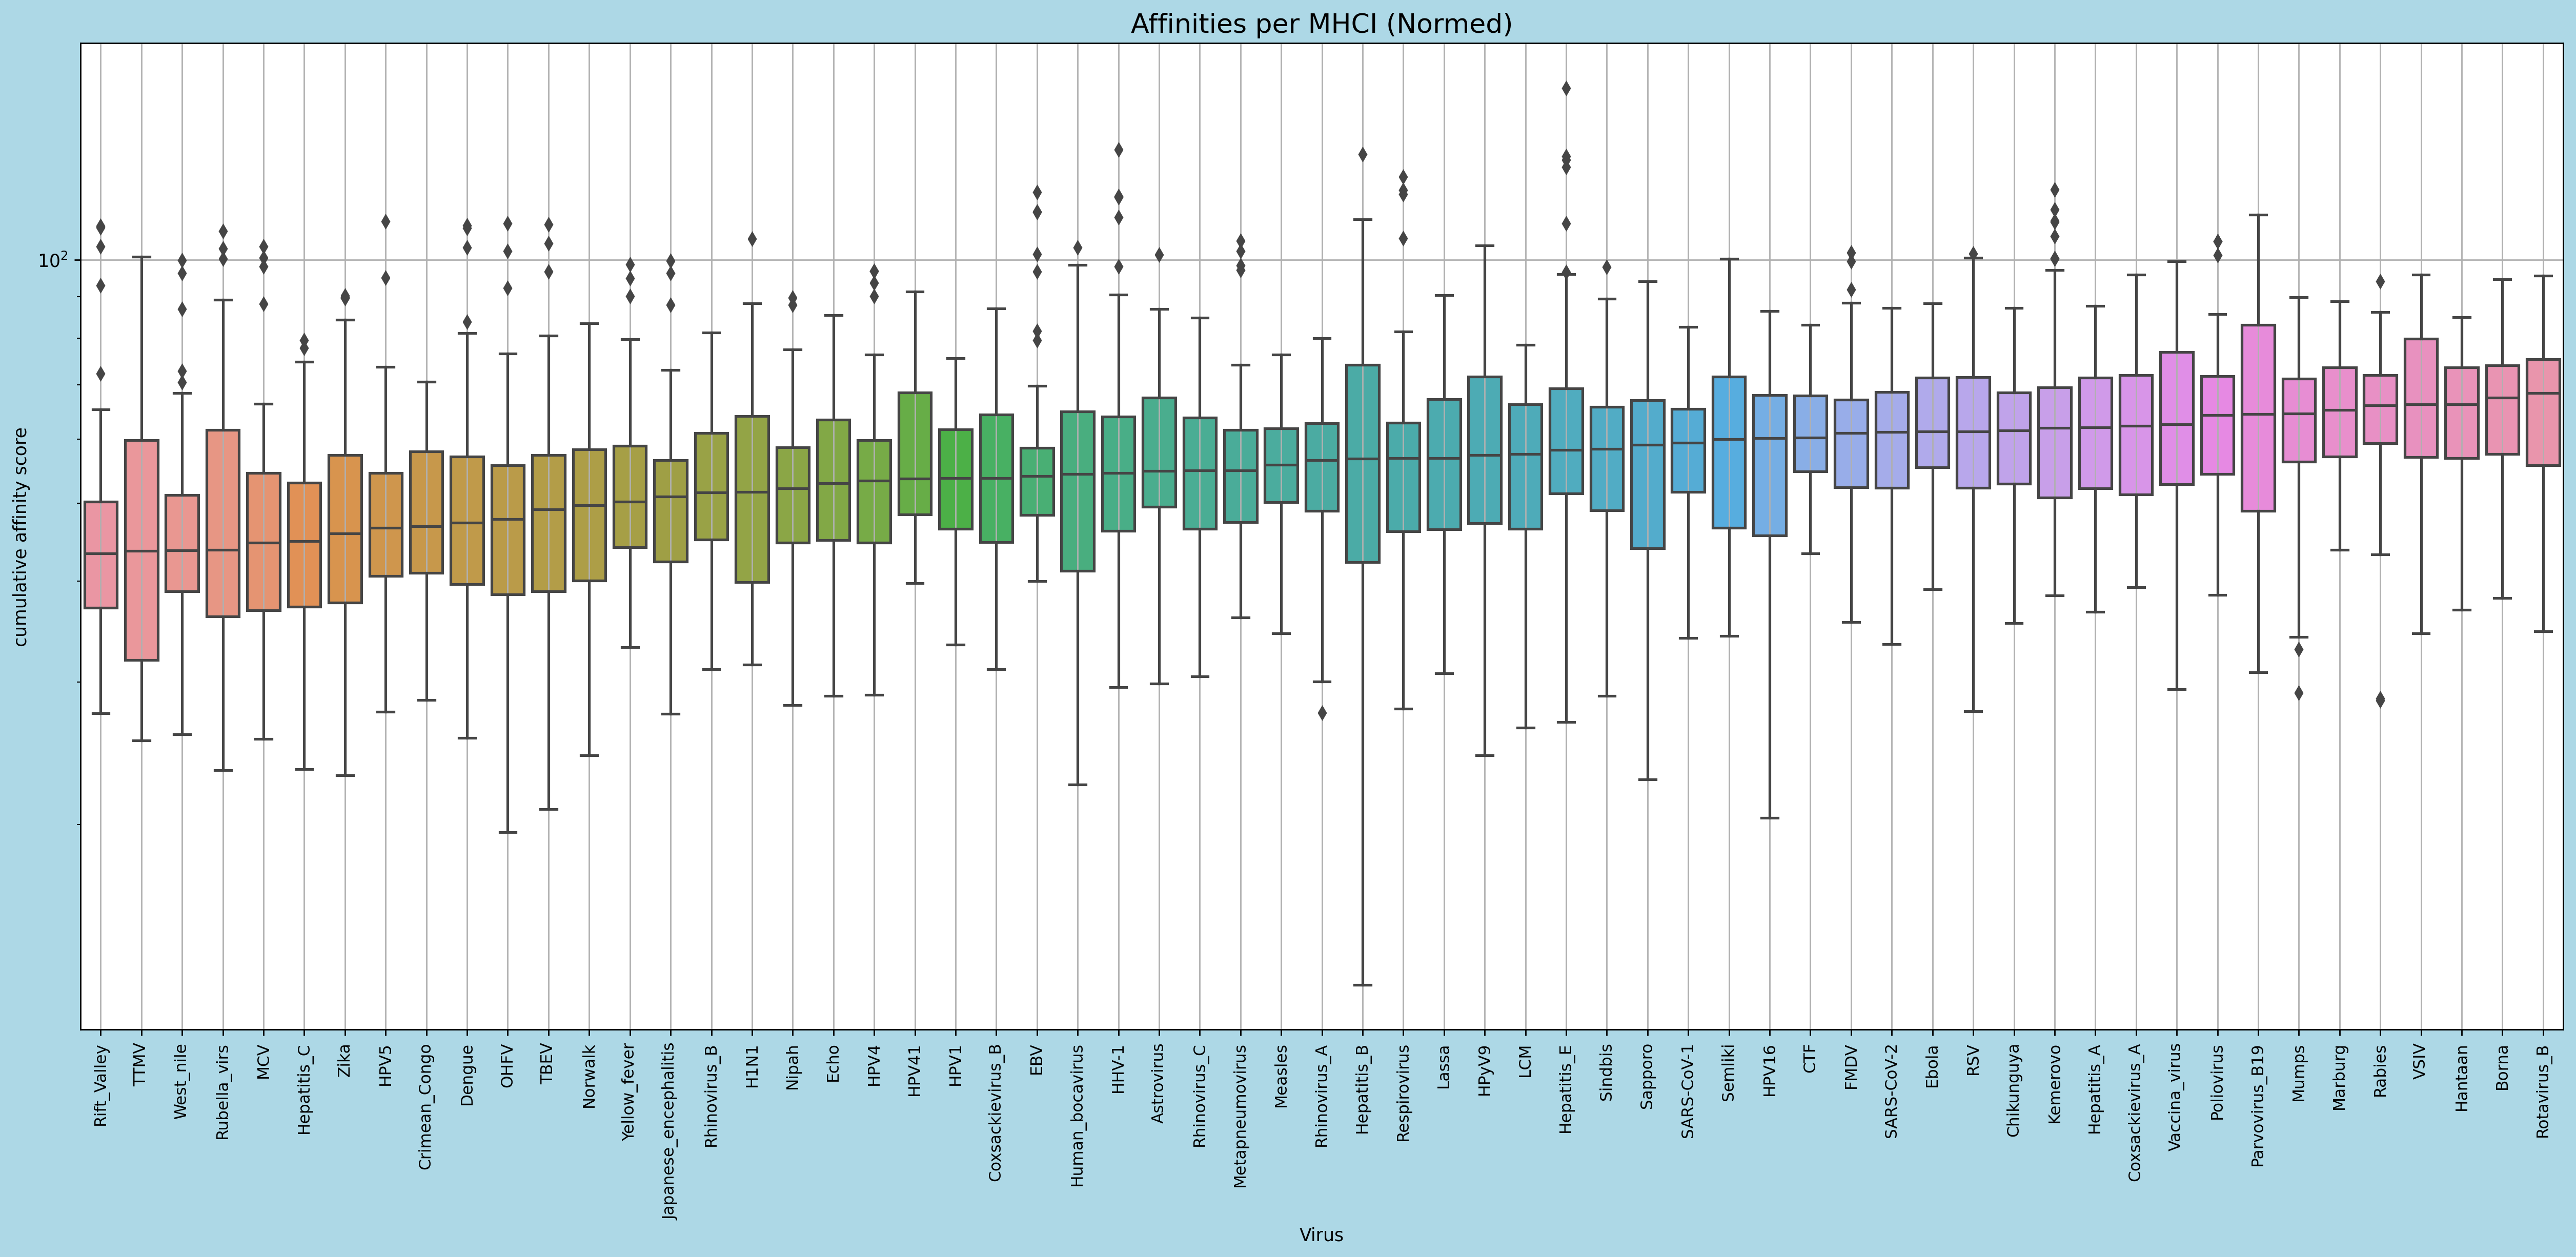

In [170]:
# MHCI
fig, axes = plt.subplots(figsize=(25, 10), dpi= 250)
sns.boxplot(x= 'Virus', y= Value, data= JJJ1, ax= axes)

plt.xticks(fontsize= 9,rotation=90)
axes.set_ylabel("cumulative affinity score")
axes.set_yscale('log')
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Affinities per MHCI ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/cumaff_boxplot_rawproteomes_MHCI_("+Switch+").png", bbox_inches= "tight")

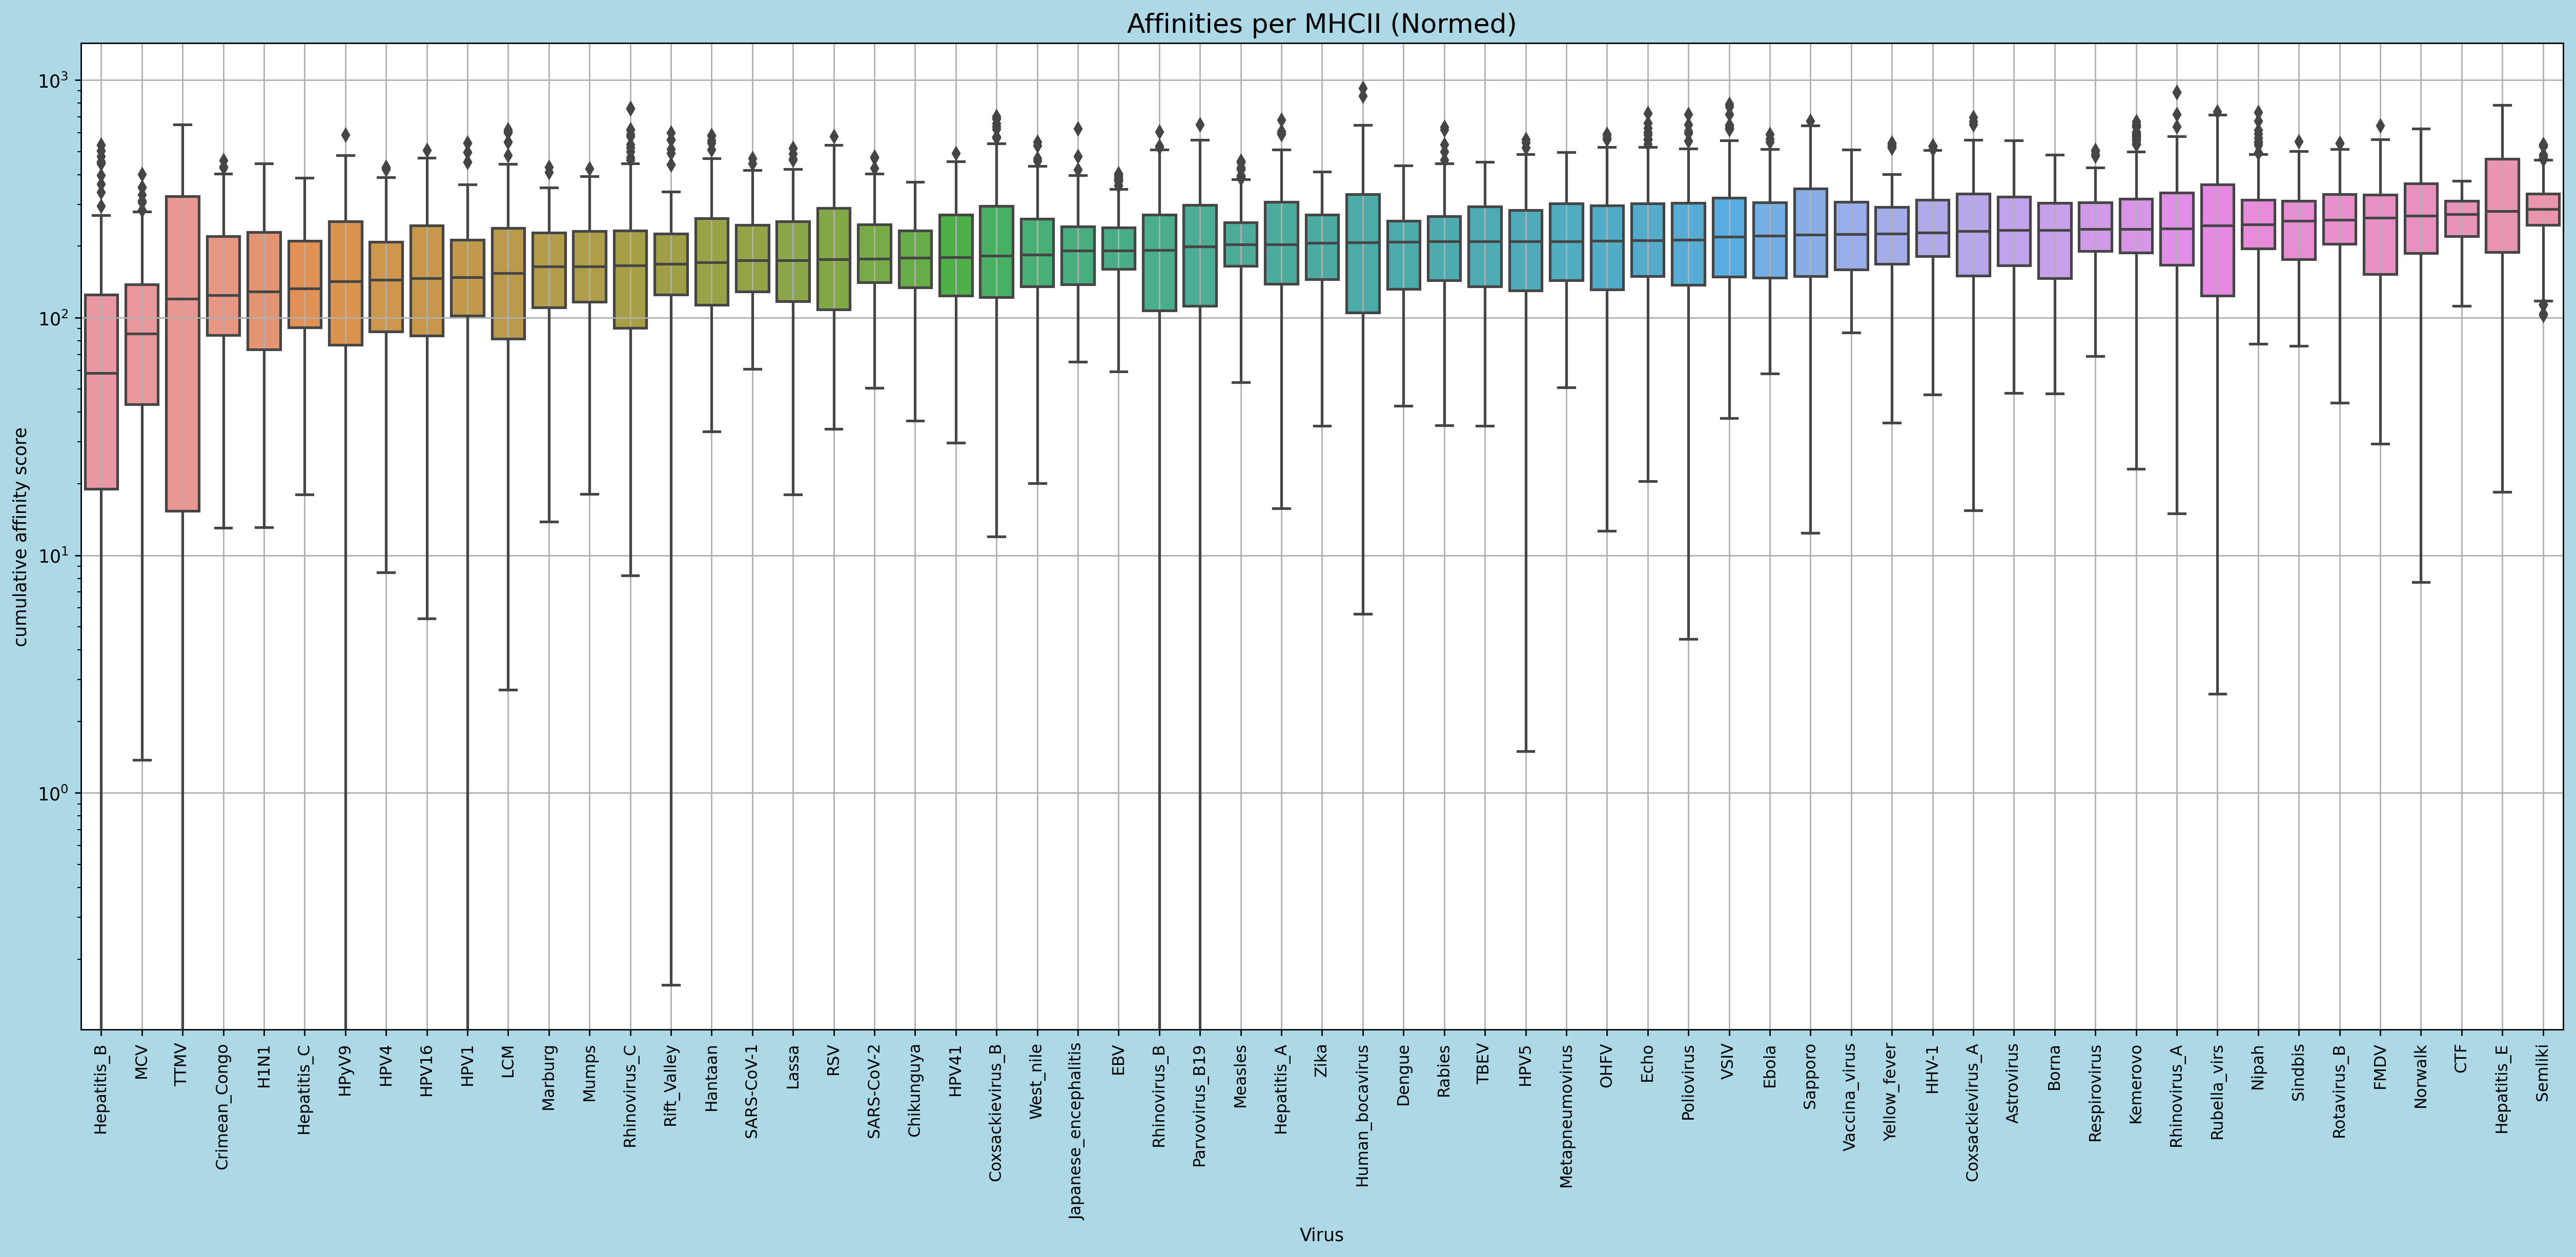

In [171]:
# MHCII
fig, axes = plt.subplots(figsize=(25, 10), dpi= 250)
sns.boxplot(x= 'Virus', y= Value, data= JJJ2, ax= axes)

plt.xticks(fontsize= 9,rotation=90)
axes.set_ylabel("cumulative affinity score")
axes.set_yscale('log')
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Affinities per MHCII ("+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/cumaff_boxplot_rawproteomes_MHCII_("+Switch+").png", bbox_inches= "tight")

### Barplots

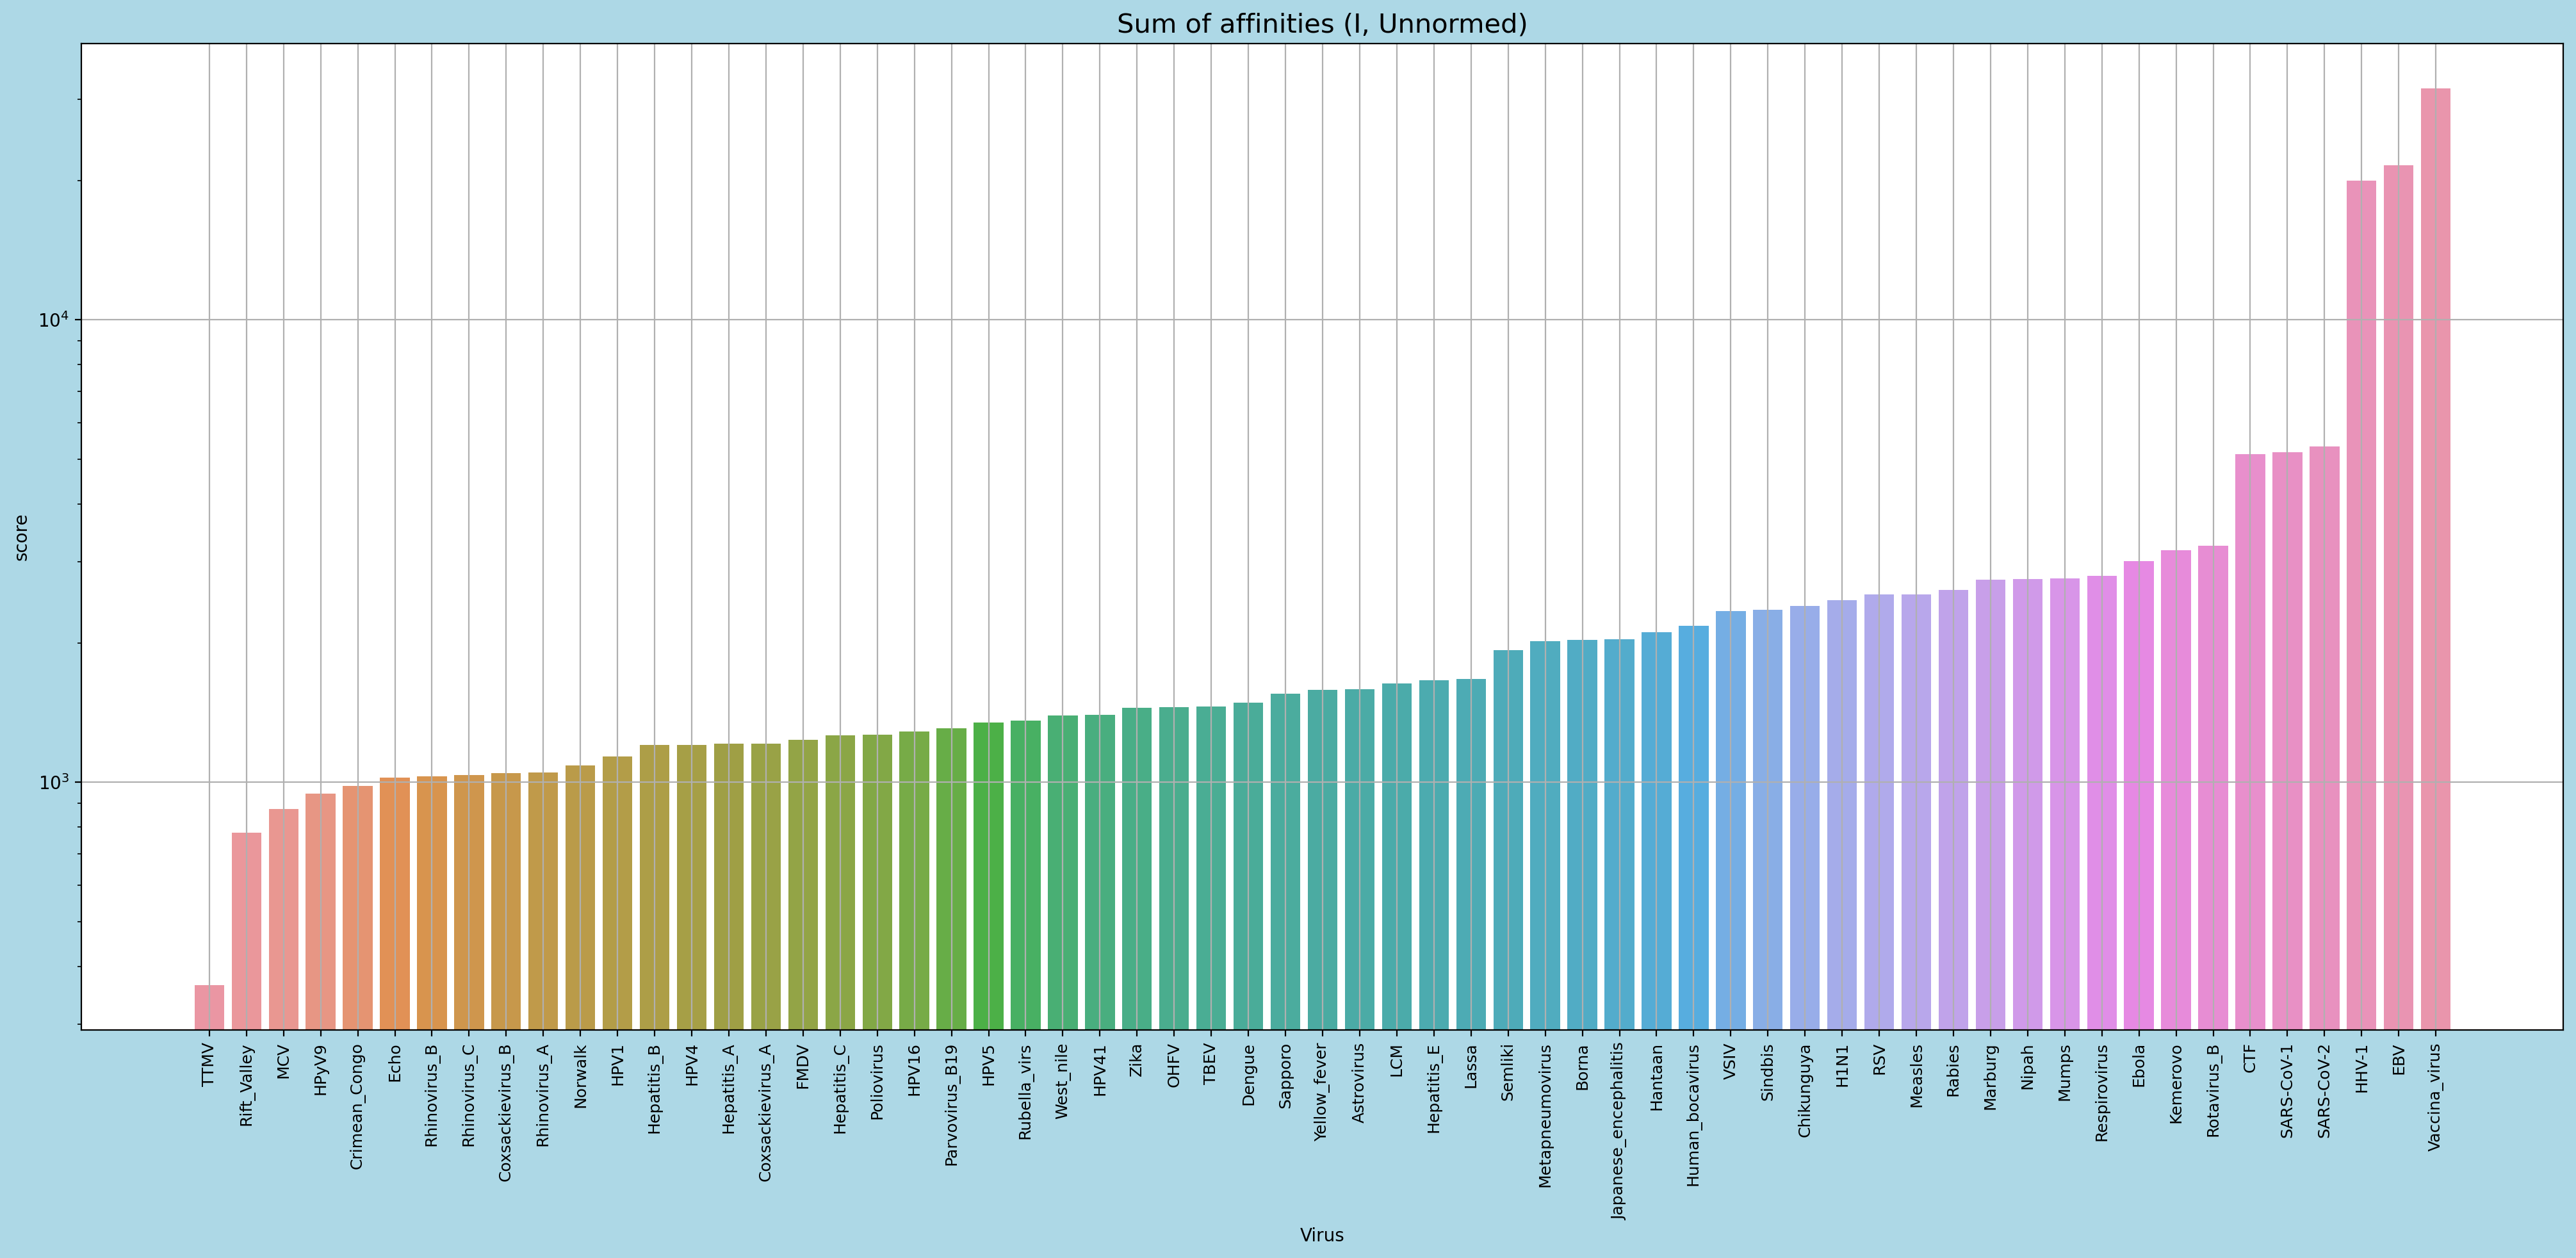

In [182]:
# MHCI
LLL1= JJJ1.groupby('Virus')[Value].sum().reset_index(name= 'Sum')
LLL1= LLL1.sort_values('Sum')

fig, axes = plt.subplots(figsize= (25, 10), dpi= 200)
sns.barplot(x= 'Virus', y= 'Sum', data= LLL1, ax= axes)

plt.xticks(fontsize= 9,rotation= 90)
axes.set_ylabel("score")
axes.set_yscale("log")
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Sum of affinities (I, "+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/cumaff_barplot_rawproteomes_MHCI_("+Switch+").png", bbox_inches= "tight")

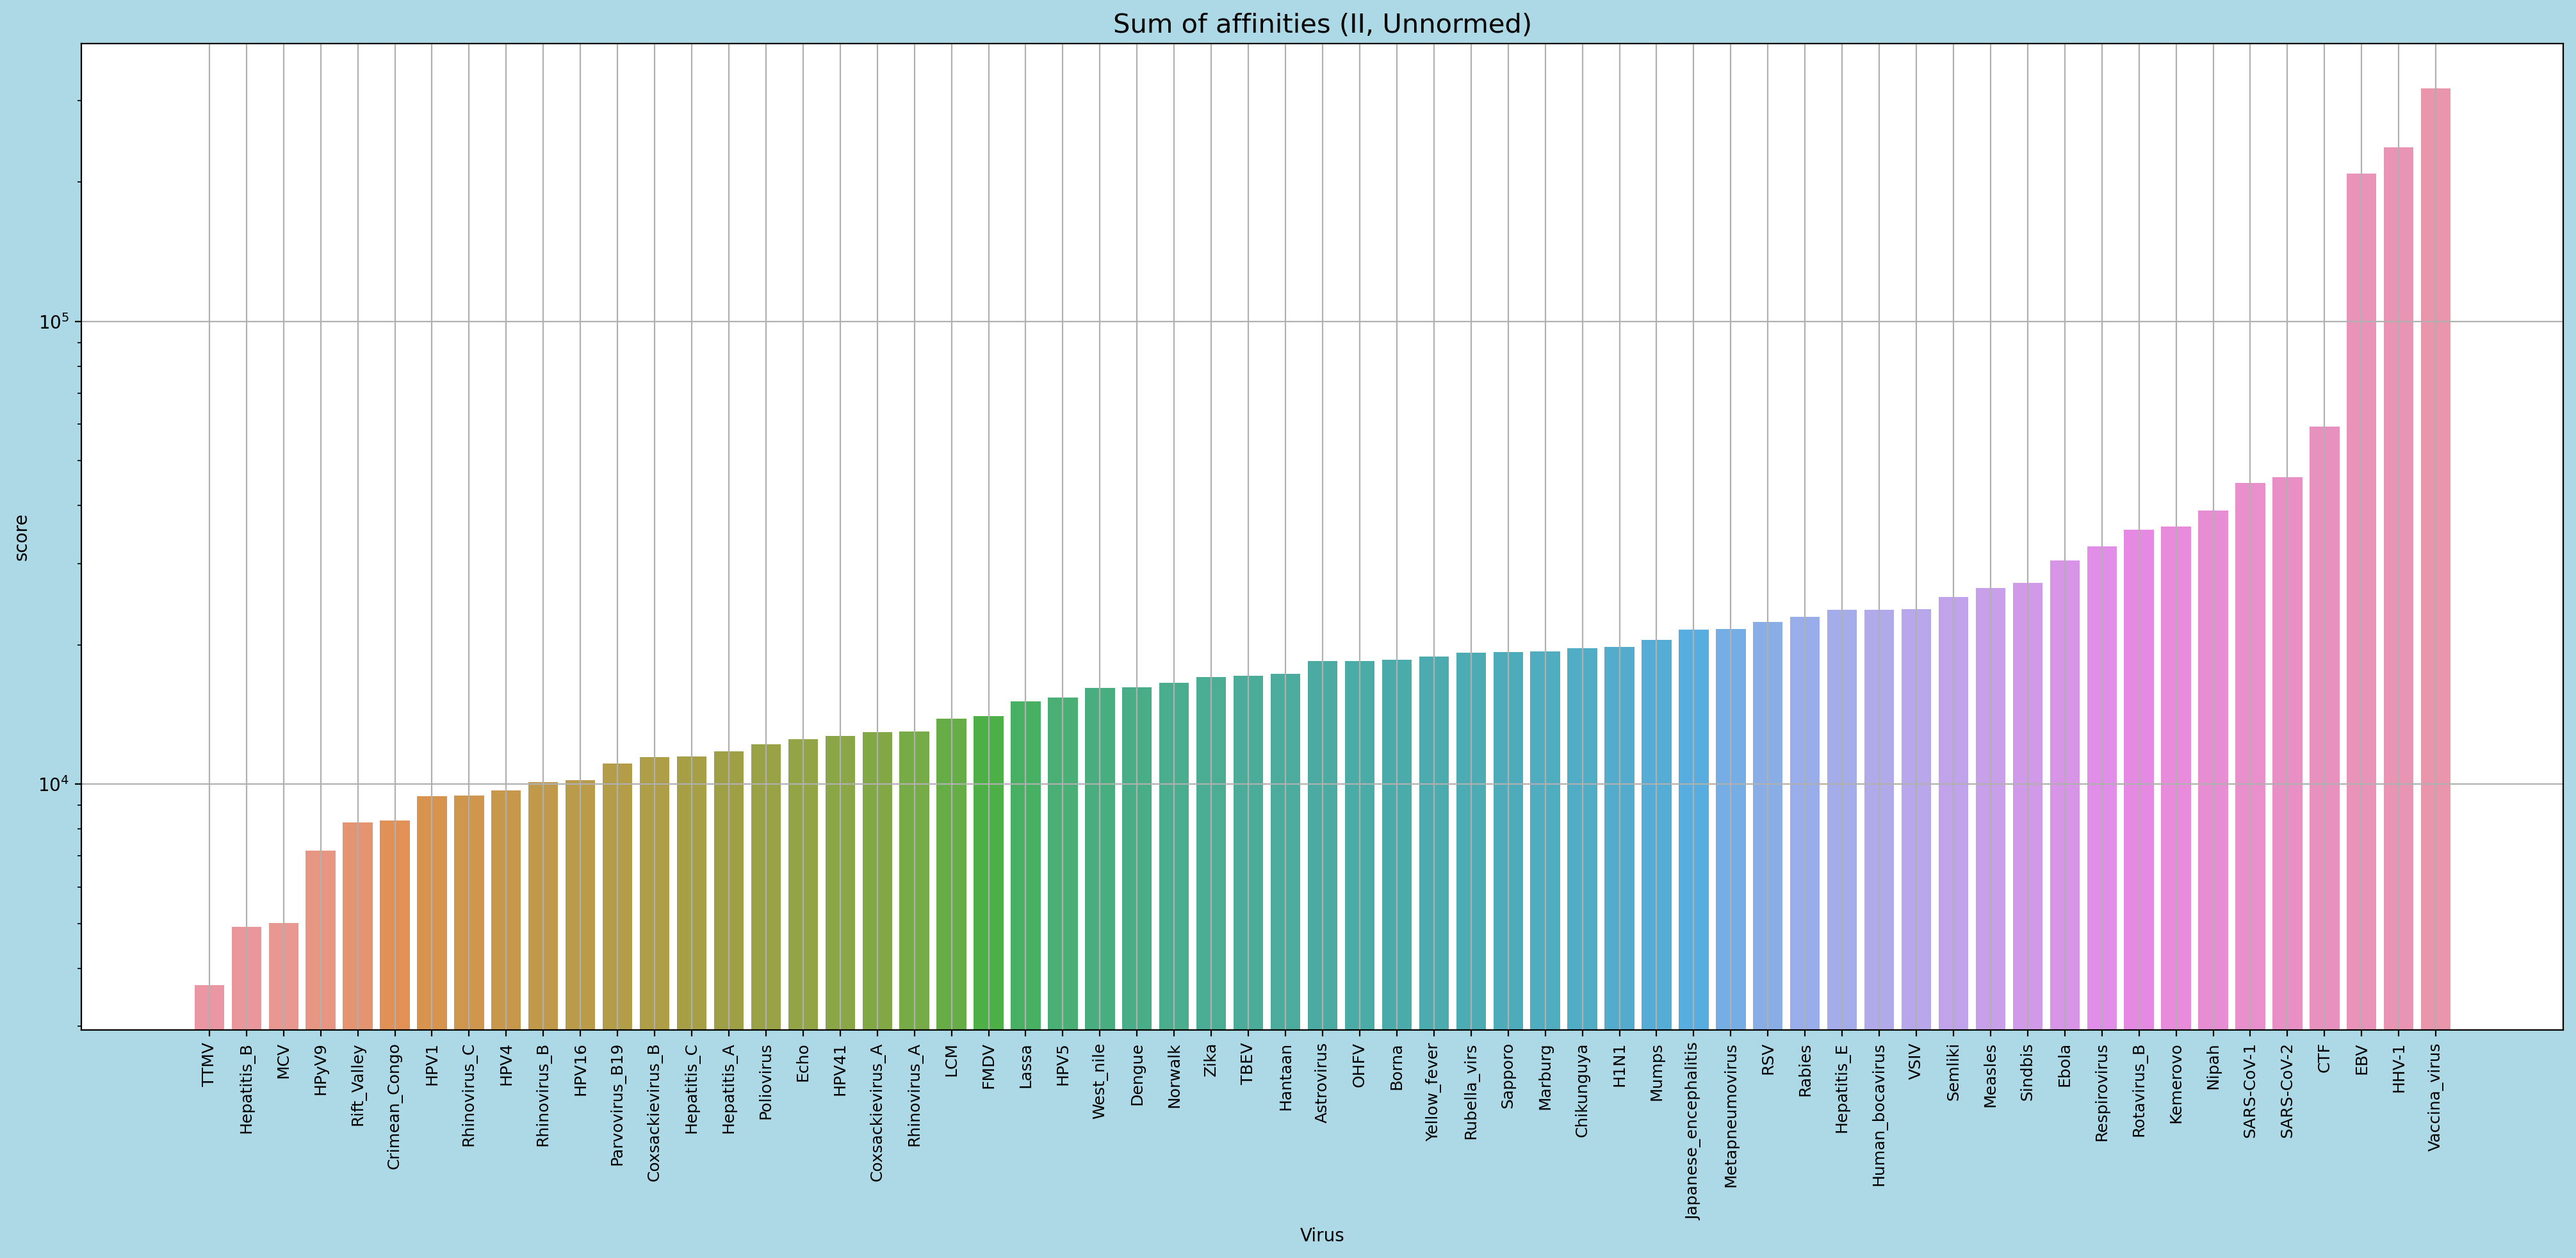

In [183]:
# MHCII
LLL2= JJJ2.groupby('Virus')[Value].sum().reset_index(name= 'Sum')
LLL2= LLL2.sort_values('Sum')

fig, axes = plt.subplots(figsize= (25, 10), dpi= 200)
sns.barplot(x= 'Virus', y= 'Sum', data= LLL2, ax= axes)

plt.xticks(fontsize= 9,rotation= 90)
axes.set_ylabel("score")
axes.set_yscale("log")
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Sum of affinities (II, "+Switch+")", fontsize= 15)
plt.plot()
plt.savefig("../Output/cumaff_barplot_rawproteomes_MHCII_("+Switch+").png", bbox_inches= "tight")

## Something  
that might be (or was) useful

#### Dengue barplot (Normed, MHCI)  
Dengue-I.png

In [184]:
SS= RawData.copy()
SS= SS.loc[SS['Virus'] == "Dengue"]
SS= SS.loc[SS['MHC_type'] == "I", ['MHC', 'val/coef']]

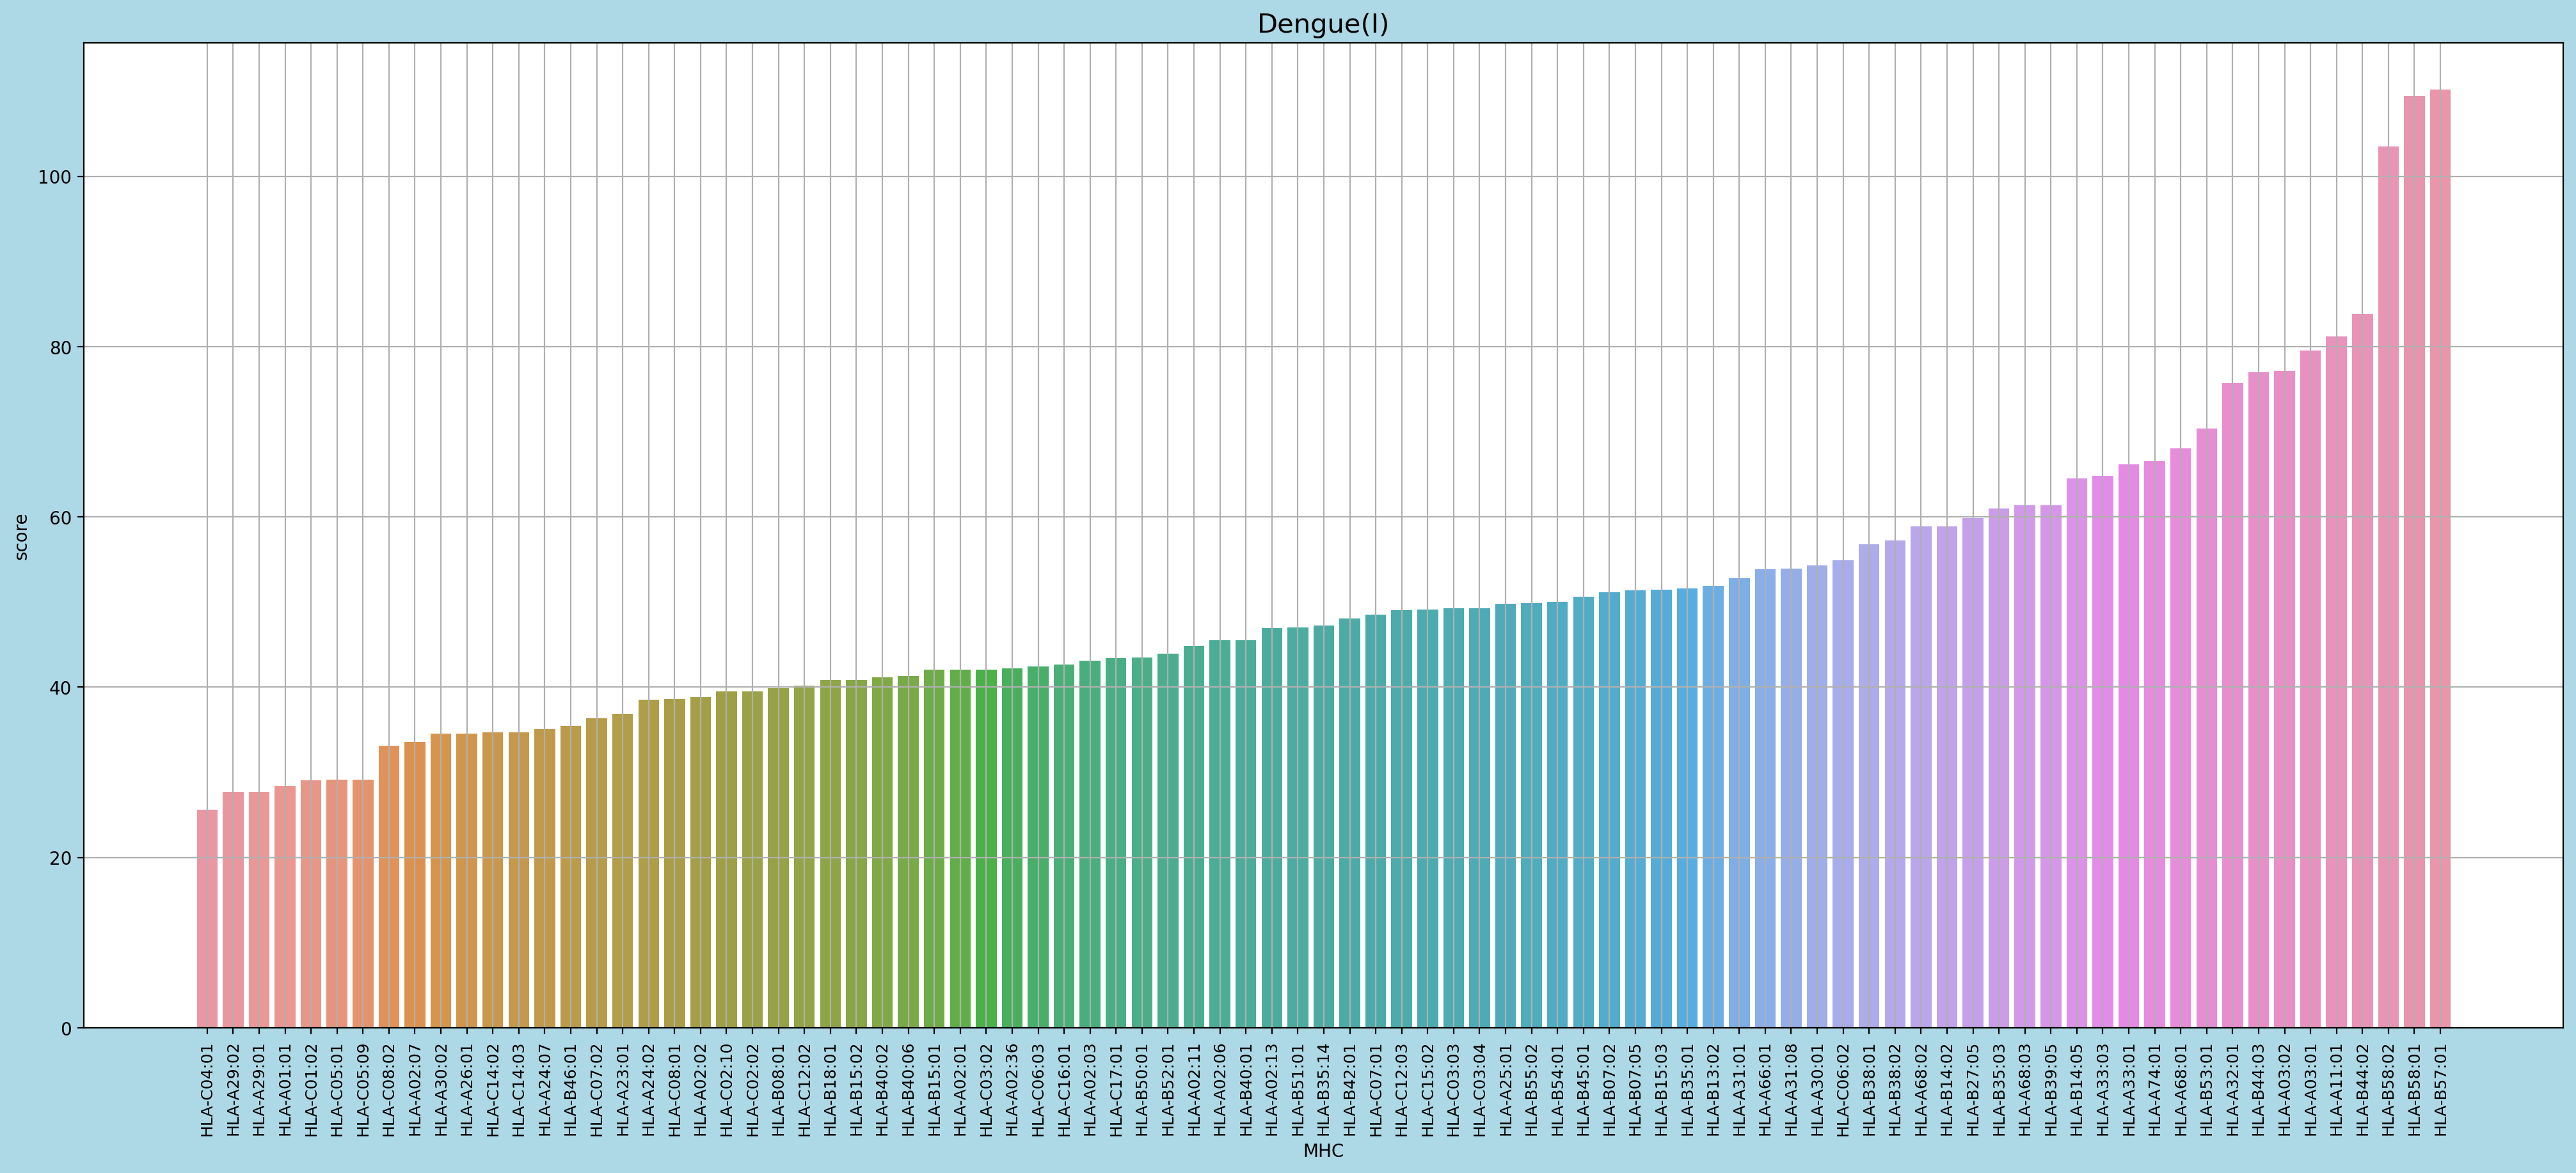

In [185]:
SS= SS.sort_values('val/coef')
fig, axes = plt.subplots(figsize= (25, 10), dpi= 200)
sns.barplot(x= 'MHC', y= 'val/coef', data= SS, ax= axes)

plt.xticks(fontsize= 9,rotation= 90)
axes.set_ylabel("score")
#axes.set_yscale("log")
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Dengue(I)", fontsize= 15)
plt.plot()
plt.savefig("../Output/Dengue-I.png", bbox_inches= "tight")

#### Covid-19 barplots  
COV-(I/II)-(class II subtype).png

In [219]:
SS= RawData.copy()
SS= SS.loc[SS['Virus'] == "SARS-CoV-2"]

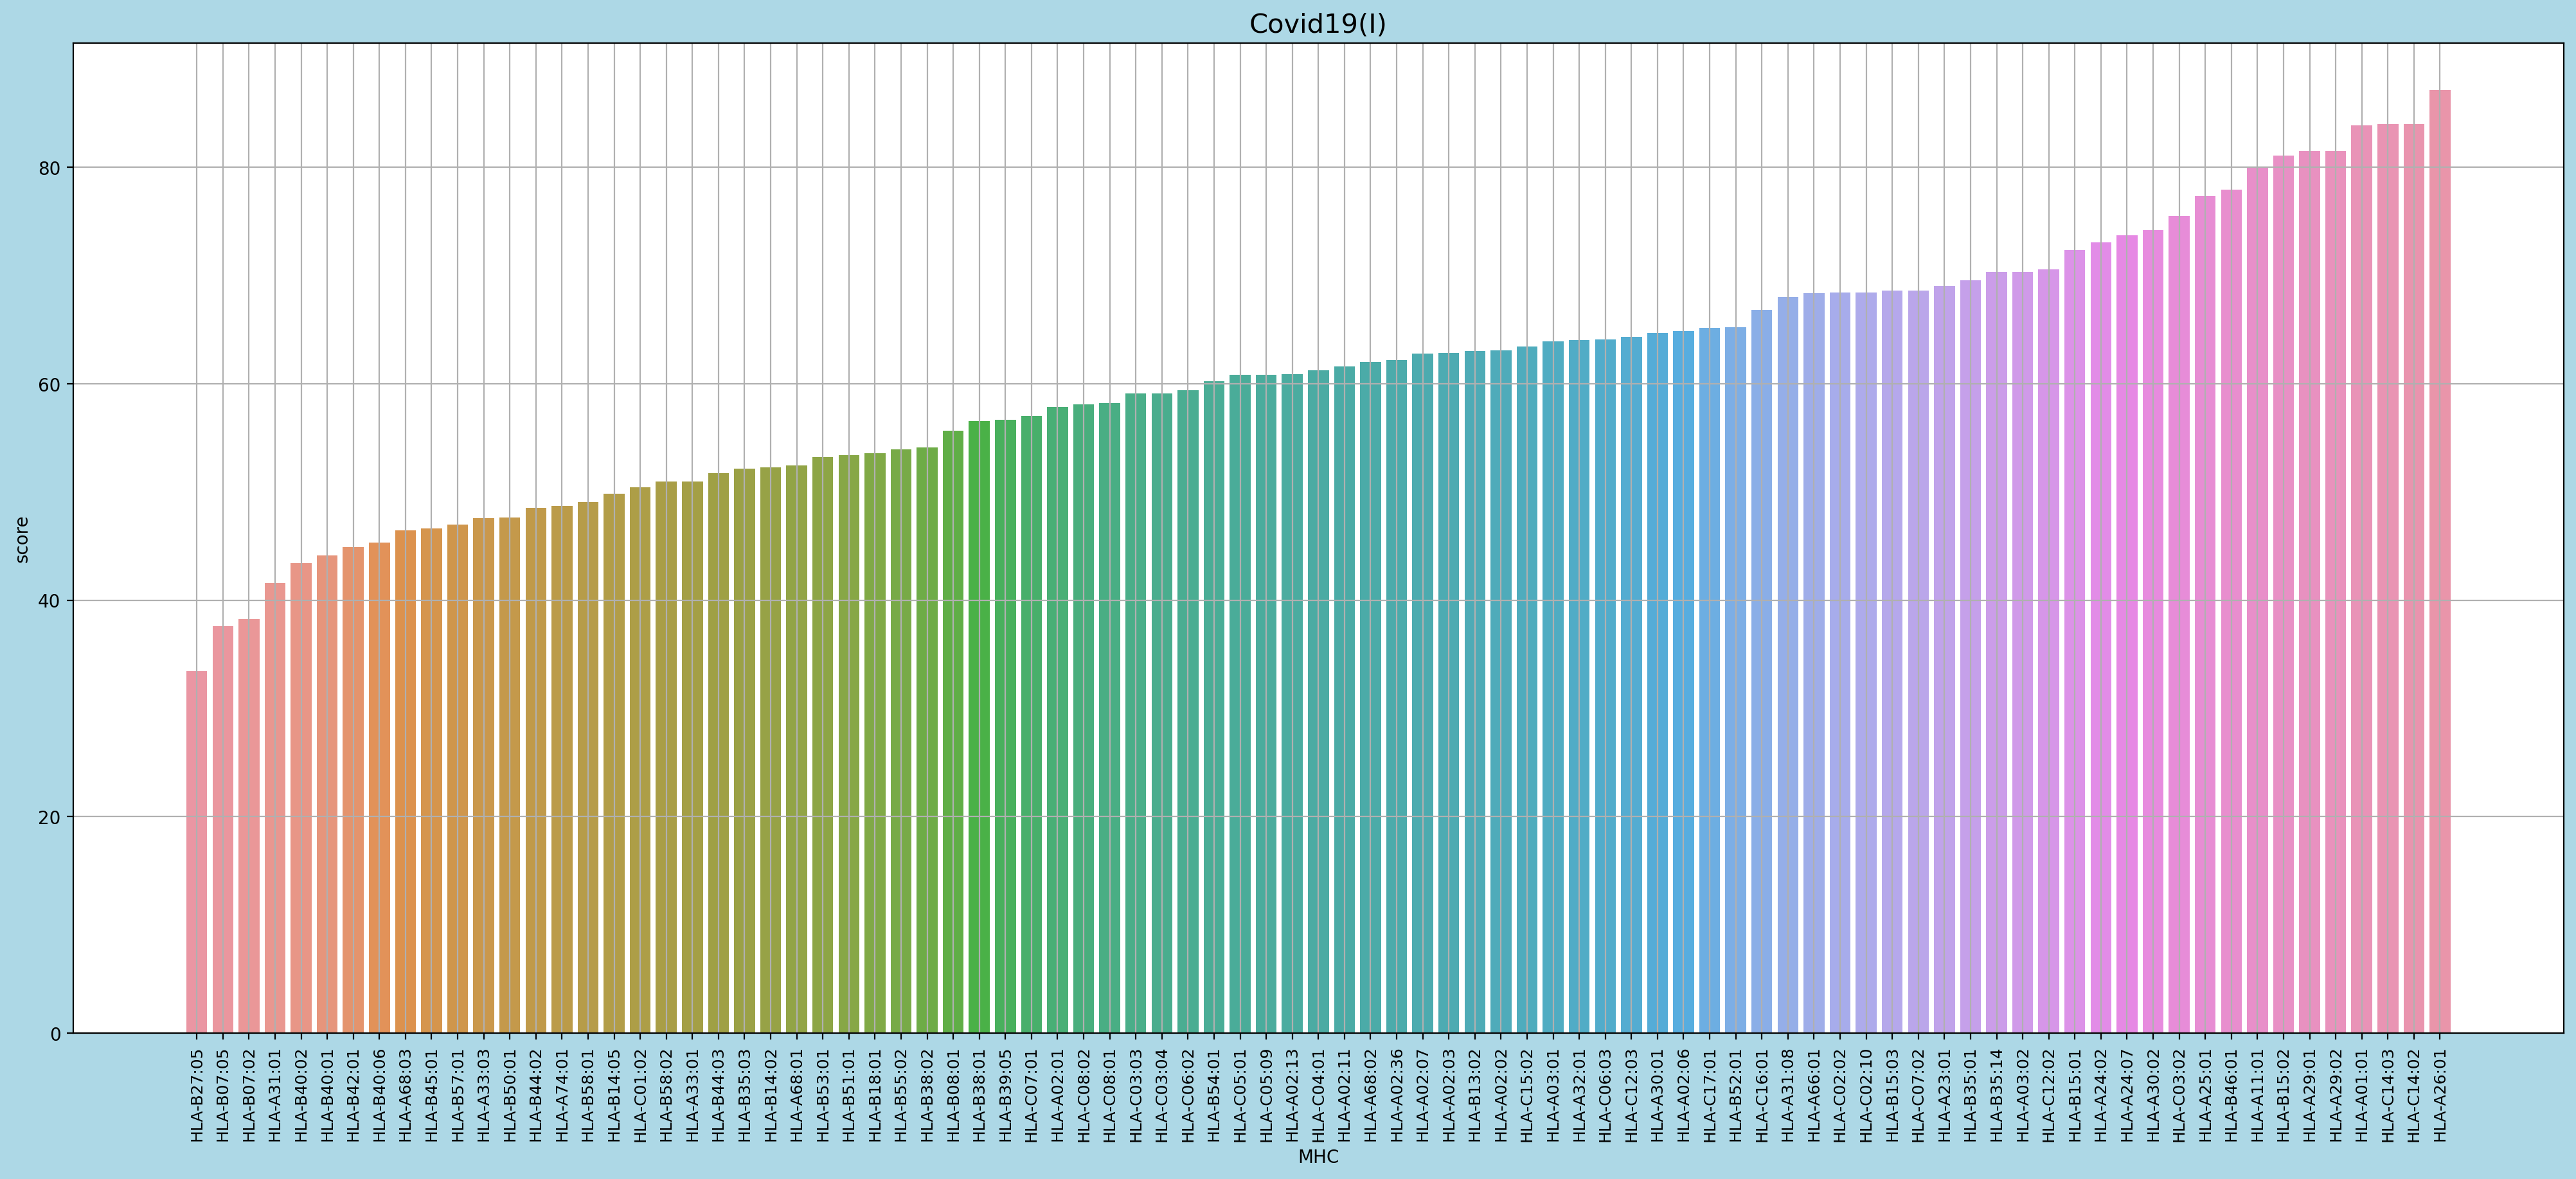

In [222]:
SSS= SS.loc[SS['MHC_type'] == "I", ['MHC', 'val/coef']]
SSS= SSS.sort_values('val/coef')
fig, axes = plt.subplots(figsize= (25, 10), dpi= 200)
sns.barplot(x= 'MHC', y= 'val/coef', data= SSS, ax= axes)

plt.xticks(fontsize= 9,rotation= 90)
axes.set_ylabel("score")
#axes.set_yscale("log")
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Covid19(I)", fontsize= 15)
plt.plot()
plt.savefig("../Output/COV-I.png", bbox_inches= "tight")

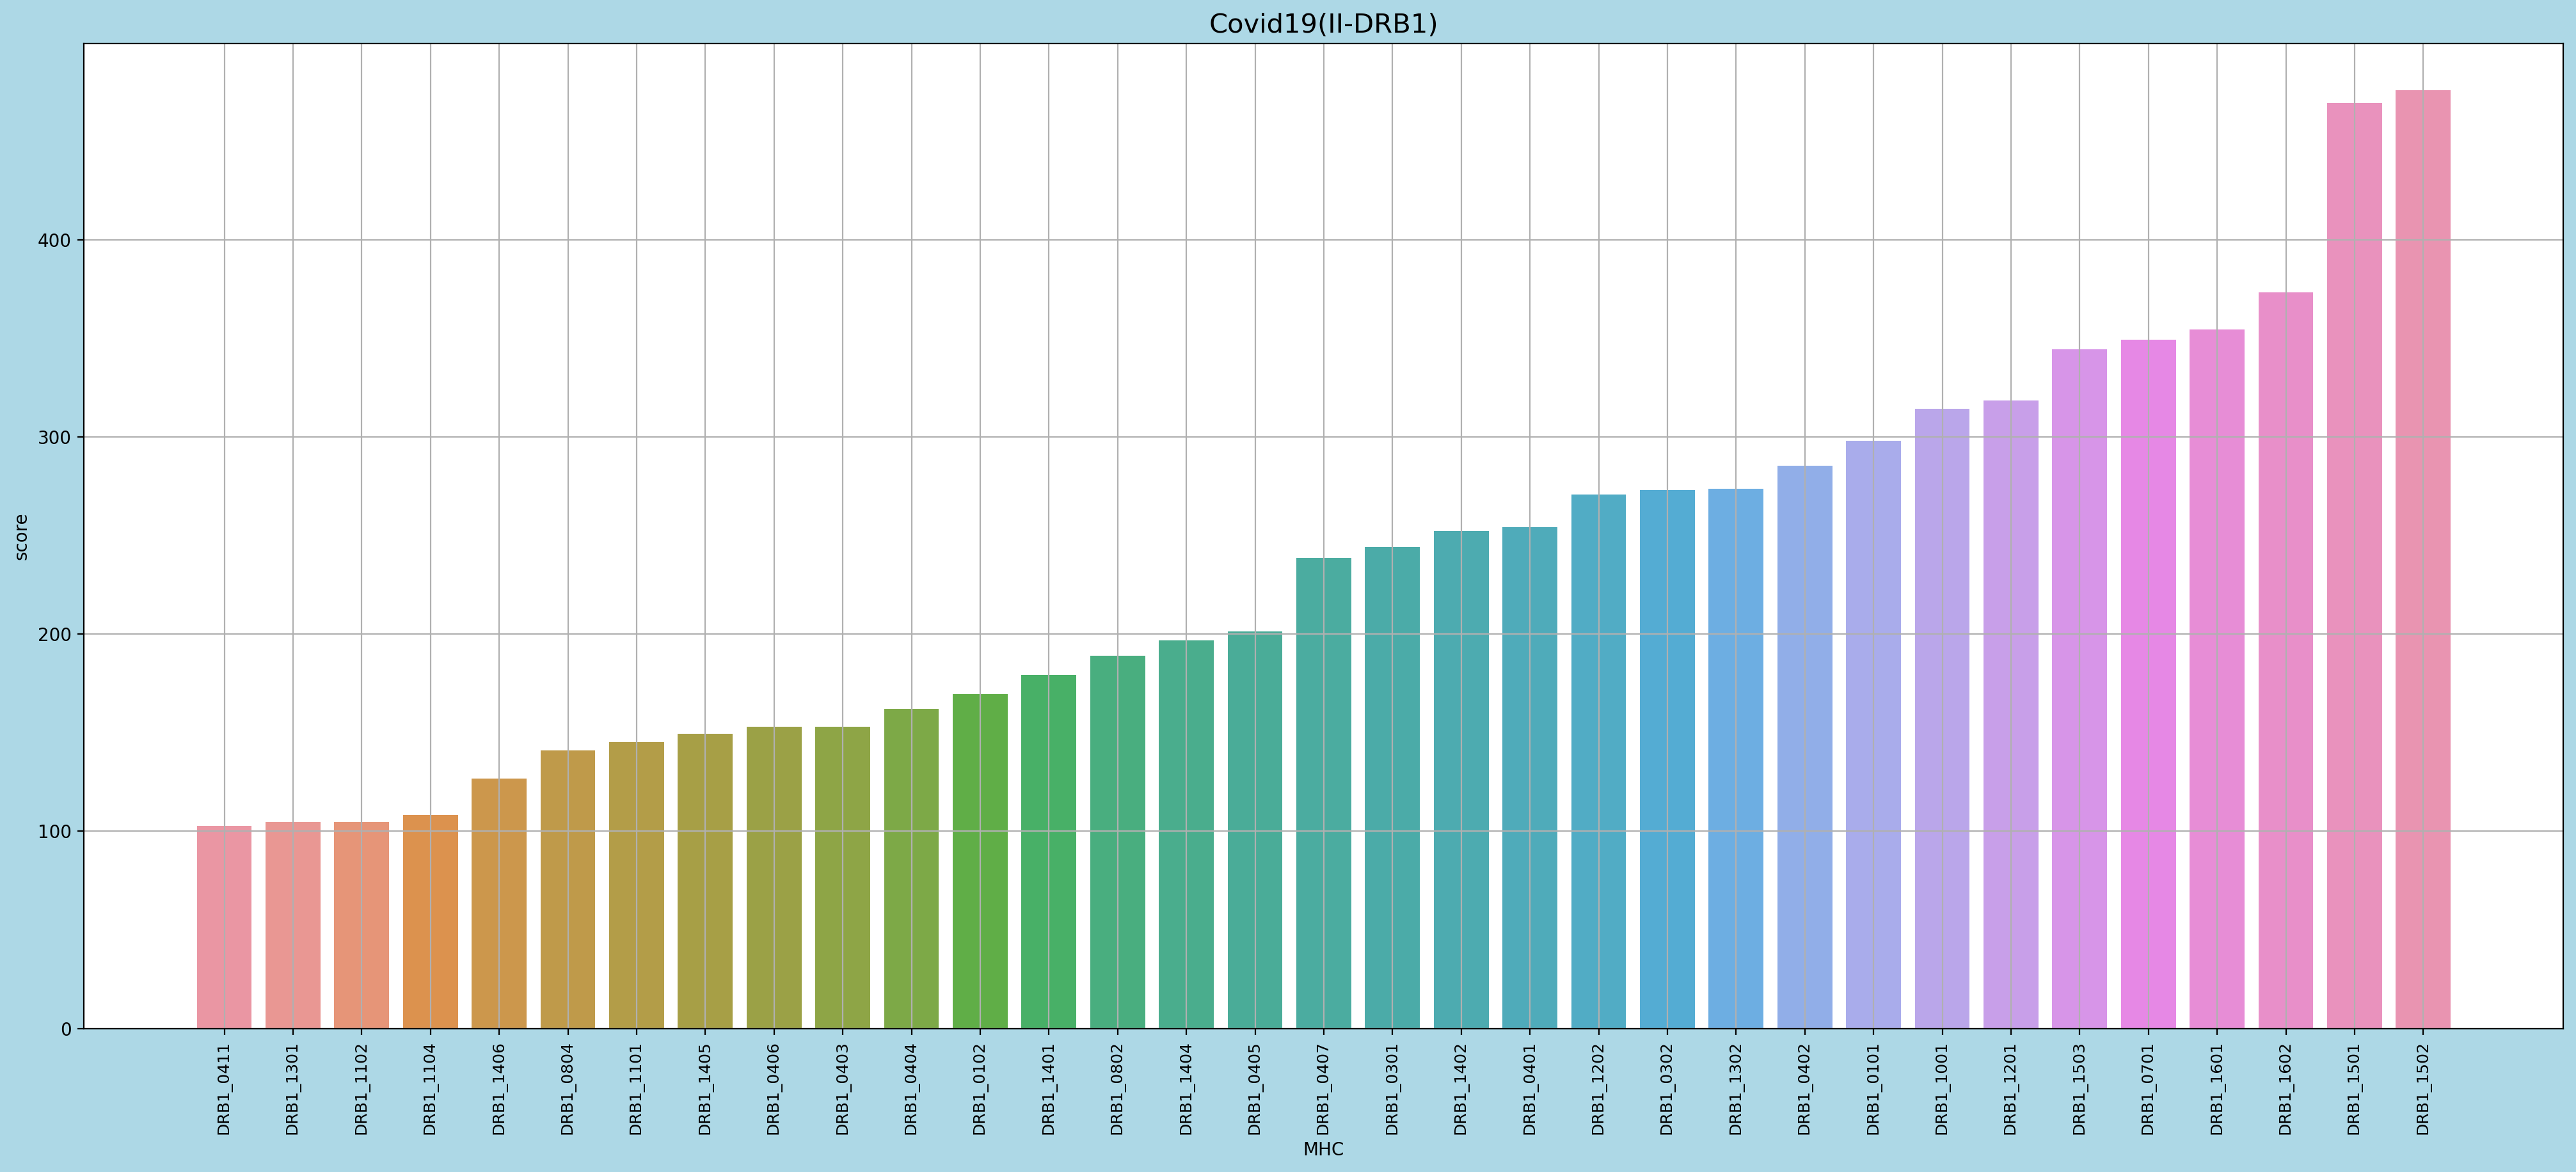

In [223]:
SSS= SS.loc[SS['MHC'].isin(DRB1), ['MHC', 'val/coef']]
SSS= SSS.sort_values('val/coef')
fig, axes = plt.subplots(figsize= (25, 10), dpi= 200)
sns.barplot(x= 'MHC', y= 'val/coef', data= SSS, ax= axes)

plt.xticks(fontsize= 9,rotation= 90)
axes.set_ylabel("score")
#axes.set_yscale("log")
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Covid19(II-DRB1)", fontsize= 15)
plt.plot()
plt.savefig("../Output/COV-II-DRB1.png", bbox_inches= "tight")

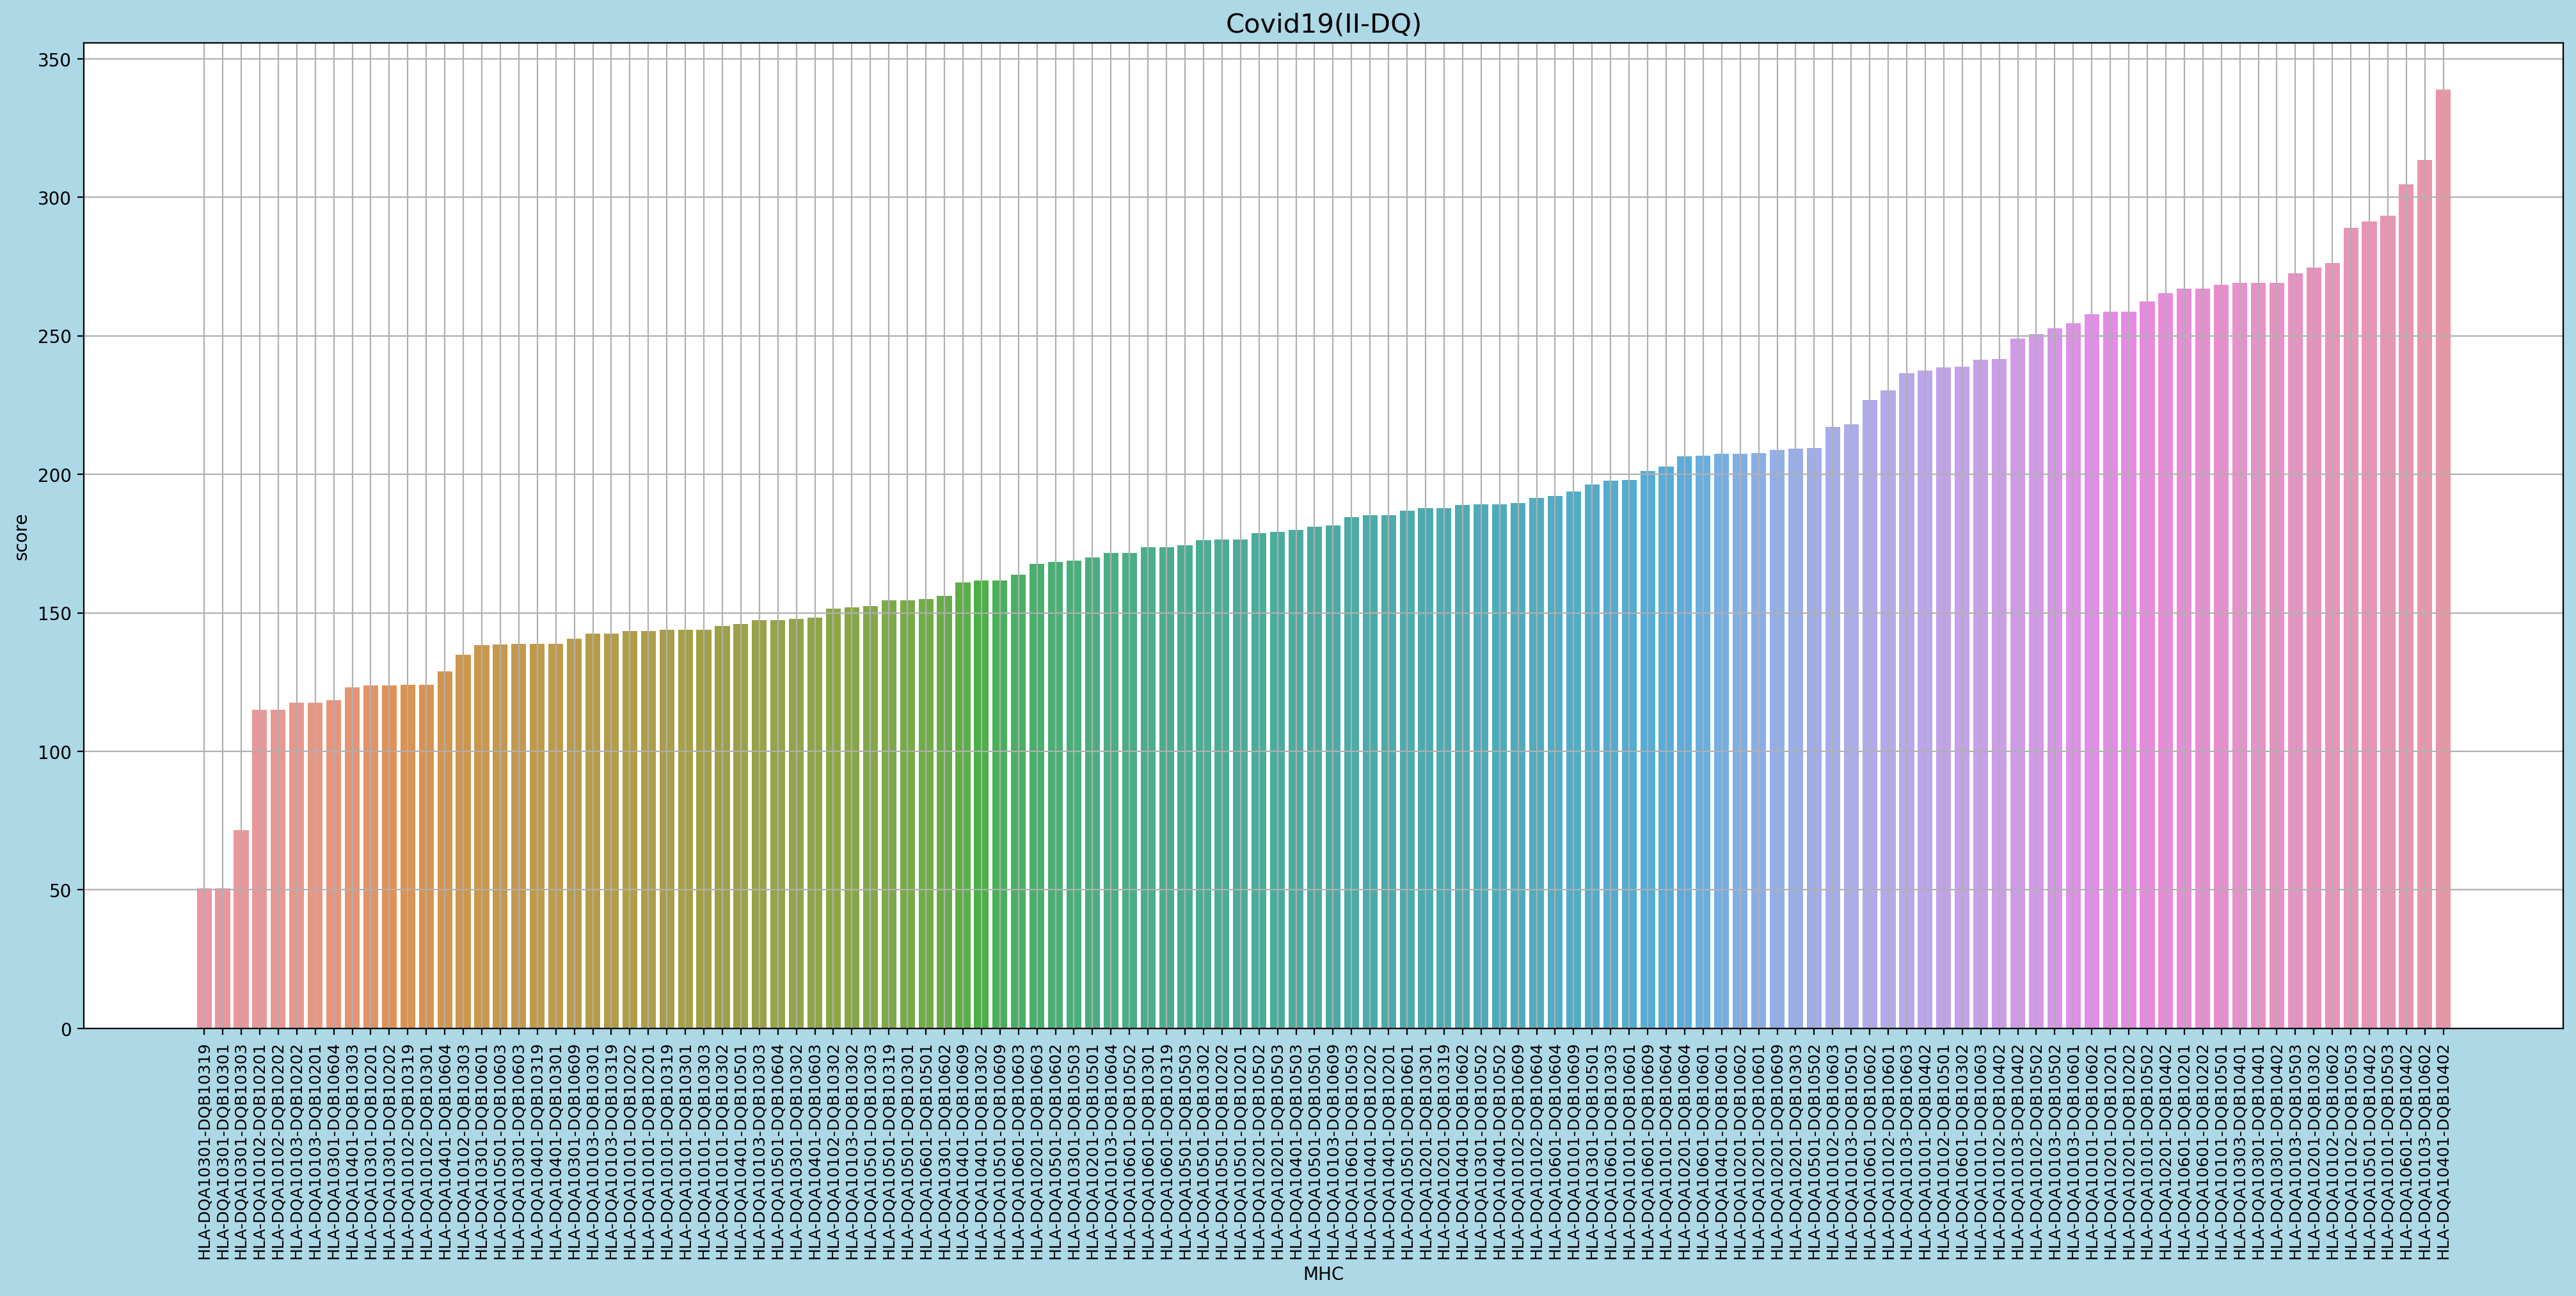

In [224]:
SSS= SS.loc[SS['MHC'].isin(DQ), ['MHC', 'val/coef']]
SSS= SSS.sort_values('val/coef')
fig, axes = plt.subplots(figsize= (25, 10), dpi= 200)
sns.barplot(x= 'MHC', y= 'val/coef', data= SSS, ax= axes)

plt.xticks(fontsize= 9,rotation= 90)
axes.set_ylabel("score")
#axes.set_yscale("log")
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Covid19(II-DQ)", fontsize= 15)
plt.plot()
plt.savefig("../Output/COV-II-DQ.png", bbox_inches= "tight")

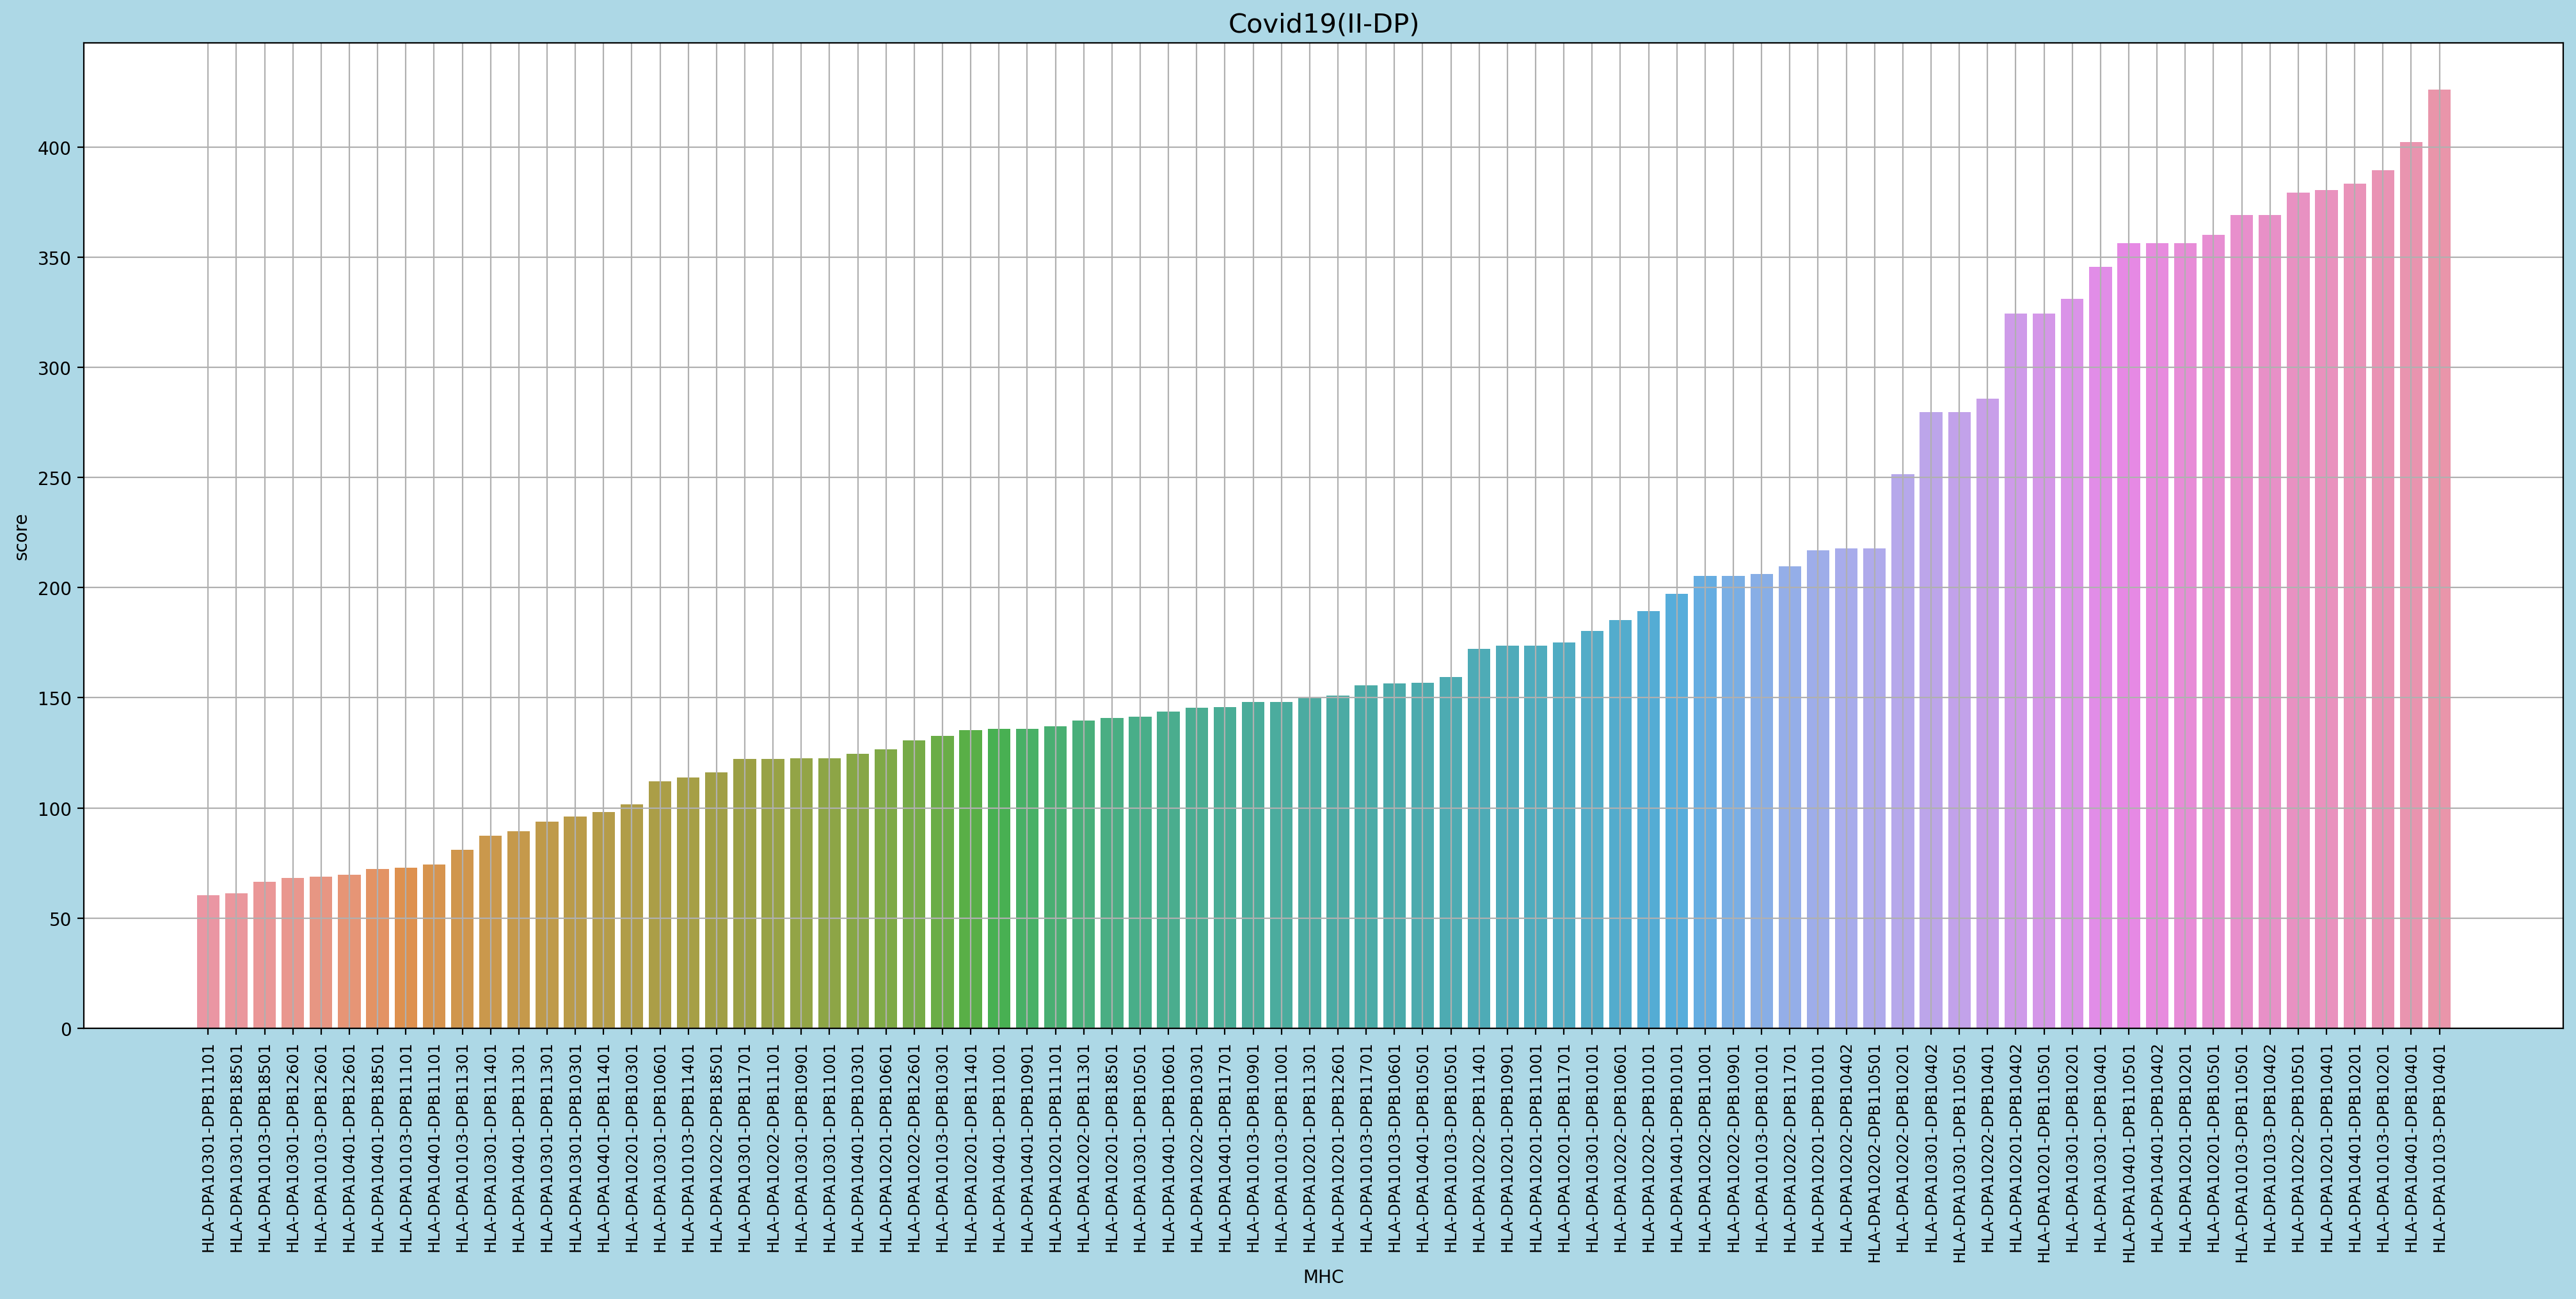

In [225]:
SSS= SS.loc[SS['MHC'].isin(DP), ['MHC', 'val/coef']]
SSS= SSS.sort_values('val/coef')
fig, axes = plt.subplots(figsize= (25, 10), dpi= 200)
sns.barplot(x= 'MHC', y= 'val/coef', data= SSS, ax= axes)

plt.xticks(fontsize= 9,rotation= 90)
axes.set_ylabel("score")
#axes.set_yscale("log")
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Covid19(II-DP)", fontsize= 15)
plt.plot()
plt.savefig("../Output/COV-II-DP.png", bbox_inches= "tight")

#### Yellow Fever barplot (DRB1)  
Yellow_fever_barplot(DRB1).png

In [191]:
LLLL= RawData.copy()
LLLL= LLLL.loc[LLLL['Virus'] == 'Yellow_fever']
LLLL= LLLL.loc[LLLL['MHC_type'] == "II", ['MHC', 'sum_score high']].sort_values('sum_score high')
LLLL= LLLL.loc[LLLL['MHC'].map(len) < 11]
print(len(LLLL))

33


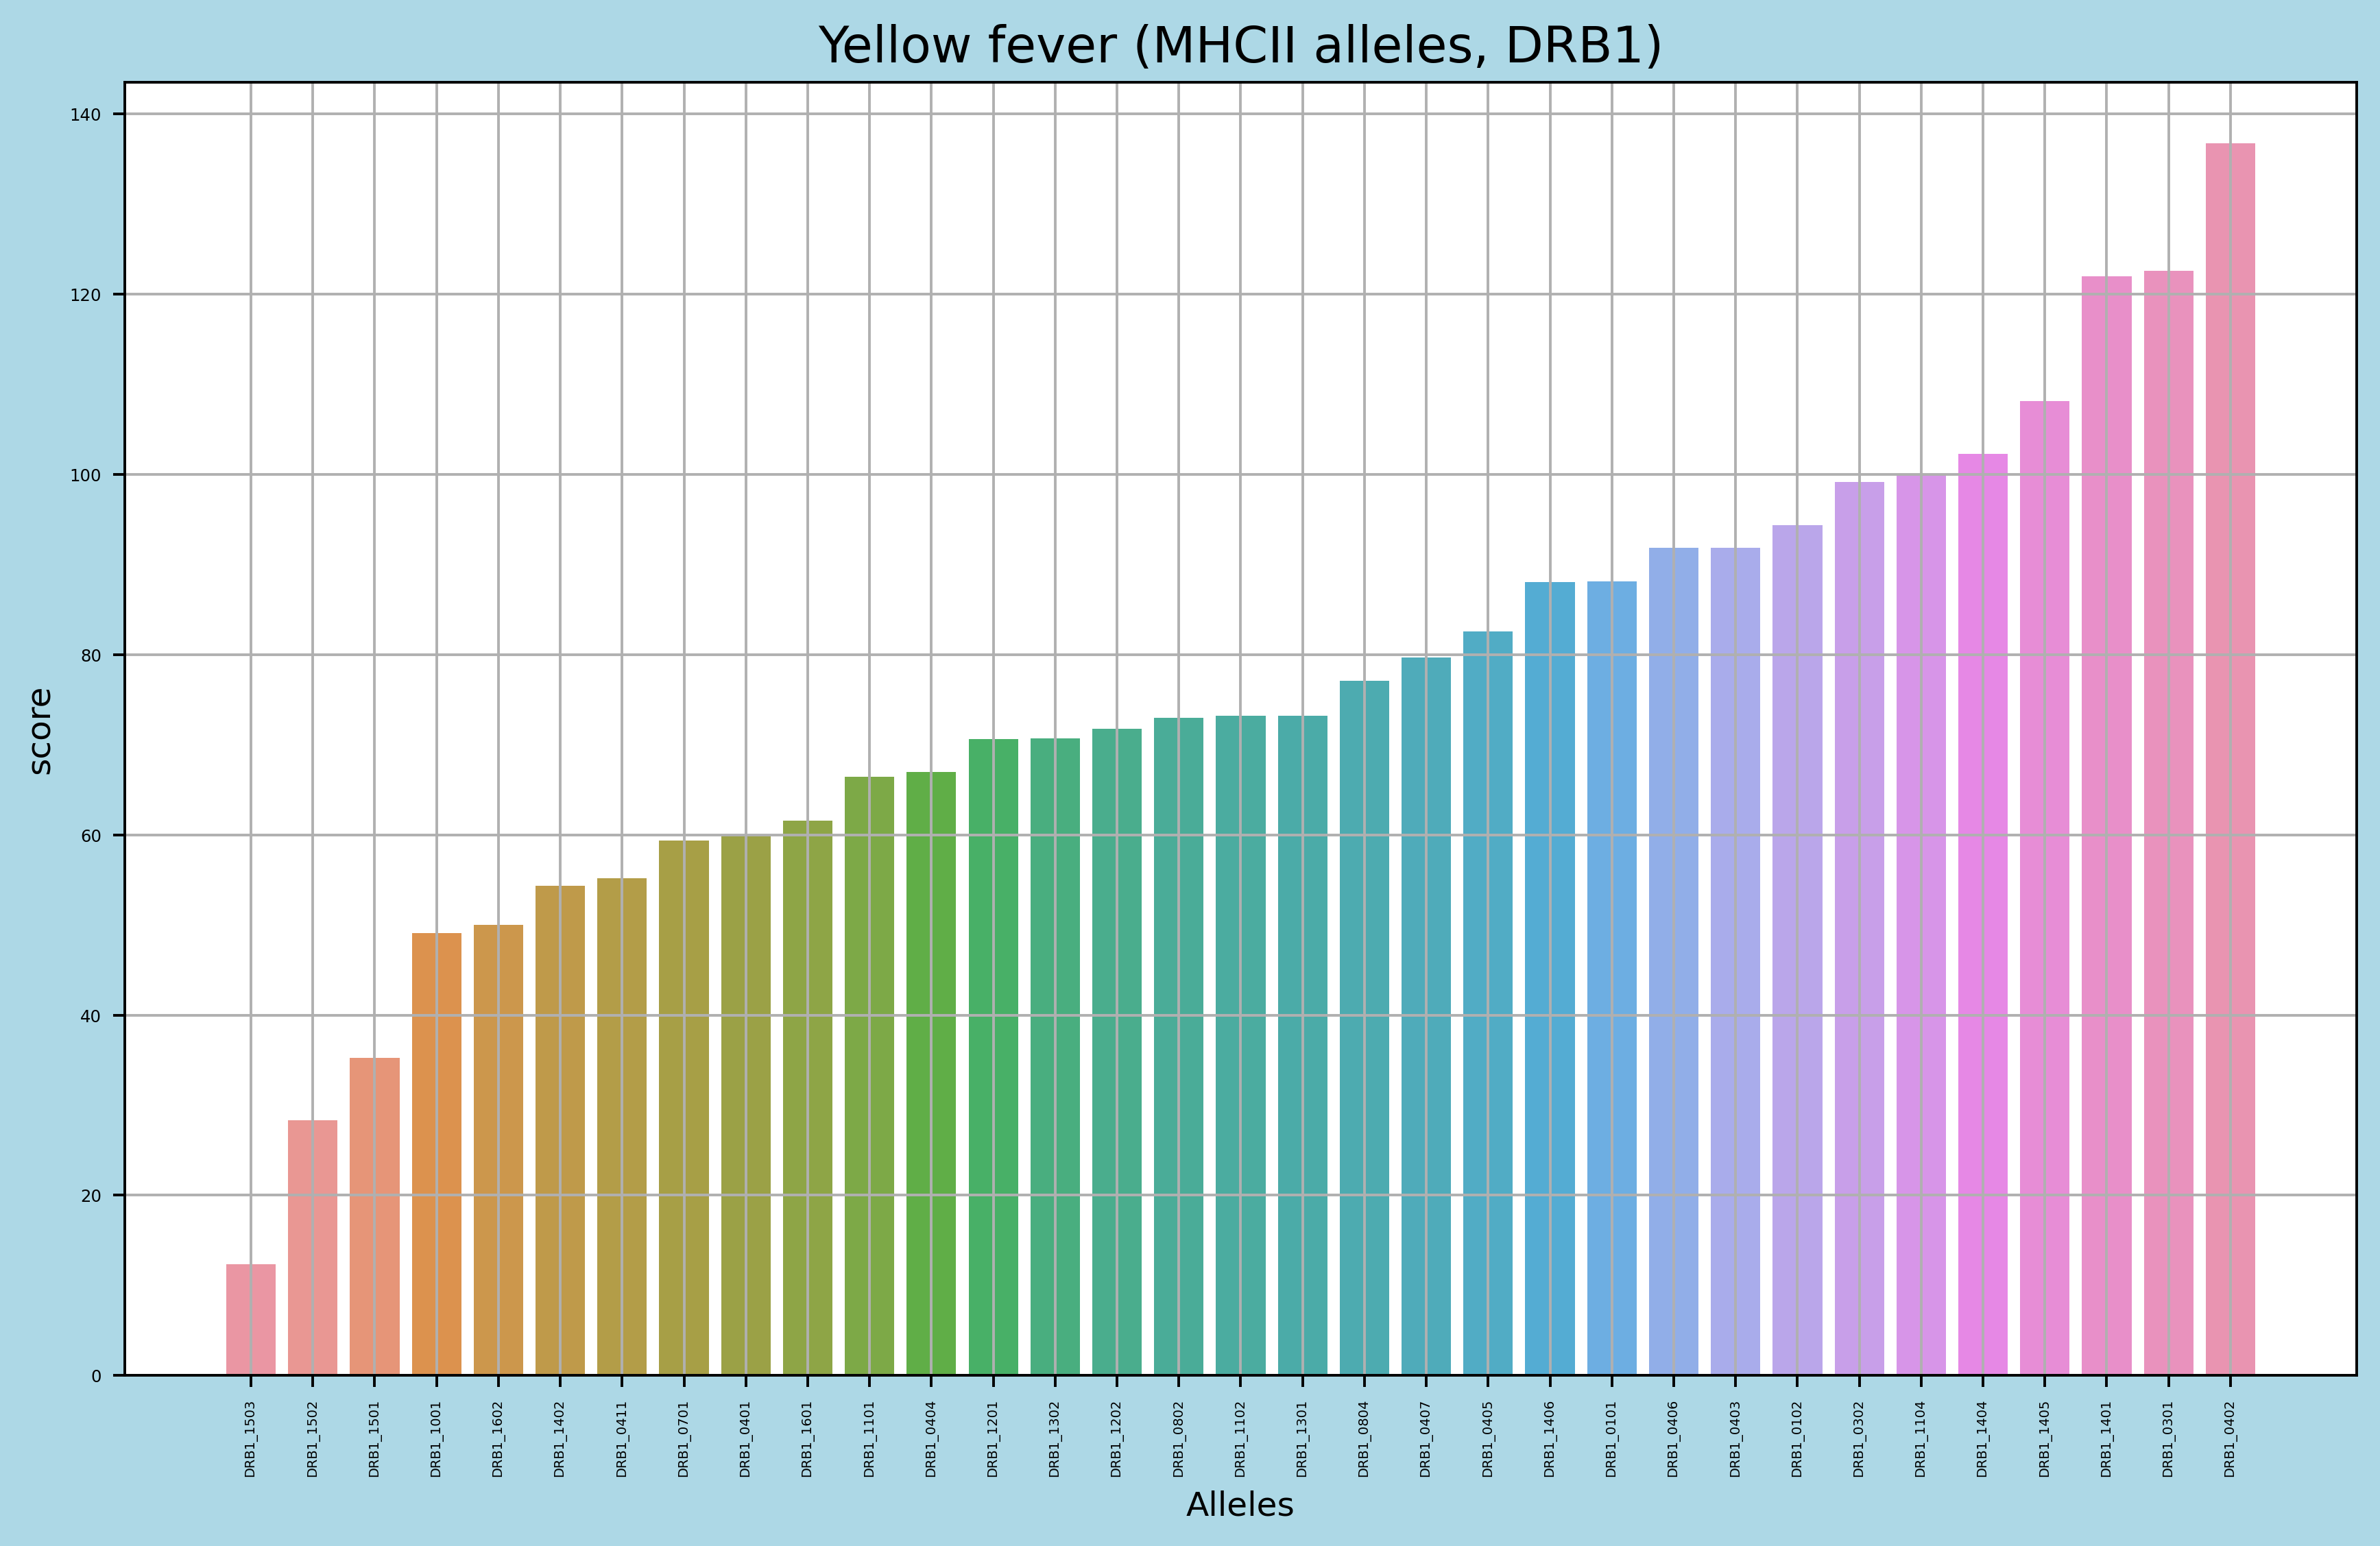

In [226]:
fig, axes = plt.subplots(figsize= (12, 7), dpi= 350)
sns.barplot(data= LLLL, ax= axes, y= 'sum_score high', x= 'MHC') #cmap= "YlGnBu", yticklabels= list(HaploTable.index), xticklabels= list(HaploTable.columns))
plt.xticks(fontsize= 4, rotation= 90)
plt.yticks(fontsize= 5)
axes.set_ylabel("score")
axes.set_xlabel("Alleles")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Yellow fever (MHCII alleles, DRB1)", fontsize= 15)
plt.plot()
plt.savefig("../Output/Yellow_fever_barplot(DRB1).png", bbox_inches= "tight")

#### Counting the number of peptides that are equal to human's  
human_like.xlsx

In [210]:
# you should have got human-like_peptides.txt in "Processed" folder after running processing script 

f= open("../Data/Affinity_results/Processed/human-like_peptides.txt", "r")
FF= f.read().split("\n")
f.close

D= {}
A= None
for x in FF:
    if x[:2] != "Al":
        D[x]= 0
        A= x
    else:
        D[A]+= 1
SubNames

DD= {}

for x in list(D.keys()):
    try:
        G= int(Tab1.loc[Tab1['Virus'] == SubNames[x]]['Aacid length'].iloc[0])
        DD[SubNames[x]]= [D[x], G]
    except: None


A= pd.DataFrame.from_dict(DD, orient='index', columns=['number of peptides', 'length']).sort_values('number of peptides')
A['normed on length']= A['number of peptides']/A['length']
A= A.sort_values('normed on length')

# Put in the number of predicted epitopes for viruses of interest:
A['total peptides']= [None for x in range(61)]
A.loc["Borna", 'total peptides']= 1775
A.loc["SARS-CoV-1", 'total peptides']= 5432
A.loc["SARS-CoV-2", 'total peptides']= 5579
A.at["EBV", 'total peptides']= 22607
A.at["Vaccina_virus",'total peptides']= 32838
A.at["HHV-1",'total peptides']= 21462

A['% of equal']= A['number of peptides']*100/A['total peptides']

with pd.ExcelWriter('../Output/human_like.xlsx') as writer:  
    A.to_excel(writer)
    
A

number of peptides  length  normed on length total peptides  \
Rhinovirus_C                       0    2153          0.000000           None   
Chikunguya                         0    4546          0.000000           None   
HPV41                              0    2765          0.000000           None   
Dengue                             0    3392          0.000000           None   
Coxsackievirus_B                   0    2184          0.000000           None   
...                              ...     ...               ...            ...   
SARS-CoV-2                       134   10034          0.013355           5579   
HPV5                              54    3145          0.017170           None   
SARS-CoV-1                       262    9995          0.026213           5432   
EBV                             1226   43633          0.028098          22607   
Vaccina_virus                   5283   57240          0.092296          32838   

                 % of equal  
Rhinovirus_C            NaN  
Chikunguya              NaN  
HPV41                   NaN  
Dengue                  NaN  
Coxsackievirus_B        NaN  
...                     ...  
SARS-CoV-2         2.401864  
HPV5                    NaN  
SARS-CoV-1          4.82327  
EBV                5.423099  
Vaccina_virus     16.088069  

[61 rows x 5 columns]

#### Hepatitis_C vs Hepatitis_B normed (DQB10301 values)  
HepatitisC_vs_HepatitisB_normed_(DQB10301).png

In [216]:
# list of two locus haplotypes with DQB10301
DQ2= []
for x in DQ:
    a= x.split("-")[2]
    if a == "DQB10301": DQ2+= [x]
DQ2

['HLA-DQA10201-DQB10301',
 'HLA-DQA10103-DQB10301',
 'HLA-DQA10102-DQB10301',
 'HLA-DQA10101-DQB10301',
 'HLA-DQA10301-DQB10301',
 'HLA-DQA10401-DQB10301',
 'HLA-DQA10501-DQB10301',
 'HLA-DQA10601-DQB10301']

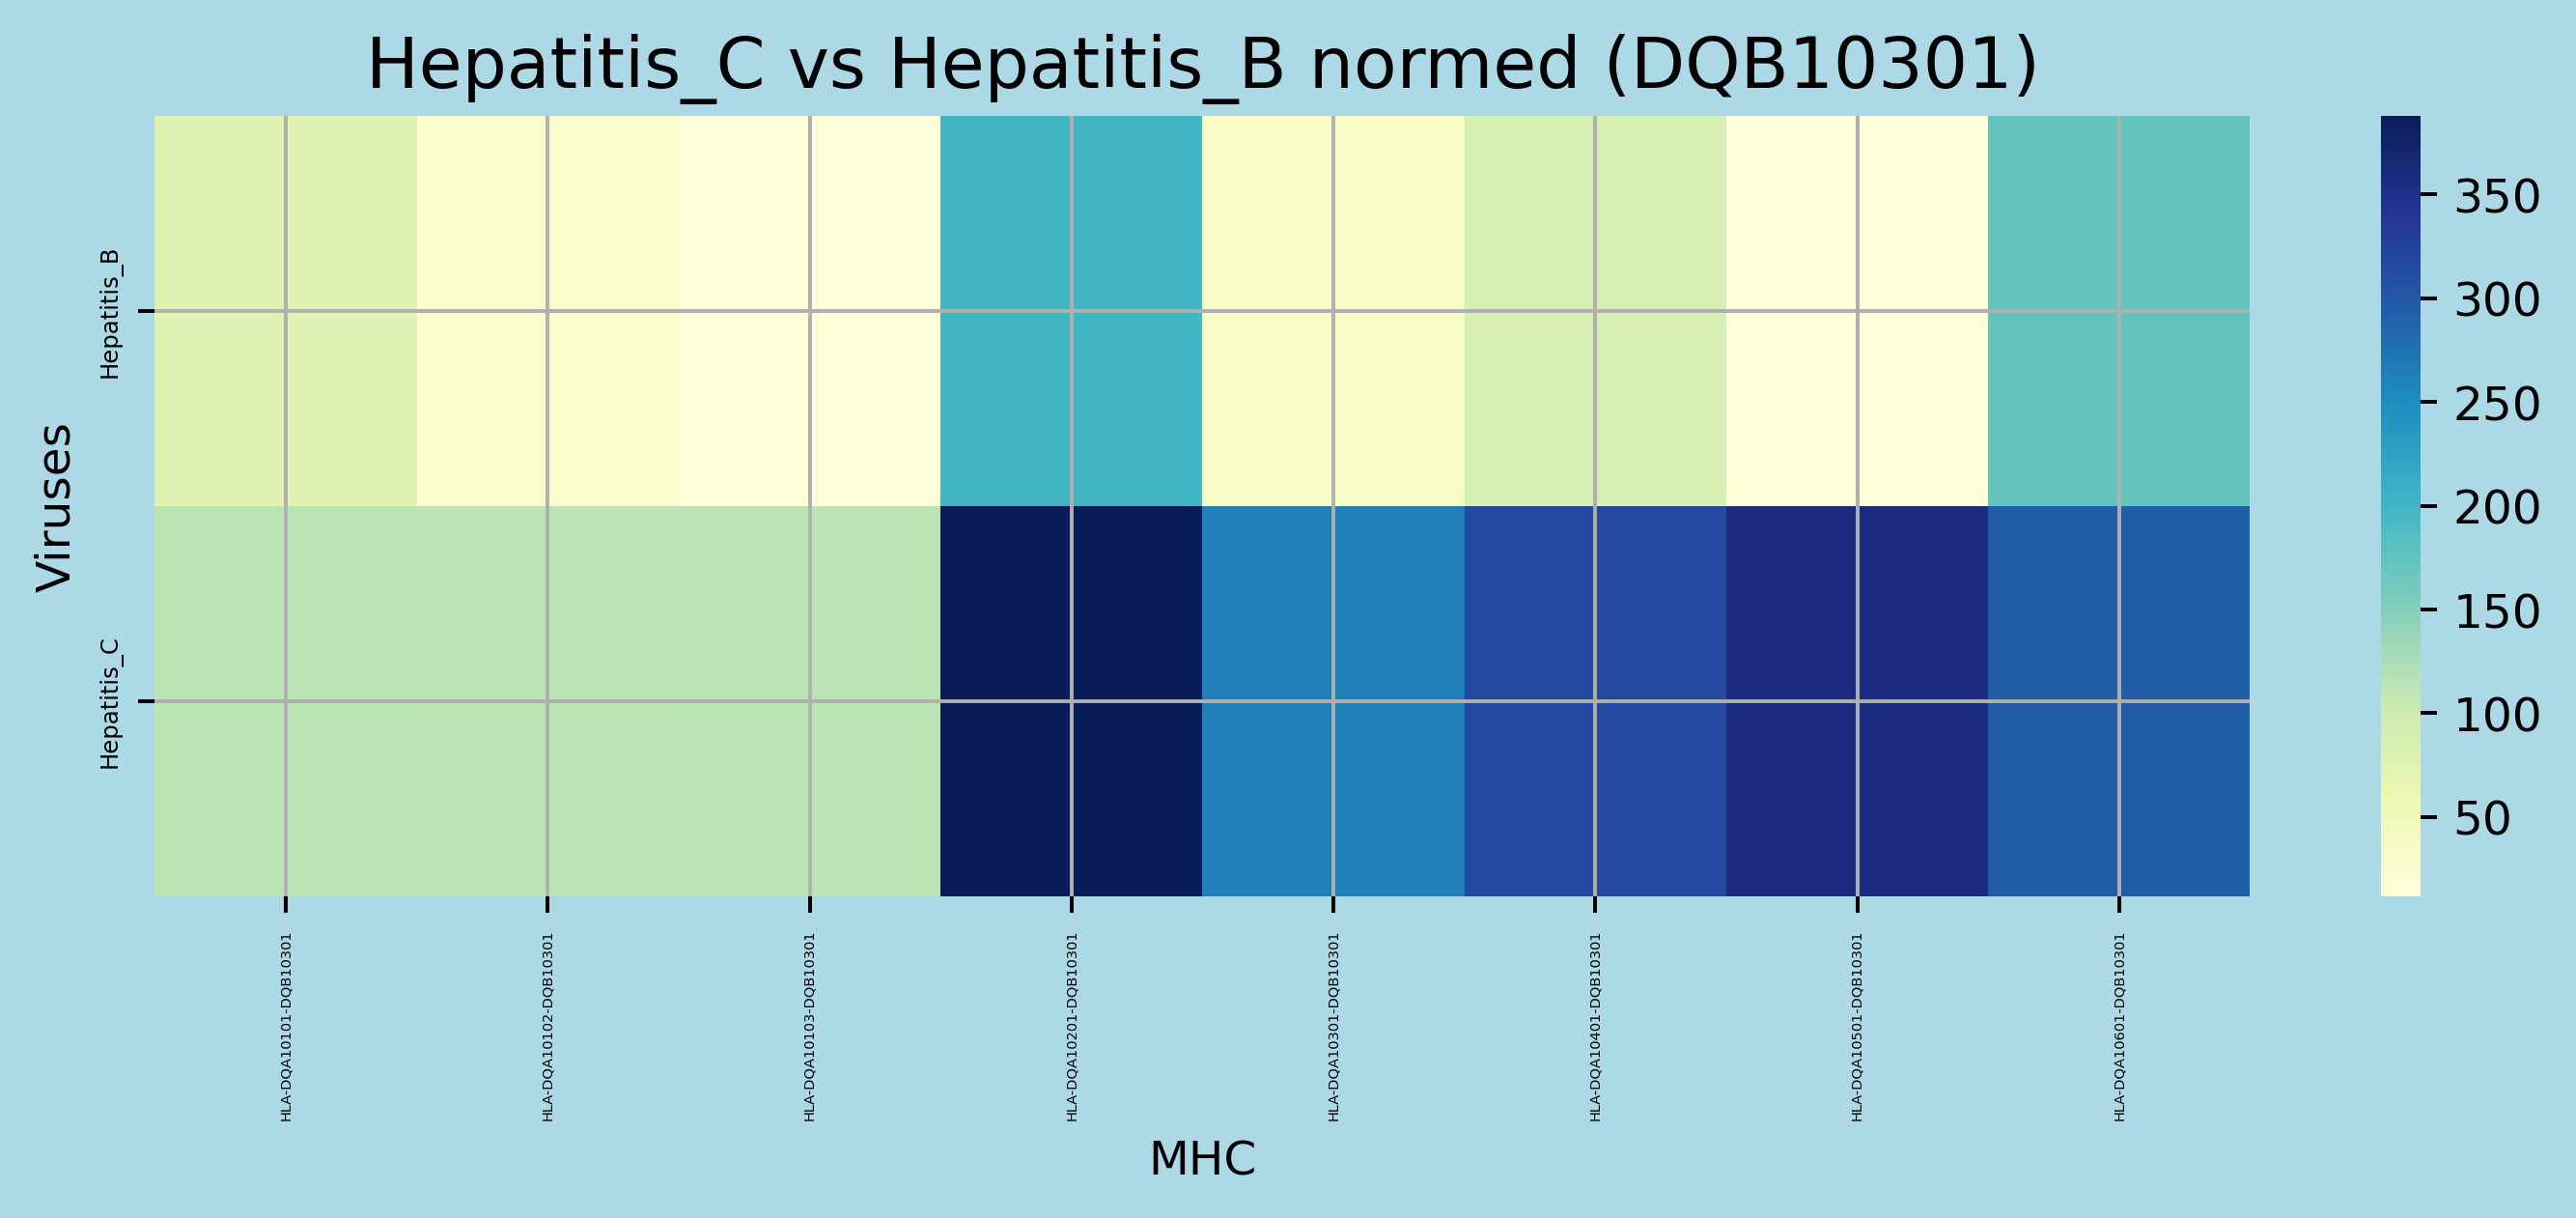

In [217]:
SS= RawData2.copy()
SS= SS.loc[SS['Virus'].isin(["Hepatitis_B", "Hepatitis_C"])]
SS= SS.loc[SS['MHC'].isin(DQ2), ['val/coef', 'MHC', 'Virus']]
SS= SS.pivot_table(index= 'Virus', columns= 'MHC', values= 'val/coef', aggfunc= 'mean')

fig, axes = plt.subplots(figsize= (10, 3), dpi= 350)
sns.heatmap(data= SS, ax= axes, cmap= "YlGnBu", yticklabels= list(SS.index), xticklabels= list(SS.columns))
plt.xticks(fontsize= 3)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("MHC")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Hepatitis_C vs Hepatitis_B normed (DQB10301)", fontsize= 15)
plt.plot()
plt.savefig("../Output/HepatitisC_vs_HepatitisB_normed_(DQB10301).png", bbox_inches= "tight") #####

#### Hepatitis B DQ alleles barplot comparison  
Hepatitis_B-DQ.png

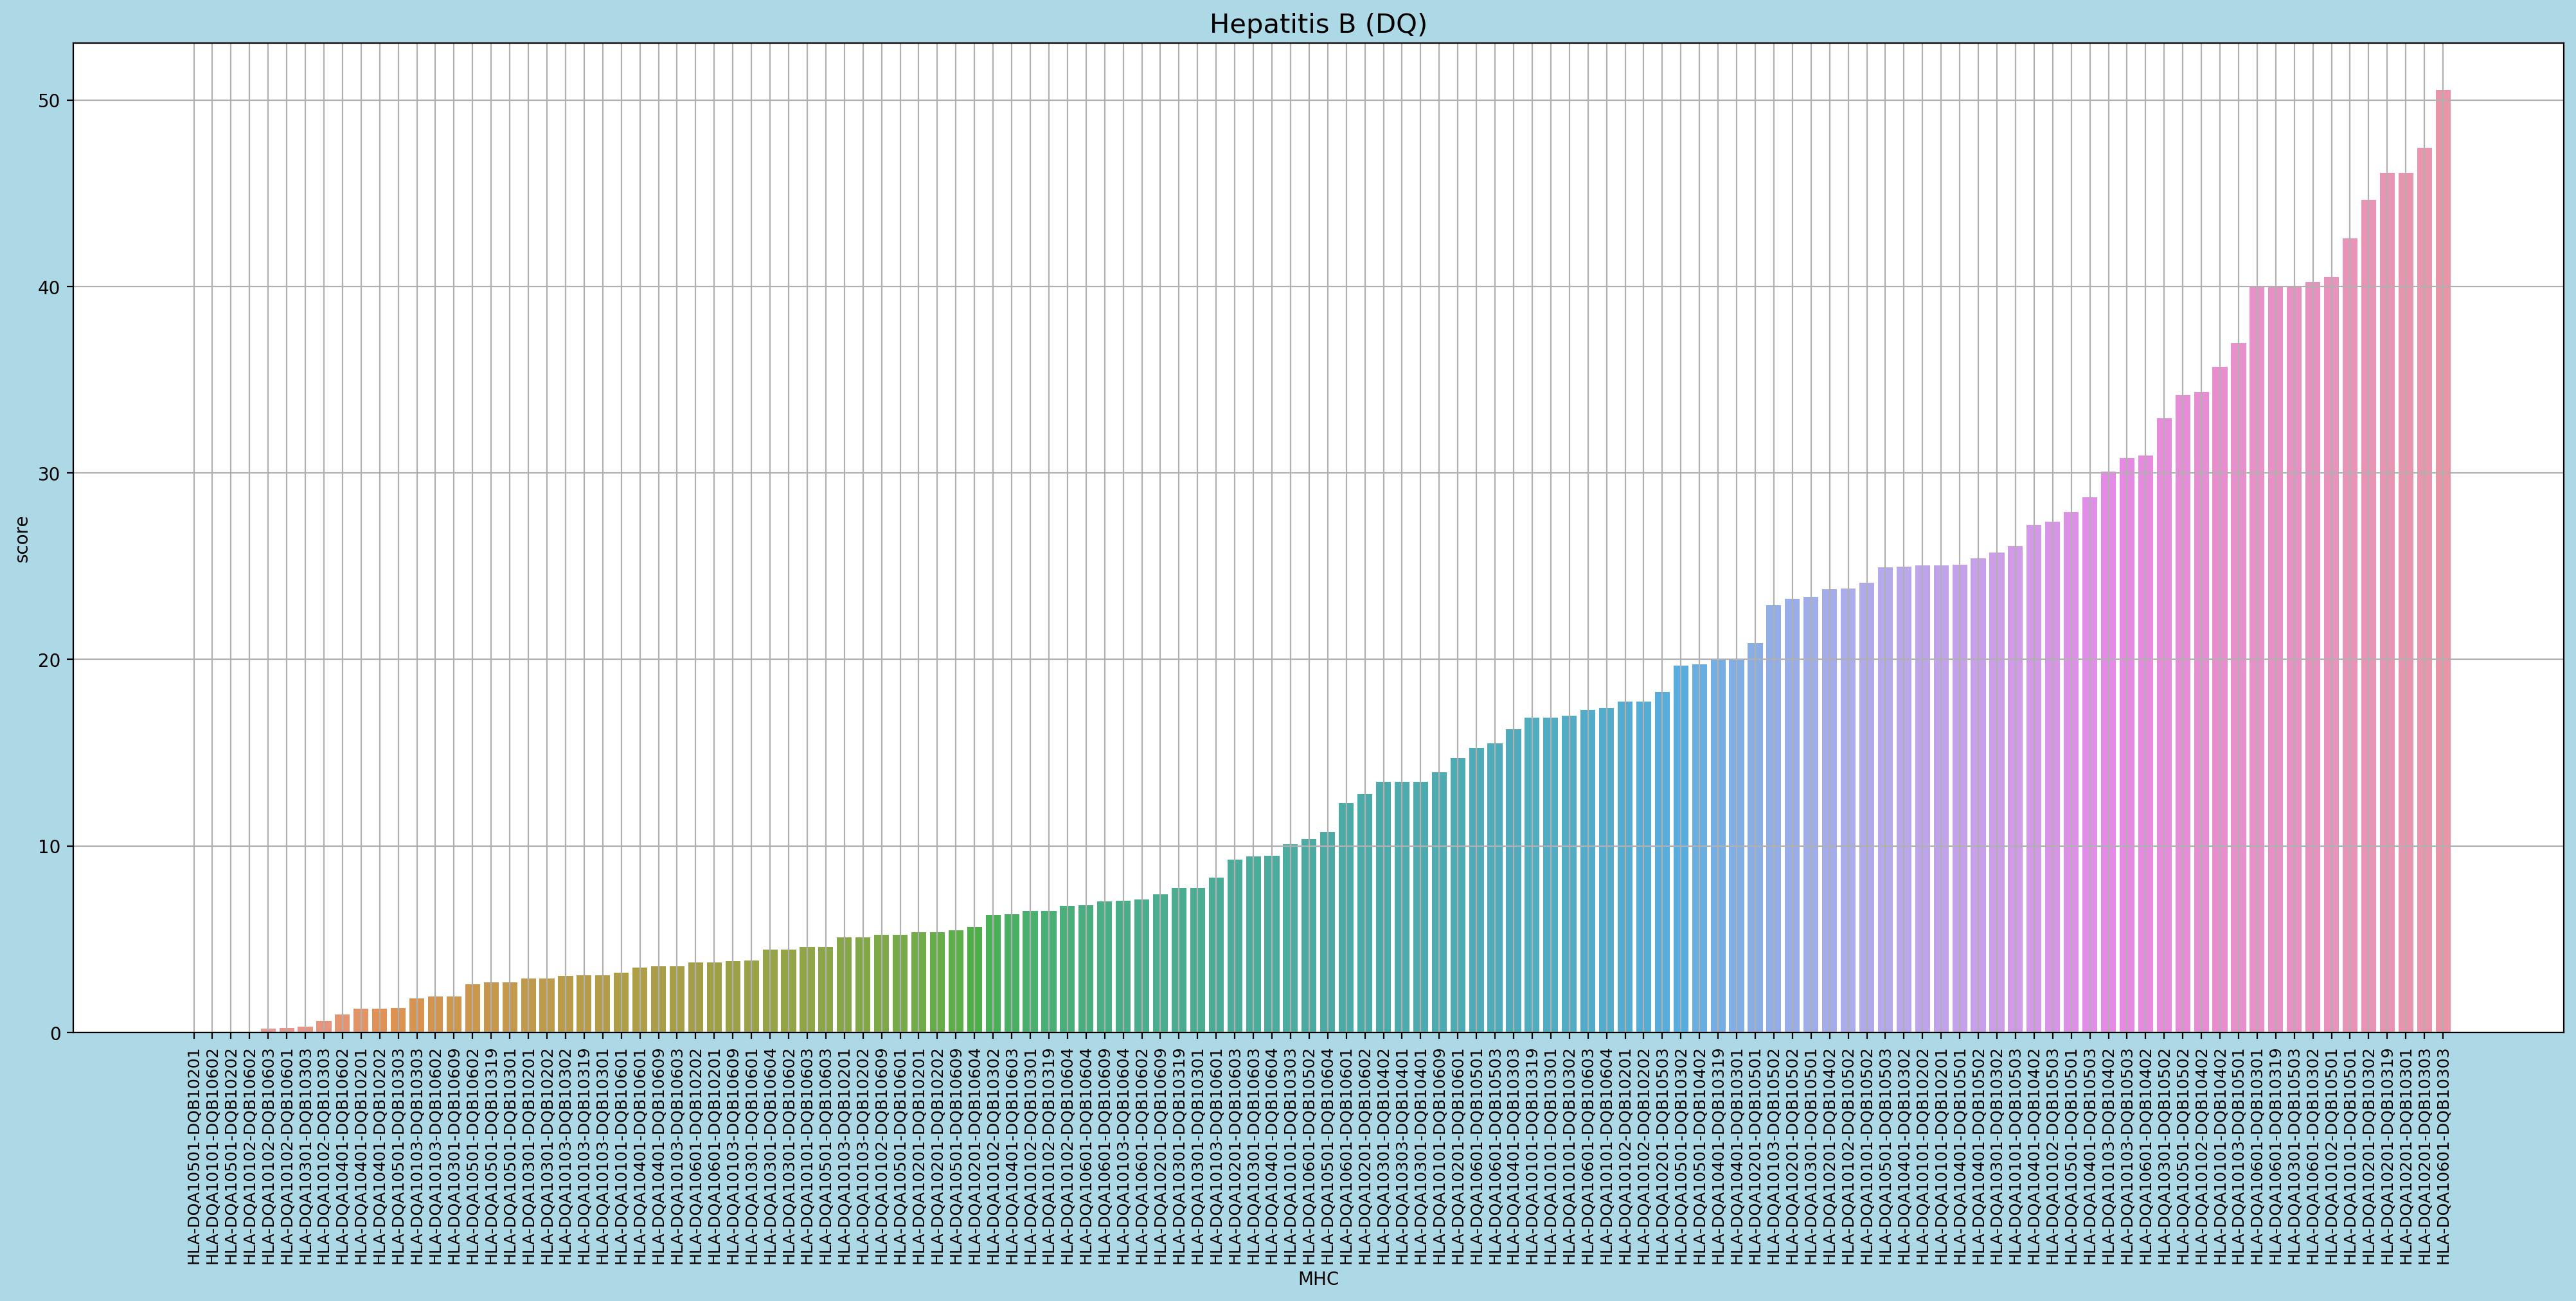

In [218]:
SS= RawData2.copy()
SS= SS.loc[SS['Virus'] == "Hepatitis_B"]
SS= SS.loc[SS['MHC'].isin(DQ), ['MHC', 'sum_score high']]

'''
G= []
for x in list(SS['MHC'].unique()):
    if x[5] in ["Q", "P"]: None
    else: G+= [x]
SS= SS.loc[SS['MHC'].isin(G)]
'''

SS= SS.sort_values('sum_score high')
fig, axes = plt.subplots(figsize= (25, 10), dpi= 200)
sns.barplot(x= 'MHC', y= 'sum_score high', data= SS, ax= axes)

plt.xticks(fontsize= 9,rotation= 90)
axes.set_ylabel("score")
#axes.set_yscale("log")
plt.gcf().set_facecolor("lightblue")
plt.grid()
plt.title("Hepatitis B (DQ)", fontsize= 15)
plt.plot()
plt.savefig("../Output/Hepatitis_B-DQ.png", bbox_inches= "tight")

## Trash